## Key Objectives: -

### 1. Marketing insights from the data to define marketing strategies going forward.
### 2. Build an analytical dashboard to monitor various KPI’s & business metrics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
from operator import attrgetter
# from ydata_profiling import ProfileReport

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format # to remove scientific 'e' notation
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

import warnings
warnings.filterwarnings('ignore')

# pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 100)
pd.set_option('date_dayfirst', True)

In [2]:
os.chdir('/Users/BackUp/AnalytixLabs/MachineLearning_TextMining/Assignmnts/14. Capstone Case Study - Finding-Marketing-Insights')
os.listdir()

['Marketing_Spend.csv',
 '.DS_Store',
 'ML_Capstone_Assignment_14 - Marketing Insights for E-Commerce Company.ipynb',
 'CustomersData.xlsx',
 '14. Final Capstone Project - Marketing Insights for E-Commerce Company.pdf',
 'Discount_Coupon.csv',
 '~$df.xlsx',
 'Online_Sales.csv',
 'Derived_Dataframes',
 'Datasets.rar',
 'Tax_amount.xlsx']

In [3]:
cust_data = pd.read_excel('CustomersData.xlsx',dtype = {'CustomerID' : str})
mark_spend = pd.read_csv('Marketing_Spend.csv', parse_dates = ['Date'])
dis_coup = pd.read_csv('Discount_Coupon.csv')
on_sales = pd.read_csv('Online_Sales.csv', dtype = {'CustomerID' : str, 'Transaction_ID' : str}, 
                       parse_dates = ['Transaction_Date'])

tax_amt = pd.read_excel('Tax_amount.xlsx')

In [4]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   object
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [5]:
mark_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


In [6]:
dis_coup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [7]:
# on_sales.to_excel('on_sales.xlsx')
on_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  object        
 1   Transaction_ID       52924 non-null  object        
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 4.0+ MB


In [8]:
tax_amt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [9]:
on_sales.tail(10)

CustomerID Transaction_ID Transaction_Date     Product_SKU  \
52914      14410          48490       2019-12-31  GGOENEBQ086799   
52915      14410          48491       2019-12-31  GGOENEBB078899   
52916      14410          48491       2019-12-31  GGOENEBQ079099   
52917      14410          48491       2019-12-31  GGOENEBQ086799   
52918      14410          48492       2019-12-31  GGOENEBQ086799   
52919      14410          48493       2019-12-31  GGOENEBB078899   
52920      14410          48494       2019-12-31  GGOEGAEB091117   
52921      14410          48495       2019-12-31  GGOENEBQ084699   
52922      14600          48496       2019-12-31  GGOENEBQ079199   
52923      14600          48497       2019-12-31  GGOENEBQ079099   

                                   Product_Description Product_Category  \
52914                          Nest Thermostat E - USA             Nest   
52915            Nest Cam Indoor Security Camera - USA         Nest-USA   
52916  Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   
52917                          Nest Thermostat E - USA             Nest   
52918                          Nest Thermostat E - USA             Nest   
52919            Nest Cam Indoor Security Camera - USA         Nest-USA   
52920                          Google Zip Hoodie Black          Apparel   
52921     Nest Learning Thermostat 3rd Gen-USA - White         Nest-USA   
52922    Nest Protect Smoke + CO White Wired Alarm-USA         Nest-USA   
52923  Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   

       Quantity  Avg_Price  Delivery_Charges Coupon_Status  
52914         1     100.91              6.50       Clicked  
52915         1     121.30              6.50      Not Used  
52916         2      80.52              6.50       Clicked  
52917         1     100.91              6.50       Clicked  
52918         3     100.91              6.50       Clicked  
52919         1     121.30              6.50       Clicked  
52920         1      48.92              6.50          Used  
52921         1     151.88              6.50          Used  
52922         5      80.52              6.50       Clicked  
52923         4      80.52             19.99       Clicked

In [10]:
on_sales.describe()

Transaction_Date  Quantity  Avg_Price  Delivery_Charges
count                          52924  52924.00   52924.00          52924.00
mean   2019-07-05 19:16:09.450532864      4.50      52.24             10.52
min              2019-01-01 00:00:00      1.00       0.39              0.00
25%              2019-04-12 00:00:00      1.00       5.70              6.00
50%              2019-07-13 00:00:00      1.00      16.99              6.00
75%              2019-09-27 00:00:00      2.00     102.13              6.50
max              2019-12-31 00:00:00    900.00     355.74            521.36
std                              NaN     20.10      64.01             19.48

Every customer is unique and can be targeted in different ways. The customer segmentation plays an important role in this case. The segmentation helps to understand profiles of customers and can be helpful in defining cross sell / upsell / activation / acquisition charges

### Get the number of orders per Quantity

In [11]:
pd.DataFrame(on_sales.groupby('Quantity').CustomerID.count()).rename(columns = {'CustomerID' : 'No of Orders'}).reset_index()

Quantity  No of Orders
0           1         35336
1           2          7016
2           3          2288
3           4          1237
4           5          1734
..        ...           ...
146       600             5
147       750             1
148       791             1
149       825             2
150       900             1

[151 rows x 2 columns]

### 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level

1. Invoice Value = (( Quantity * Avg_price) * (1 - Discount_pct) * (1 + GST)) + Delivery_Charges

Sol :- To calculate Invoice value, we need to merge on_sales, dis_coup and tax tables

In [12]:
on_sales.head()

CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850          16679       2019-01-01  GGOENEBJ079499   
1      17850          16680       2019-01-01  GGOENEBJ079499   
2      17850          16681       2019-01-01  GGOEGFKQ020399   
3      17850          16682       2019-01-01  GGOEGAAB010516   
4      17850          16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71              6.50          Used  
1         1     153.71              6.50          Used  
2         1       2.05              6.50          Used  
3         5      17.53              6.50      Not Used  
4         1      16.50              6.50          Used

In [13]:
dis_coup.head(10)

Month Product_Category  Coupon_Code  Discount_pct
0   Jan           Apparel      SALE10            10
1   Feb           Apparel      SALE20            20
2   Mar           Apparel      SALE30            30
3   Jan          Nest-USA      ELEC10            10
4   Feb          Nest-USA      ELEC20            20
5   Mar          Nest-USA      ELEC30            30
6   Jan            Office       OFF10            10
7   Feb            Office       OFF20            20
8   Mar            Office       OFF30            30
9   Jan         Drinkware     EXTRA10            10

In [14]:
# strip whitespace from the 'Product_Category' column name

dis_coup.columns = dis_coup.columns.str.rstrip()

# Extract month name from Transaction Date in abbreviated format to merge on_sales and dis_coup on Product category and month
on_sales['Month'] = on_sales.Transaction_Date.dt.strftime('%b')
on_sales.head()

CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850          16679       2019-01-01  GGOENEBJ079499   
1      17850          16680       2019-01-01  GGOENEBJ079499   
2      17850          16681       2019-01-01  GGOEGFKQ020399   
3      17850          16682       2019-01-01  GGOEGAAB010516   
4      17850          16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Month  
0         1     153.71              6.50          Used   Jan  
1         1     153.71              6.50          Used   Jan  
2         1       2.05              6.50          Used   Jan  
3         5      17.53              6.50      Not Used   Jan  
4         1      16.50              6.50          Used   Jan

In [15]:
df = pd.merge(left = on_sales, right = dis_coup, on = ['Product_Category','Month'])
df = df.merge(tax_amt, on = 'Product_Category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52524 entries, 0 to 52523
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  object        
 1   Transaction_ID       52524 non-null  object        
 2   Transaction_Date     52524 non-null  datetime64[ns]
 3   Product_SKU          52524 non-null  object        
 4   Product_Description  52524 non-null  object        
 5   Product_Category     52524 non-null  object        
 6   Quantity             52524 non-null  int64         
 7   Avg_Price            52524 non-null  float64       
 8   Delivery_Charges     52524 non-null  float64       
 9   Coupon_Status        52524 non-null  object        
 10  Month                52524 non-null  object        
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52524 non-null  int64         
 13  GST                  52524 non-

# 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level

### Invoice Value = (( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST)) + Delivery_Charges

In [16]:
# Invoice Value = (( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST)) + Delivery_Charges

df['Invoice_Value'] = (df.Quantity * df.Avg_Price)*(1 - df.Discount_pct/100)*(1 + df.GST) + df.Delivery_Charges
df.head()

CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850          16679       2019-01-01  GGOENEBJ079499   
1      17850          16680       2019-01-01  GGOENEBJ079499   
2      13047          16684       2019-01-01  GGOENEBQ078999   
3      13047          16684       2019-01-01  GGOENEBQ079199   
4      13047          16688       2019-01-01  GGOENEBB078899   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA   
3      Nest Protect Smoke + CO White Wired Alarm-USA         Nest-USA   
4              Nest Cam Indoor Security Camera - USA         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Month Coupon_Code  \
0         1     153.71              6.50          Used   Jan      ELEC10   
1         1     153.71              6.50          Used   Jan      ELEC10   
2         2     122.77              6.50       Clicked   Jan      ELEC10   
3         1      81.50              6.50          Used   Jan      ELEC10   
4         1     122.77              6.50          Used   Jan      ELEC10   

   Discount_pct  GST  Invoice_Value  
0            10 0.10         158.67  
1            10 0.10         158.67  
2            10 0.10         249.58  
3            10 0.10          87.19  
4            10 0.10         128.04

In [17]:
# ProfileReport(df, title = "Profiling Report")

# 2. Perform Detailed exploratory analysis

### 2a. Understand how many customers acquired every month?

To calculate how many customers acquired per month, first we need to get their first order date. Then group data by first order date (month) and count number of customers in each group. The minimum of Transaction month for each customer is first order month for that customer. 

In [18]:
df['Transaction_Month'] = df.Transaction_Date.dt.to_period('M')
df['Order_Month'] = df.groupby('CustomerID').Transaction_Month.transform('min')
df.head()

CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850          16679       2019-01-01  GGOENEBJ079499   
1      17850          16680       2019-01-01  GGOENEBJ079499   
2      13047          16684       2019-01-01  GGOENEBQ078999   
3      13047          16684       2019-01-01  GGOENEBQ079199   
4      13047          16688       2019-01-01  GGOENEBB078899   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA   
3      Nest Protect Smoke + CO White Wired Alarm-USA         Nest-USA   
4              Nest Cam Indoor Security Camera - USA         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Month Coupon_Code  \
0         1     153.71              6.50          Used   Jan      ELEC10   
1         1     153.71              6.50          Used   Jan      ELEC10   
2         2     122.77              6.50       Clicked   Jan      ELEC10   
3         1      81.50              6.50          Used   Jan      ELEC10   
4         1     122.77              6.50          Used   Jan      ELEC10   

   Discount_pct  GST  Invoice_Value Transaction_Month Order_Month  
0            10 0.10         158.67           2019-01     2019-01  
1            10 0.10         158.67           2019-01     2019-01  
2            10 0.10         249.58           2019-01     2019-01  
3            10 0.10          87.19           2019-01     2019-01  
4            10 0.10         128.04           2019-01     2019-01

In [19]:
pd.DataFrame(df.groupby('Order_Month').CustomerID.nunique()).rename(columns = {'CustomerID' :'Customer_Acd_Per_Mon'}).reset_index().sort_values(by = 'Customer_Acd_Per_Mon', ignore_index = True)

Order_Month  Customer_Acd_Per_Mon
0      2019-11                    68
1      2019-09                    78
2      2019-10                    87
3      2019-07                    93
4      2019-02                    96
5      2019-12                   106
6      2019-05                   112
7      2019-08                   136
8      2019-06                   137
9      2019-04                   163
10     2019-03                   177
11     2019-01                   215

Minimum no of customers acquired in the month of Nov 19 and max no of customers acquired in month of Jan 19. 

## 2b. Understand retention of customers on month-to-month basis

To understand the retention of customers on month on month basis, first we need no of customers acquired each month. Then we create an index column by substracting order from the transaction month. For example, if a customer has been acquired in Jan, then index for Jan is zero, for Feb is 1 and so on and so forth. Thereafter we group the data by Order_Montha and Index to understand retention of customers acquired in Jan.  

In [20]:
# attribute getter (attrgetter) is used to get the attribute of an object. 
df['Cohort_Index'] = (df.Transaction_Month - df.Order_Month).apply(attrgetter('n'))
df.head()

CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850          16679       2019-01-01  GGOENEBJ079499   
1      17850          16680       2019-01-01  GGOENEBJ079499   
2      13047          16684       2019-01-01  GGOENEBQ078999   
3      13047          16684       2019-01-01  GGOENEBQ079199   
4      13047          16688       2019-01-01  GGOENEBB078899   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA   
3      Nest Protect Smoke + CO White Wired Alarm-USA         Nest-USA   
4              Nest Cam Indoor Security Camera - USA         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Month Coupon_Code  \
0         1     153.71              6.50          Used   Jan      ELEC10   
1         1     153.71              6.50          Used   Jan      ELEC10   
2         2     122.77              6.50       Clicked   Jan      ELEC10   
3         1      81.50              6.50          Used   Jan      ELEC10   
4         1     122.77              6.50          Used   Jan      ELEC10   

   Discount_pct  GST  Invoice_Value Transaction_Month Order_Month  \
0            10 0.10         158.67           2019-01     2019-01   
1            10 0.10         158.67           2019-01     2019-01   
2            10 0.10         249.58           2019-01     2019-01   
3            10 0.10          87.19           2019-01     2019-01   
4            10 0.10         128.04           2019-01     2019-01   

   Cohort_Index  
0             0  
1             0  
2             0  
3             0  
4             0

In [21]:
# Group by Order Month and Cohort Index and then count unique customers in each group to get the retention of
# customers on month on month basis

df_cohort = pd.DataFrame(df.groupby(['Order_Month', 'Cohort_Index']).CustomerID.nunique()).reset_index()
df_cohort

Order_Month  Cohort_Index  CustomerID
0      2019-01             0         215
1      2019-01             1          13
2      2019-01             2          24
3      2019-01             3          34
4      2019-01             4          23
5      2019-01             5          44
6      2019-01             6          35
7      2019-01             7          47
8      2019-01             8          23
9      2019-01             9          28
10     2019-01            10          20
11     2019-01            11          34
12     2019-02             0          96
13     2019-02             1           7
14     2019-02             2           9
15     2019-02             3          16
16     2019-02             4          17
17     2019-02             5          22
18     2019-02             6          19
19     2019-02             7          15
20     2019-02             8          12
21     2019-02             9          11
22     2019-02            10          16
23     2019-03             0         177
24     2019-03             1          18
25     2019-03             2          35
26     2019-03             3          25
27     2019-03             4          32
28     2019-03             5          33
29     2019-03             6          22
30     2019-03             7          22
31     2019-03             8          15
32     2019-03             9          19
33     2019-04             0         163
34     2019-04             1          14
35     2019-04             2          24
36     2019-04             3          24
37     2019-04             4          18
38     2019-04             5          15
39     2019-04             6          10
40     2019-04             7          16
41     2019-04             8          12
42     2019-05             0         112
43     2019-05             1          12
44     2019-05             2           9
45     2019-05             3          13
46     2019-05             4          10
47     2019-05             5          13
48     2019-05             6          14
49     2019-05             7           8
50     2019-06             0         137
51     2019-06             1          20
52     2019-06             2          22
53     2019-06             3          12
54     2019-06             4          11
55     2019-06             5          14
56     2019-06             6          11
57     2019-07             0          93
58     2019-07             1          12
59     2019-07             2           4
60     2019-07             3           5
61     2019-07             4          10
62     2019-07             5           8
63     2019-08             0         136
64     2019-08             1          14
65     2019-08             2          16
66     2019-08             3          11
67     2019-08             4           9
68     2019-09             0          78
69     2019-09             1           6
70     2019-09             2           3
71     2019-09             3           2
72     2019-10             0          87
73     2019-10             1           6
74     2019-10             2           4
75     2019-11             0          68
76     2019-11             1           7
77     2019-12             0         106

In [22]:
# convert long table to wide table

retention = df_cohort.pivot_table(index = 'Order_Month', columns = 'Cohort_Index', values = 'CustomerID')
retention

Cohort_Index     0     1     2     3     4     5     6     7     8     9   \
Order_Month                                                                 
2019-01      215.00 13.00 24.00 34.00 23.00 44.00 35.00 47.00 23.00 28.00   
2019-02       96.00  7.00  9.00 16.00 17.00 22.00 19.00 15.00 12.00 11.00   
2019-03      177.00 18.00 35.00 25.00 32.00 33.00 22.00 22.00 15.00 19.00   
2019-04      163.00 14.00 24.00 24.00 18.00 15.00 10.00 16.00 12.00   NaN   
2019-05      112.00 12.00  9.00 13.00 10.00 13.00 14.00  8.00   NaN   NaN   
2019-06      137.00 20.00 22.00 12.00 11.00 14.00 11.00   NaN   NaN   NaN   
2019-07       93.00 12.00  4.00  5.00 10.00  8.00   NaN   NaN   NaN   NaN   
2019-08      136.00 14.00 16.00 11.00  9.00   NaN   NaN   NaN   NaN   NaN   
2019-09       78.00  6.00  3.00  2.00   NaN   NaN   NaN   NaN   NaN   NaN   
2019-10       87.00  6.00  4.00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-11       68.00  7.00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2019-12      106.00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Cohort_Index    10    11  
Order_Month               
2019-01      20.00 34.00  
2019-02      16.00   NaN  
2019-03        NaN   NaN  
2019-04        NaN   NaN  
2019-05        NaN   NaN  
2019-06        NaN   NaN  
2019-07        NaN   NaN  
2019-08        NaN   NaN  
2019-09        NaN   NaN  
2019-10        NaN   NaN  
2019-11        NaN   NaN  
2019-12        NaN   NaN

In [23]:
# Calculate percentage of retention 

cohort_size = retention.iloc[:,0]
retention_pct = retention.divide(cohort_size, axis = 0)
retention_pct

Cohort_Index   0    1    2    3    4    5    6    7    8    9    10   11
Order_Month                                                             
2019-01      1.00 0.06 0.11 0.16 0.11 0.20 0.16 0.22 0.11 0.13 0.09 0.16
2019-02      1.00 0.07 0.09 0.17 0.18 0.23 0.20 0.16 0.12 0.11 0.17  NaN
2019-03      1.00 0.10 0.20 0.14 0.18 0.19 0.12 0.12 0.08 0.11  NaN  NaN
2019-04      1.00 0.09 0.15 0.15 0.11 0.09 0.06 0.10 0.07  NaN  NaN  NaN
2019-05      1.00 0.11 0.08 0.12 0.09 0.12 0.12 0.07  NaN  NaN  NaN  NaN
2019-06      1.00 0.15 0.16 0.09 0.08 0.10 0.08  NaN  NaN  NaN  NaN  NaN
2019-07      1.00 0.13 0.04 0.05 0.11 0.09  NaN  NaN  NaN  NaN  NaN  NaN
2019-08      1.00 0.10 0.12 0.08 0.07  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2019-09      1.00 0.08 0.04 0.03  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2019-10      1.00 0.07 0.05  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2019-11      1.00 0.10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2019-12      1.00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

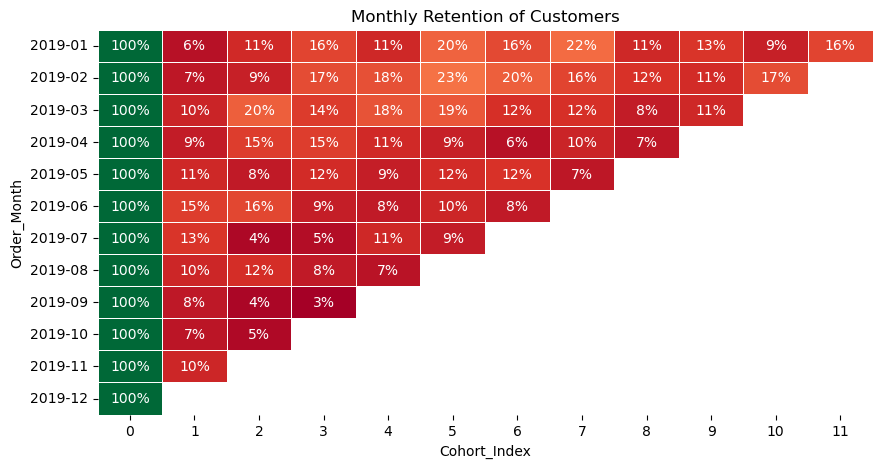

In [24]:
# plot heatmap of retention

plt.figure(figsize = (10, 5))
plt.title("Monthly Retention of Customers")
sns.heatmap(retention_pct, annot = True, cmap = 'RdYlGn', cbar = False, fmt = '.0%', linewidth = 0.5)
plt.show()

## 2c. How the revenues from existing/new customers on month on month basis

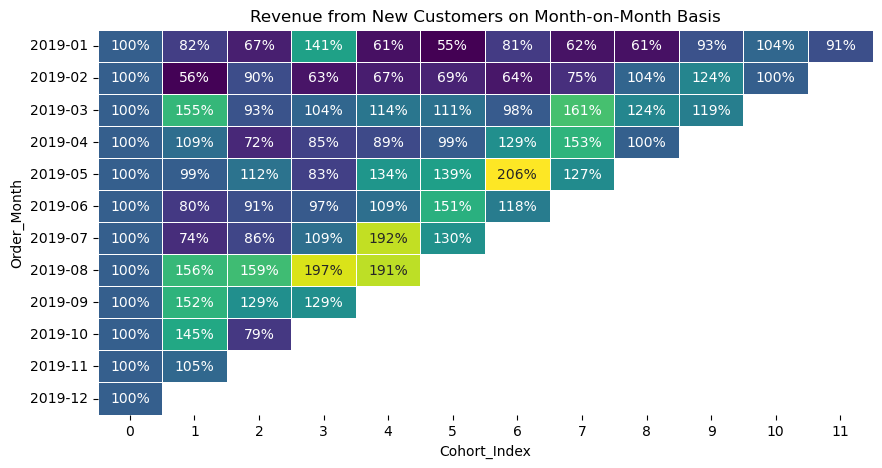

In [25]:
# revenue from new customers - group by Order Month and Cohort Index

df_monthly_rev_new = pd.DataFrame(df.groupby(['Order_Month', 'Cohort_Index']).Invoice_Value.mean()).reset_index()
monthly_rev_new = df_monthly_rev_new.pivot_table(index = 'Order_Month', columns = 'Cohort_Index', values = 'Invoice_Value')
cohort_size = monthly_rev_new.iloc[:,0]
monthly_rev_pct_new = monthly_rev_new.divide(cohort_size, axis = 0)
monthly_rev_pct_new
plt.figure(figsize = (10, 5))
plt.title("Revenue from New Customers on Month-on-Month Basis")
sns.heatmap(monthly_rev_pct_new, annot = True, cmap = 'viridis', cbar = False, fmt = '.0%', linewidth = 0.5)
plt.show()

### Revenue from Existing Customers 

Anyone with Cohort Index greater than 0 is an existing customer. So filter the data for cohort index greater than zero and group by Cohort Index and Transaction Month.

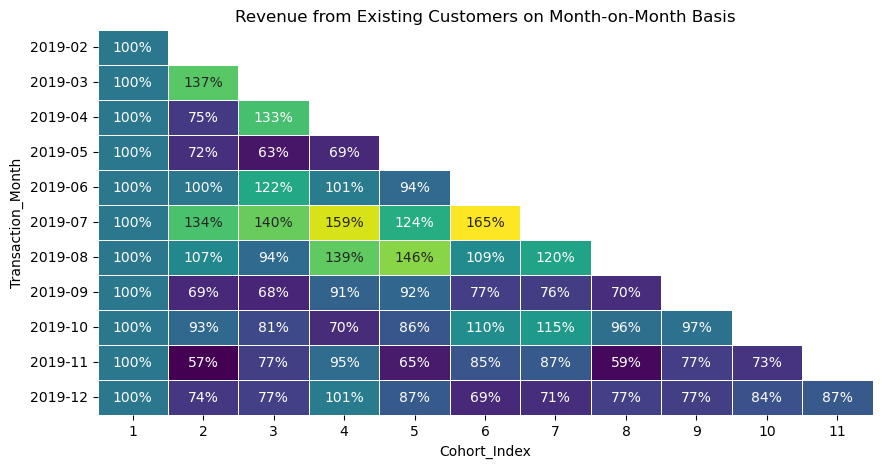

In [26]:
df_monthly_rev_existing = df.loc[df.Cohort_Index > 0, ]
df_monthly_rev_existing = pd.DataFrame(df_monthly_rev_existing.groupby(['Cohort_Index', 'Transaction_Month']).Invoice_Value.mean()).reset_index()
df_monthly_rev_existing

monthly_rev_existing = df_monthly_rev_existing.pivot_table(index = 'Transaction_Month', columns = 'Cohort_Index', values = 'Invoice_Value')
cohort_size = monthly_rev_existing.iloc[:,0]
monthly_rev_pct_existing = monthly_rev_existing.divide(cohort_size, axis = 0)
monthly_rev_pct_existing

plt.figure(figsize = (10, 5))
plt.title("Revenue from Existing Customers on Month-on-Month Basis")
sns.heatmap(monthly_rev_pct_existing, annot = True, cmap = 'viridis', cbar = False, fmt = '.0%', linewidth = 0.5)
plt.show()

From the above heatmap, we can infer that customers who were acquired in Jan generated 93% of the revenue in Feb, 72% of revenue in Mar, 131% of revenue in Apr and so and so forth. Further, customers who were acquired in Feb, generated 99% of revenue in Mar. Customers who were acquired in Mar generated generated 174% of revenue in Apr, 94% of revenue in May and so and so forth.

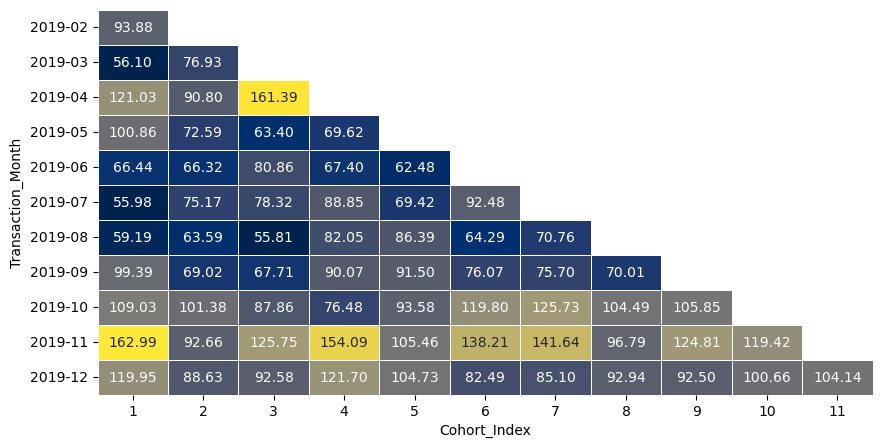

In [27]:
# heatmap of mean of monthly revenues from the new and existing customers

plt.figure(figsize = (10, 5))
sns.heatmap(monthly_rev_existing, annot = True, fmt = '.2f', cbar = False, cmap = 'cividis', linecolor = 'White', linewidths = 0.5)
plt.show()

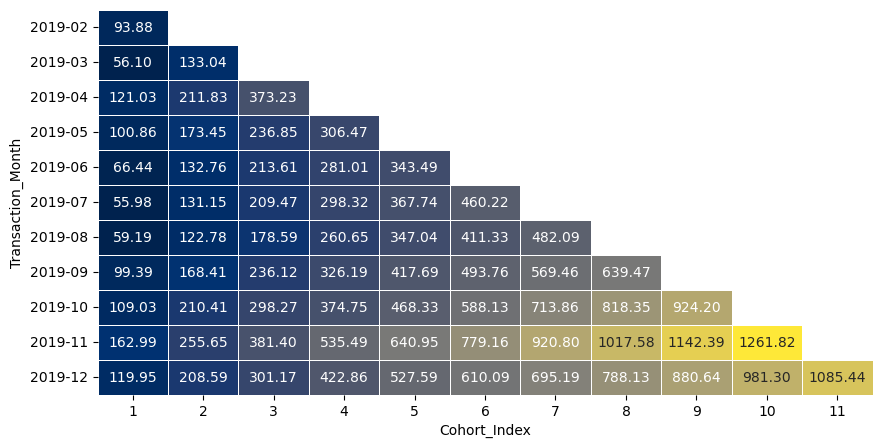

In [28]:
# heatmap of cumuluative sum of mean of revenue from new and existing customers

plt.figure(figsize = (10, 5))
sns.heatmap(monthly_rev_existing.cumsum(axis = 1), annot = True, fmt = '.2f', cbar = False, cmap = 'cividis', linecolor = 'White', linewidths = 0.5)
plt.show()

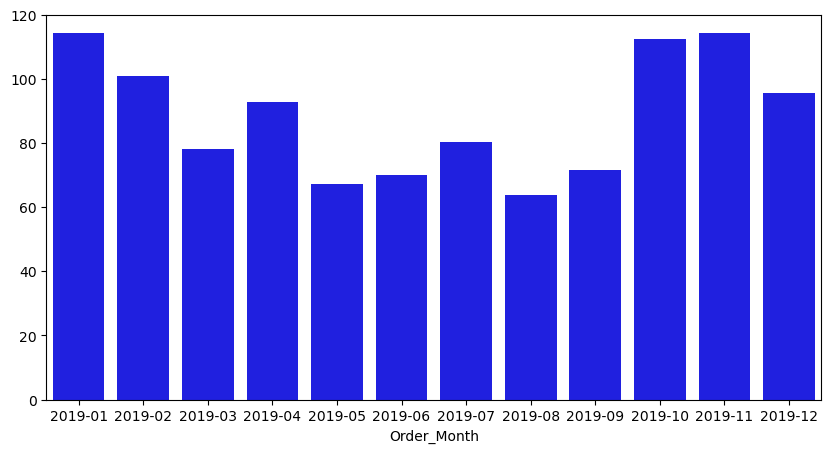

In [29]:
# revenue from new customers from Jan to Dec

plt.figure(figsize = (10, 5))
sns.barplot(x = monthly_rev_new[0].index, y = monthly_rev_new[0].values, color = 'Blue')
plt.show()

## 2d. How the discounts playing role in the revenues?

### First we will analyze the effect of discount on revenue on individual Coupon_Code and Coupon_Status level. 

In [30]:
# Grouping the data by Coupon Code and Discount Pct and taking the sum and mean of Invoice value

coupon_data = df.groupby(['Coupon_Code', 'Coupon_Status']).Invoice_Value.mean().reset_index()
coupon_data.head()

Coupon_Code Coupon_Status  Invoice_Value
0       ACC10       Clicked          28.56
1       ACC10      Not Used         181.20
2       ACC10          Used          91.31
3       ACC20       Clicked          21.52
4       ACC20      Not Used          16.85

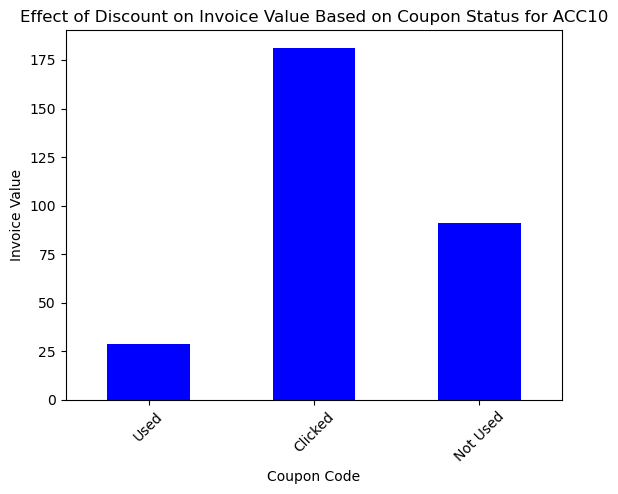

In [31]:
coupon_data.loc[coupon_data.Coupon_Code == 'ACC10', ].plot(kind = 'bar', color = 'blue', legend = False)
plt.title('Effect of Discount on Invoice Value Based on Coupon Status for ACC10')
plt.xlabel('Coupon Code')
plt.ylabel('Invoice Value')
plt.xticks(ticks = [0,1,2],labels = ['Used', 'Clicked', 'Not Used'], rotation = 45)
plt.show()

For coupon code ACC10, Clicked coupon status has maximum revenue followed by Not Used and Used.

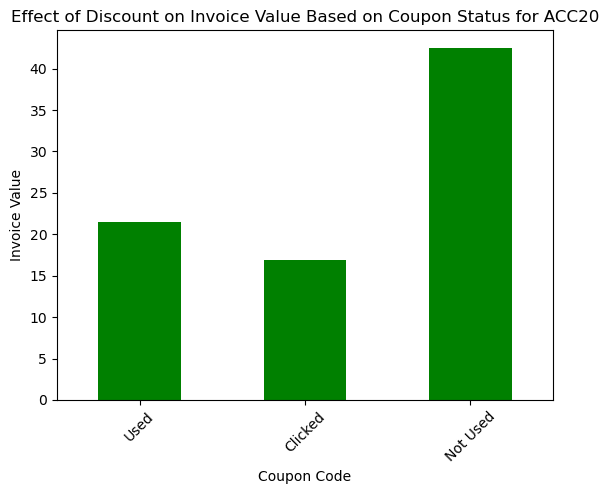

In [32]:
coupon_data.loc[coupon_data.Coupon_Code == 'ACC20', ].plot(kind = 'bar', color = 'green', legend = False)
plt.title('Effect of Discount on Invoice Value Based on Coupon Status for ACC20')
plt.xlabel('Coupon Code')
plt.ylabel('Invoice Value')
plt.xticks(ticks = [0,1,2],labels = ['Used', 'Clicked', 'Not Used'], rotation = 45)
plt.show()

For Coupon Code ACC20, Not Used coupon status has the maximum revenue. We can infer that for this coupon code majority of people must have clicked this coupon code but did not used while making the final purchase. This may mean that either the coupon code did not apply or it was erroneaously displayed as used but did not apply in actual. 

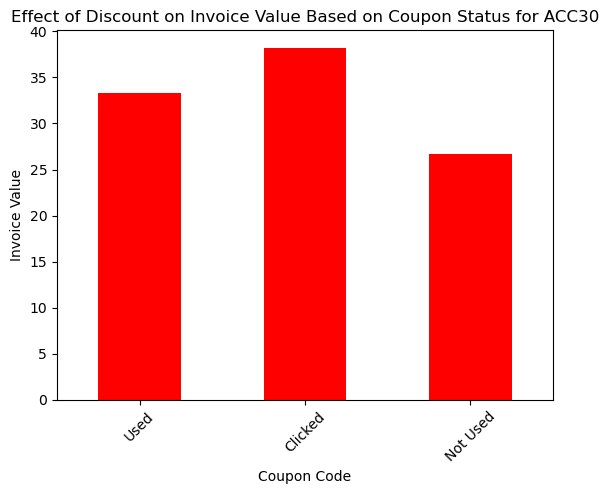

In [33]:
coupon_data.loc[coupon_data.Coupon_Code == 'ACC30', ].plot(kind = 'bar', color = 'red', legend = False)
plt.title('Effect of Discount on Invoice Value Based on Coupon Status for ACC30')
plt.xlabel('Coupon Code')
plt.ylabel('Invoice Value')
plt.xticks(ticks = [0,1,2],labels = ['Used', 'Clicked', 'Not Used'], rotation = 45)
plt.show()

For Coupon Code ACC30, Clicked coupon status has the maximum revenue which is closely followed by Used coupon status. We can infer that in this coupon code, majority of the people have clicked but failed to avail to the discount. This may mean that either the coupon code did not apply or it was erroneaously displayed as used but did not apply in actual. 

## Now evaluating the effect of Discount on the overall revenue

In [34]:
for val in df.Discount_pct.unique():
    print(f'Invoice Value for Discount Percentage {val} :',round((df.loc[df.Discount_pct == val, 'Invoice_Value']).sum(),2))

Invoice Value for Discount Percentage 10 : 1770784.74
Invoice Value for Discount Percentage 20 : 1529150.01
Invoice Value for Discount Percentage 30 : 1377627.47


In [35]:
for val in df.Discount_pct.unique():
    print(f'Average Invoice Value for Discount Percentage {val} :',round((df.loc[df.Discount_pct == val, 'Invoice_Value']).mean(),2))

Average Invoice Value for Discount Percentage 10 : 101.36
Average Invoice Value for Discount Percentage 20 : 85.76
Average Invoice Value for Discount Percentage 30 : 79.98


As the Discount percentage increases the average revenue is decreasing. Ideally with the increase in discount %age the total revenue from sales should have increased. The maximum sales are with the discount of 10%. Therefore, additional discount coupons are not resulting into equivalent sales.

## 2e. Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc

In [36]:
df['WeekDay'] = df.Transaction_Date.dt.day_name()
df['Week'] = df.Transaction_Date.dt.isocalendar().week
# df.to_excel('df.xlsx')
df.head()

CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850          16679       2019-01-01  GGOENEBJ079499   
1      17850          16680       2019-01-01  GGOENEBJ079499   
2      13047          16684       2019-01-01  GGOENEBQ078999   
3      13047          16684       2019-01-01  GGOENEBQ079199   
4      13047          16688       2019-01-01  GGOENEBB078899   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA   
3      Nest Protect Smoke + CO White Wired Alarm-USA         Nest-USA   
4              Nest Cam Indoor Security Camera - USA         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Month Coupon_Code  \
0         1     153.71              6.50          Used   Jan      ELEC10   
1         1     153.71              6.50          Used   Jan      ELEC10   
2         2     122.77              6.50       Clicked   Jan      ELEC10   
3         1      81.50              6.50          Used   Jan      ELEC10   
4         1     122.77              6.50          Used   Jan      ELEC10   

   Discount_pct  GST  Invoice_Value Transaction_Month Order_Month  \
0            10 0.10         158.67           2019-01     2019-01   
1            10 0.10         158.67           2019-01     2019-01   
2            10 0.10         249.58           2019-01     2019-01   
3            10 0.10          87.19           2019-01     2019-01   
4            10 0.10         128.04           2019-01     2019-01   

   Cohort_Index  WeekDay  Week  
0             0  Tuesday     1  
1             0  Tuesday     1  
2             0  Tuesday     1  
3             0  Tuesday     1  
4             0  Tuesday     1

### 2e-1. Revenue by category and by month

In [37]:
rev_by_prod_month = df.groupby(['Product_Category','Month']).Invoice_Value.sum().reset_index()
accessories = rev_by_prod_month.loc[rev_by_prod_month.Product_Category == 'Accessories',]
accessories.sort_values(by = 'Invoice_Value', ascending = False, ignore_index = True)

Product_Category Month  Invoice_Value
0       Accessories   Nov        2235.55
1       Accessories   Jul        1960.21
2       Accessories   Oct        1829.16
3       Accessories   Sep        1202.88
4       Accessories   Dec        1007.52
5       Accessories   Aug         351.29
6       Accessories   Jun         215.94
7       Accessories   Apr         190.29
8       Accessories   May         174.03
9       Accessories   Jan          57.55
10      Accessories   Mar          52.69

For part of the year till August, sales of Accessories do not pick except for July being an outlier for the duration. However, commencing September, sales of Accessories suddenly picks up till November and then again drops in December. Most probably there is a cycle where the sales of Accessories picks up after Aug every year while peaking during Nov and then decline starts from Dec till Aug next year. 

We can do similar analysis for all the product categories. 

### 2e-2. No of orders by product category by month

In [38]:
orders_by_month = df.groupby(['Product_Category','Month']).Transaction_ID.nunique().reset_index()
accessories = orders_by_month.loc[orders_by_month.Product_Category == 'Accessories',]
accessories.rename(columns = {'Transaction_ID' : 'No_of_Orders'}, inplace = True)
accessories.sort_values(by = 'No_of_Orders', ascending = False, ignore_index = True)

Product_Category Month  No_of_Orders
0       Accessories   Nov            60
1       Accessories   Dec            47
2       Accessories   Oct            42
3       Accessories   Sep            12
4       Accessories   Aug             8
5       Accessories   Jun             6
6       Accessories   May             6
7       Accessories   Jul             5
8       Accessories   Apr             3
9       Accessories   Jan             1
10      Accessories   Mar             1

As could be predicted from the sales data of Accessories for the months, maximum number of orders for Accessories has been placed after August with maximum no of orders being placed in Nov followed by Dec and October. Jan and Mar are the months receiving minimum no of orders for product category Accessories. 

### 2e-3. Average Order value by product category by month

In [39]:
orders_value_by_cat_month = df.groupby(['Product_Category','Month']).Avg_Price.sum().reset_index()
accessories = orders_value_by_cat_month.loc[orders_value_by_cat_month.Product_Category == 'Accessories',]
accessories.sort_values(by = 'Avg_Price', ascending = False, ignore_index = True)

Product_Category Month  Avg_Price
0       Accessories   Nov     286.37
1       Accessories   Oct     240.71
2       Accessories   Dec     216.99
3       Accessories   Jun     207.73
4       Accessories   Jul     190.74
5       Accessories   Sep     190.07
6       Accessories   Aug     169.12
7       Accessories   Apr     166.96
8       Accessories   May     141.14
9       Accessories   Mar      59.99
10      Accessories   Jan      51.57

### 2e-4. No of customers (existing/new) by product category by month

In [40]:
no_cust_by_cat_month = df.groupby(['Product_Category','Month']).CustomerID.nunique().reset_index()
accessories = no_cust_by_cat_month.loc[no_cust_by_cat_month.Product_Category == 'Accessories',]
accessories.rename(columns = {'CustomerID' : 'No_of_Customers'}, inplace = True)
accessories.sort_values(by = 'No_of_Customers', ascending = False, ignore_index = True)

Product_Category Month  No_of_Customers
0       Accessories   Nov               47
1       Accessories   Dec               39
2       Accessories   Oct               33
3       Accessories   Sep               12
4       Accessories   Aug                8
5       Accessories   Jun                6
6       Accessories   May                6
7       Accessories   Jul                4
8       Accessories   Apr                3
9       Accessories   Jan                1
10      Accessories   Mar                1

Same trend is visible for the no of customers by product category by month. For Accessories, maximum no of existing / new customers are in Nov followed by Dec and Oct. Therefore, the sales of Accessories generally picks up in the second half of the year. 

### 2e-5. Quantity by product category by month

In [41]:
qty_by_cat_month = df.groupby(['Product_Category','Month']).Quantity.sum().reset_index()
accessories = qty_by_cat_month.loc[qty_by_cat_month.Product_Category == 'Accessories',]
accessories.sort_values(by = 'Quantity', ascending = False, ignore_index = True)

Product_Category Month  Quantity
0       Accessories   Nov       563
1       Accessories   Oct       201
2       Accessories   Dec       200
3       Accessories   Sep        56
4       Accessories   Jul        44
5       Accessories   Aug        14
6       Accessories   Jun         7
7       Accessories   May         6
8       Accessories   Apr         4
9       Accessories   Jan         1
10      Accessories   Mar         1

### 2e-6. Revenue by category and by Week

In [42]:
rev_by_prod_week = df.groupby(['Product_Category','Week']).Invoice_Value.sum().reset_index()
accessories = rev_by_prod_week.loc[rev_by_prod_week.Product_Category == 'Accessories',]
accessories.sort_values(by = 'Invoice_Value', ascending = False, ignore_index = True)

Product_Category  Week  Invoice_Value
0       Accessories    27        1846.52
1       Accessories    37         953.29
2       Accessories    45         771.13
3       Accessories    46         673.84
4       Accessories    42         644.50
5       Accessories    43         641.28
6       Accessories    50         499.30
7       Accessories    47         408.17
8       Accessories    44         328.86
9       Accessories    48         312.82
10      Accessories    49         280.98
11      Accessories    34         184.42
12      Accessories    51         179.48
13      Accessories    41         164.70
14      Accessories    22         161.69
15      Accessories    40         130.10
16      Accessories    35         124.05
17      Accessories    14         121.88
18      Accessories    38         100.58
19      Accessories    26          69.86
20      Accessories    20          68.62
21      Accessories    33          62.85
22      Accessories     5          57.55
23      Accessories    10          52.69
24      Accessories    39          49.92
25      Accessories    30          47.57
26      Accessories    29          46.16
27      Accessories    17          45.59
28      Accessories    32          42.28
29      Accessories    31          36.79
30      Accessories    23          32.93
31      Accessories    52          26.36
32      Accessories    16          22.82
33      Accessories    19          20.95
34      Accessories    28          19.95
35      Accessories    21          17.96
36      Accessories    18          17.96
37      Accessories     1          10.70

### 2e-7. No of orders by product category and by Week

In [43]:
orders_by_prod_week = df.groupby(['Product_Category','Week']).Transaction_ID.nunique().reset_index()
accessories = orders_by_prod_week.loc[orders_by_prod_week.Product_Category == 'Accessories',]
accessories.rename(columns = {'Transaction_ID' : 'No_of_Orders'}, inplace = True)
accessories.sort_values(by = 'No_of_Orders', ascending = False, ignore_index = True)

Product_Category  Week  No_of_Orders
0       Accessories    46            23
1       Accessories    43            16
2       Accessories    50            15
3       Accessories    49            14
4       Accessories    44            14
5       Accessories    51            13
6       Accessories    48            12
7       Accessories    45            12
8       Accessories    41             9
9       Accessories    47             8
10      Accessories    42             7
11      Accessories    39             4
12      Accessories    33             3
13      Accessories    35             3
14      Accessories    38             3
15      Accessories    37             3
16      Accessories    52             3
17      Accessories    22             3
18      Accessories    23             2
19      Accessories    20             2
20      Accessories    34             2
21      Accessories    27             2
22      Accessories    40             2
23      Accessories    26             2
24      Accessories    10             1
25      Accessories    14             1
26      Accessories    16             1
27      Accessories    17             1
28      Accessories    18             1
29      Accessories    19             1
30      Accessories    31             1
31      Accessories    21             1
32      Accessories    32             1
33      Accessories    28             1
34      Accessories    29             1
35      Accessories    30             1
36      Accessories     5             1
37      Accessories     1             1

### 2e-8. Average Order value by product category by week

In [44]:
orders_value_by_cat_week = df.groupby(['Product_Category','Week']).Avg_Price.sum().reset_index()
accessories = orders_value_by_cat_week.loc[orders_value_by_cat_week.Product_Category == 'Accessories',]
accessories.sort_values(by = 'Avg_Price', ascending = False, ignore_index = True)

Product_Category  Week  Avg_Price
0       Accessories    22     163.56
1       Accessories    14     109.98
2       Accessories    37     106.56
3       Accessories    46     103.09
4       Accessories    27     101.57
5       Accessories    50      78.43
6       Accessories    35      69.17
7       Accessories    42      68.93
8       Accessories    43      67.00
9       Accessories    44      66.60
10      Accessories    45      64.84
11      Accessories    49      63.89
12      Accessories    48      63.49
13      Accessories    10      59.99
14      Accessories    51      59.01
15      Accessories    41      57.11
16      Accessories    26      56.98
17      Accessories    20      56.98
18      Accessories    34      55.98
19      Accessories     5      51.57
20      Accessories    33      50.97
21      Accessories    30      41.99
22      Accessories    17      39.99
23      Accessories    31      34.99
24      Accessories    29      33.59
25      Accessories    47      31.09
26      Accessories    23      27.18
27      Accessories    19      16.99
28      Accessories    16      16.99
29      Accessories    39      15.96
30      Accessories    32      13.59
31      Accessories    28      13.59
32      Accessories    21      13.59
33      Accessories    18      13.59
34      Accessories    38      11.97
35      Accessories    52       9.56
36      Accessories    40       7.98
37      Accessories     1       3.05

### 2e-9. No of customers (existing/new) by product category by week

In [45]:
no_cust_by_cat_week = df.groupby(['Product_Category','Week']).CustomerID.nunique().reset_index()
accessories = no_cust_by_cat_week.loc[no_cust_by_cat_week.Product_Category == 'Accessories',]
accessories.rename(columns = {'CustomerID' : 'No_of_Customers'}, inplace = True)
accessories.sort_values(by = 'No_of_Customers', ascending = False, ignore_index = True)

Product_Category  Week  No_of_Customers
0       Accessories    46               15
1       Accessories    44               14
2       Accessories    51               12
3       Accessories    49               12
4       Accessories    50               11
5       Accessories    43               11
6       Accessories    48               10
7       Accessories    45               10
8       Accessories    47                7
9       Accessories    42                7
10      Accessories    41                6
11      Accessories    39                4
12      Accessories    33                3
13      Accessories    35                3
14      Accessories    38                3
15      Accessories    37                3
16      Accessories    52                3
17      Accessories    22                3
18      Accessories    23                2
19      Accessories    20                2
20      Accessories    34                2
21      Accessories    40                2
22      Accessories    26                2
23      Accessories    10                1
24      Accessories    14                1
25      Accessories    16                1
26      Accessories    17                1
27      Accessories    18                1
28      Accessories    19                1
29      Accessories    31                1
30      Accessories    21                1
31      Accessories    32                1
32      Accessories    27                1
33      Accessories    28                1
34      Accessories    29                1
35      Accessories    30                1
36      Accessories     5                1
37      Accessories     1                1

### 2e-10. Quantity by product category by week

In [46]:
qty_by_cat_week = df.groupby(['Product_Category','Week']).Quantity.sum().reset_index()
accessories = qty_by_cat_week.loc[qty_by_cat_week.Product_Category == 'Accessories',]
accessories.sort_values(by = 'Quantity', ascending = False, ignore_index = True)

Product_Category  Week  Quantity
0       Accessories    45       221
1       Accessories    46       141
2       Accessories    50       131
3       Accessories    47       126
4       Accessories    43        73
5       Accessories    48        67
6       Accessories    44        61
7       Accessories    42        41
8       Accessories    27        41
9       Accessories    37        37
10      Accessories    49        36
11      Accessories    51        26
12      Accessories    40        21
13      Accessories    41        15
14      Accessories    38        11
15      Accessories    34         7
16      Accessories    39         6
17      Accessories    22         4
18      Accessories    33         3
19      Accessories    35         3
20      Accessories    52         3
21      Accessories     1         2
22      Accessories    14         2
23      Accessories    26         2
24      Accessories    23         2
25      Accessories    32         2
26      Accessories    20         2
27      Accessories    18         1
28      Accessories    10         1
29      Accessories    16         1
30      Accessories    17         1
31      Accessories     5         1
32      Accessories    19         1
33      Accessories    28         1
34      Accessories    29         1
35      Accessories    30         1
36      Accessories    31         1
37      Accessories    21         1

### 2e-11. Revenue by category and by day

In [47]:
rev_by_prod_day = df.groupby(['Product_Category','WeekDay']).Invoice_Value.sum().reset_index()
accessories = rev_by_prod_day.loc[rev_by_prod_day.Product_Category == 'Accessories',]
accessories.sort_values(by = 'Invoice_Value', ascending = False, ignore_index = True)

Product_Category    WeekDay  Invoice_Value
0      Accessories     Friday        2311.09
1      Accessories     Sunday        1895.65
2      Accessories   Thursday        1880.13
3      Accessories  Wednesday        1701.91
4      Accessories   Saturday         913.12
5      Accessories     Monday         353.63
6      Accessories    Tuesday         221.58

### 2e-12. No of orders by category and by day

In [48]:
orders_by_prod_weekday = df.groupby(['Product_Category','WeekDay']).Transaction_ID.nunique().reset_index()
accessories = orders_by_prod_weekday.loc[orders_by_prod_weekday.Product_Category == 'Accessories',]
accessories.rename(columns = {'Transaction_ID' : 'No_of_Orders'}, inplace = True)
accessories.sort_values(by = 'No_of_Orders', ascending = False, ignore_index = True)

Product_Category    WeekDay  No_of_Orders
0      Accessories  Wednesday            42
1      Accessories   Thursday            37
2      Accessories     Sunday            33
3      Accessories   Saturday            29
4      Accessories     Friday            22
5      Accessories     Monday            19
6      Accessories    Tuesday             9

### 2e-13. Average Order value by product category by day

In [49]:
orders_value_by_cat_weekday = df.groupby(['Product_Category','WeekDay']).Avg_Price.sum().reset_index()
accessories = orders_value_by_cat_weekday.loc[orders_value_by_cat_weekday.Product_Category == 'Accessories',]
accessories.sort_values(by = 'Avg_Price', ascending = False, ignore_index = True)

Product_Category    WeekDay  Avg_Price
0      Accessories     Sunday     433.88
1      Accessories   Thursday     352.87
2      Accessories  Wednesday     320.96
3      Accessories     Friday     291.36
4      Accessories   Saturday     269.47
5      Accessories     Monday     172.43
6      Accessories    Tuesday      80.42

### 2e-14. No of customers (existing/new) by product category by day

In [50]:
no_cust_by_cat_weekday = df.groupby(['Product_Category','WeekDay']).CustomerID.nunique().reset_index()
accessories = no_cust_by_cat_weekday.loc[no_cust_by_cat_weekday.Product_Category == 'Accessories',]
accessories.rename(columns = {'CustomerID' : 'No_of_Customers'}, inplace = True)
accessories.sort_values(by = 'No_of_Customers', ascending = False, ignore_index = True)

Product_Category    WeekDay  No_of_Customers
0      Accessories  Wednesday               36
1      Accessories     Sunday               29
2      Accessories   Thursday               29
3      Accessories   Saturday               24
4      Accessories     Friday               20
5      Accessories     Monday               18
6      Accessories    Tuesday                9

### 2e-15. Quantity by product category by day

In [51]:
qty_by_cat_weekday = df.groupby(['Product_Category','WeekDay']).Quantity.sum().reset_index()
accessories = qty_by_cat_weekday.loc[qty_by_cat_weekday.Product_Category == 'Accessories',]
accessories.sort_values(by = 'Quantity', ascending = False, ignore_index = True)

Product_Category    WeekDay  Quantity
0      Accessories   Thursday       335
1      Accessories  Wednesday       285
2      Accessories     Sunday       159
3      Accessories     Friday       124
4      Accessories   Saturday       123
5      Accessories     Monday        43
6      Accessories    Tuesday        28

## 2f. Understand the trends/seasonality of sales by category, location, month etc...

In [52]:
# merging main dataset with Customer dataset

df = df.merge(cust_data, on = 'CustomerID')
df.head()

CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850          16679       2019-01-01  GGOENEBJ079499   
1      17850          16680       2019-01-01  GGOENEBJ079499   
2      17850          16696       2019-01-01  GGOENEBQ078999   
3      17850          16699       2019-01-01  GGOENEBQ079099   
4      17850          16700       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA   
3    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   
4  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Month Coupon_Code  \
0         1     153.71              6.50          Used   Jan      ELEC10   
1         1     153.71              6.50          Used   Jan      ELEC10   
2         2     122.77              6.50      Not Used   Jan      ELEC10   
3         1      81.50              6.50       Clicked   Jan      ELEC10   
4         1     153.71              6.50       Clicked   Jan      ELEC10   

   Discount_pct  GST  Invoice_Value Transaction_Month Order_Month  \
0            10 0.10         158.67           2019-01     2019-01   
1            10 0.10         158.67           2019-01     2019-01   
2            10 0.10         249.58           2019-01     2019-01   
3            10 0.10          87.19           2019-01     2019-01   
4            10 0.10         158.67           2019-01     2019-01   

   Cohort_Index  WeekDay  Week Gender Location  Tenure_Months  
0             0  Tuesday     1      M  Chicago             12  
1             0  Tuesday     1      M  Chicago             12  
2             0  Tuesday     1      M  Chicago             12  
3             0  Tuesday     1      M  Chicago             12  
4             0  Tuesday     1      M  Chicago             12

### 2f-1. Understanding the seasonality for Accessories and California

In [53]:
sales_by_cat_loc_month = df.groupby(['Product_Category', 'Location','Month']).Invoice_Value.sum().reset_index()
seasonality_by_acc_cal = sales_by_cat_loc_month.loc[(sales_by_cat_loc_month.Product_Category == 'Accessories') & (sales_by_cat_loc_month.Location == 'California'), ]
seasonality_by_acc_cal.sort_values(by = 'Invoice_Value', ascending = False)

Product_Category    Location Month  Invoice_Value
2      Accessories  California   Jul        1846.52
5      Accessories  California   Nov        1108.97
7      Accessories  California   Sep         964.29
6      Accessories  California   Oct         389.10
1      Accessories  California   Dec         248.70
3      Accessories  California   Jun         180.40
0      Accessories  California   Aug          66.85
4      Accessories  California   May          38.91

### For Accessories in California, the sales in Jul are at maximum and sales pick up in the months post September. In general, the festive season tends to commence from September onwards and culminates in Dec. That is why the sales are highest in Sep and Nov with a dip in Oct and final dip in Dec. Sales in month of Jul are exception which may be because of 04 Jul (USA Independence Day). 

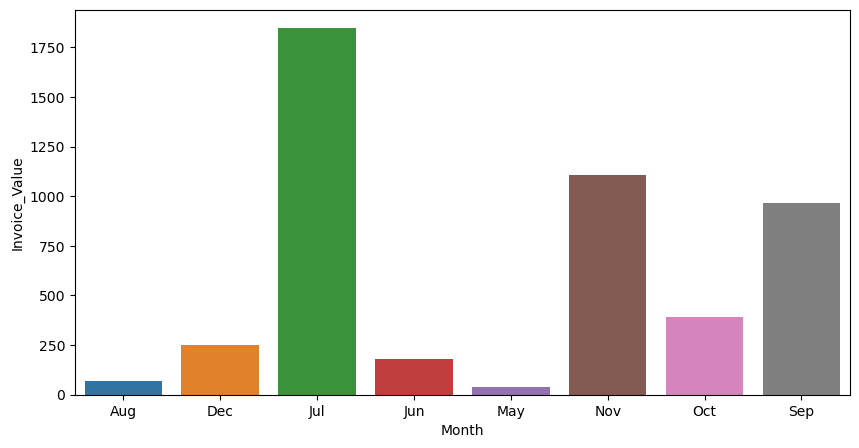

In [54]:
plt.figure(figsize = (10, 5))
sns.barplot(x = seasonality_by_acc_cal.Month, y = seasonality_by_acc_cal.Invoice_Value)
plt.show()

## 2g. How number of order and sales varies with different days?

In [55]:
sales_by_weekday = df.groupby(['WeekDay']).Invoice_Value.sum().reset_index()
sales_by_weekday.sort_values(by = 'Invoice_Value', ascending = False, ignore_index = True)

WeekDay  Invoice_Value
0     Friday      863640.25
1   Thursday      844954.59
2  Wednesday      832653.14
3     Sunday      702605.64
4   Saturday      688422.92
5    Tuesday      390692.98
6     Monday      354592.70

In [56]:
order_by_weekday = df.groupby('WeekDay').Quantity.sum().reset_index().sort_values(by = 'Quantity', 
                                                                                  ascending = False, 
                                                                                  ignore_index = True)
order_by_weekday

WeekDay  Quantity
0     Friday     51894
1   Thursday     44039
2     Sunday     39806
3  Wednesday     39685
4   Saturday     37811
5     Monday     11919
6    Tuesday     11213

## 2h. Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

In [57]:
# merging main dataset with marketing spend dataset

df = pd.merge(left = df, right = mark_spend, left_on =  'Transaction_Date', right_on = 'Date')
df.drop('Date', axis = 1, inplace = True)
df.head()

CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850          16679       2019-01-01  GGOENEBJ079499   
1      17850          16680       2019-01-01  GGOENEBJ079499   
2      17850          16696       2019-01-01  GGOENEBQ078999   
3      17850          16699       2019-01-01  GGOENEBQ079099   
4      17850          16700       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA   
3    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   
4  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Month Coupon_Code  \
0         1     153.71              6.50          Used   Jan      ELEC10   
1         1     153.71              6.50          Used   Jan      ELEC10   
2         2     122.77              6.50      Not Used   Jan      ELEC10   
3         1      81.50              6.50       Clicked   Jan      ELEC10   
4         1     153.71              6.50       Clicked   Jan      ELEC10   

   Discount_pct  GST  Invoice_Value Transaction_Month Order_Month  \
0            10 0.10         158.67           2019-01     2019-01   
1            10 0.10         158.67           2019-01     2019-01   
2            10 0.10         249.58           2019-01     2019-01   
3            10 0.10          87.19           2019-01     2019-01   
4            10 0.10         158.67           2019-01     2019-01   

   Cohort_Index  WeekDay  Week Gender Location  Tenure_Months  Offline_Spend  \
0             0  Tuesday     1      M  Chicago             12           4500   
1             0  Tuesday     1      M  Chicago             12           4500   
2             0  Tuesday     1      M  Chicago             12           4500   
3             0  Tuesday     1      M  Chicago             12           4500   
4             0  Tuesday     1      M  Chicago             12           4500   

   Online_Spend  
0       2424.50  
1       2424.50  
2       2424.50  
3       2424.50  
4       2424.50

### 2h-1. Revenue by month

In [58]:
rev_by_month = df.groupby('Month').Invoice_Value.sum().reset_index().sort_values(by = 'Invoice_Value', 
                                                                                 ascending = False, 
                                                                                 ignore_index = True)
rev_by_month

Month  Invoice_Value
0    Nov      475482.20
1    Jan      460087.03
2    Oct      448939.11
3    Apr      441974.39
4    Dec      439530.03
5    Jul      419784.21
6    Aug      415699.17
7    Mar      330923.97
8    Feb      324330.67
9    Sep      320048.22
10   May      313637.97
11   Jun      287125.25

In [59]:
# to show the data month wise in ascending order of month name - when we specify categories pandas remembers the
# order of specification as the default sort order. 

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)
rev_by_month = df.groupby('Month').Invoice_Value.sum().reset_index()
rev_by_month

Month  Invoice_Value
0    Jan      460087.03
1    Feb      324330.67
2    Mar      330923.97
3    Apr      441974.39
4    May      313637.97
5    Jun      287125.25
6    Jul      419784.21
7    Aug      415699.17
8    Sep      320048.22
9    Oct      448939.11
10   Nov      475482.20
11   Dec      439530.03

### 2h-1. Marketing Spend by month

In [60]:
mark_spend['Month'] = mark_spend.Date.dt.strftime('%b')
mark_spend['Total_Mark_Spend'] = mark_spend.Offline_Spend + mark_spend.Online_Spend
mark_spend.head()

Date  Offline_Spend  Online_Spend Month  Total_Mark_Spend
0 2019-01-01           4500       2424.50   Jan           6924.50
1 2019-01-02           4500       3480.36   Jan           7980.36
2 2019-01-03           4500       1576.38   Jan           6076.38
3 2019-01-04           4500       2928.55   Jan           7428.55
4 2019-01-05           4500       4055.30   Jan           8555.30

In [61]:
mark_spend_by_month = mark_spend.groupby('Month').Total_Mark_Spend.sum().reset_index()
mark_spend_by_month

Month  Total_Mark_Spend
0    Apr         157026.83
1    Aug         142904.15
2    Dec         198648.75
3    Feb         137107.92
4    Jan         154928.95
5    Jul         120217.85
6    Jun         134318.14
7    Mar         122250.09
8    May         118259.64
9    Nov         161144.96
10   Oct         151224.65
11   Sep         135514.54

### 2h-3. Percentage Marketing Spend out of Revenue by month

In [62]:
rev_markSpend_month = rev_by_month.merge(mark_spend_by_month, on ='Month')
rev_markSpend_month['Pct_Mark_Spend'] = (rev_markSpend_month.Total_Mark_Spend / rev_markSpend_month.Invoice_Value) * 100
rev_markSpend_month

Month  Invoice_Value  Total_Mark_Spend  Pct_Mark_Spend
0    Jan      460087.03         154928.95           33.67
1    Feb      324330.67         137107.92           42.27
2    Mar      330923.97         122250.09           36.94
3    Apr      441974.39         157026.83           35.53
4    May      313637.97         118259.64           37.71
5    Jun      287125.25         134318.14           46.78
6    Jul      419784.21         120217.85           28.64
7    Aug      415699.17         142904.15           34.38
8    Sep      320048.22         135514.54           42.34
9    Oct      448939.11         151224.65           33.68
10   Nov      475482.20         161144.96           33.89
11   Dec      439530.03         198648.75           45.20

In [63]:
# to sort the dataframe as per Month names

sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
rev_markSpend_month.index = pd.CategoricalIndex(rev_markSpend_month['Month'], categories = sort_order, ordered = True)
rev_markSpend_month = rev_markSpend_month.sort_index().reset_index(drop = True)
rev_markSpend_month

Month  Invoice_Value  Total_Mark_Spend  Pct_Mark_Spend
0    Jan      460087.03         154928.95           33.67
1    Feb      324330.67         137107.92           42.27
2    Mar      330923.97         122250.09           36.94
3    Apr      441974.39         157026.83           35.53
4    May      313637.97         118259.64           37.71
5    Jun      287125.25         134318.14           46.78
6    Jul      419784.21         120217.85           28.64
7    Aug      415699.17         142904.15           34.38
8    Sep      320048.22         135514.54           42.34
9    Oct      448939.11         151224.65           33.68
10   Nov      475482.20         161144.96           33.89
11   Dec      439530.03         198648.75           45.20

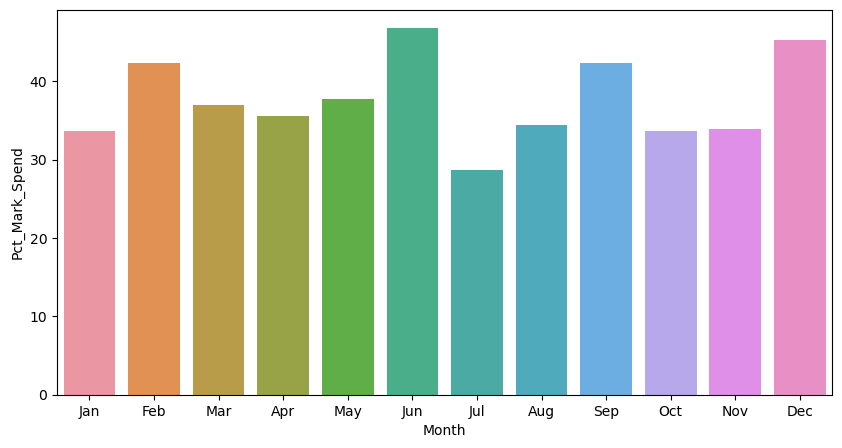

In [64]:
plt.figure(figsize = (10, 5))
sns.barplot(x = rev_markSpend_month.Month, y = rev_markSpend_month.Pct_Mark_Spend)
plt.show()

### 2h-4. Tax by month

Tax_Paid = ((Quantity * Avg_Price) * GST)

In [65]:
df['tax_paid'] = (df.Quantity * df.Avg_Price) * df.GST
tax_by_month = df.groupby('Month').tax_paid.sum().reset_index().sort_values(by = 'tax_paid', ascending = False, ignore_index = True)
tax_by_month

Month  tax_paid
0    Dec  50524.72
1    Apr  48760.95
2    Nov  45410.17
3    Jan  45262.15
4    Aug  44434.18
5    Jul  43553.16
6    Mar  42312.81
7    Oct  39822.69
8    Sep  39182.99
9    Jun  38160.27
10   May  37158.19
11   Feb  36521.83

### 2h-5. Percentage of Delivery Charges out of Revenue by month

In [66]:
del_charge_by_month = df.groupby('Month').Delivery_Charges.sum().reset_index()
del_charge_rev_by_month = del_charge_by_month.merge(rev_by_month, on = 'Month')
del_charge_rev_by_month['Pct_Del_Charges'] = (del_charge_rev_by_month.Delivery_Charges / del_charge_rev_by_month.Invoice_Value) * 100
del_charge_rev_by_month.index = pd.CategoricalIndex(del_charge_rev_by_month['Month'], categories = sort_order, ordered = True)
del_charge_rev_by_month.sort_index().reset_index(drop = True)

Month  Delivery_Charges  Invoice_Value  Pct_Del_Charges
0    Jan          58401.75      460087.03            12.69
1    Feb          48454.28      324330.67            14.94
2    Mar          59324.29      330923.97            17.93
3    Apr          40929.78      441974.39             9.26
4    May          40745.99      313637.97            12.99
5    Jun          37055.84      287125.25            12.91
6    Jul          48024.13      419784.21            11.44
7    Aug          60595.00      415699.17            14.58
8    Sep          40762.06      320048.22            12.74
9    Oct          45826.81      448939.11            10.21
10   Nov          32287.93      475482.20             6.79
11   Dec          37881.99      439530.03             8.62

### 2i. How marketing spend is impacting revenue?

In [67]:
rev_markSpend_month

Month  Invoice_Value  Total_Mark_Spend  Pct_Mark_Spend
0    Jan      460087.03         154928.95           33.67
1    Feb      324330.67         137107.92           42.27
2    Mar      330923.97         122250.09           36.94
3    Apr      441974.39         157026.83           35.53
4    May      313637.97         118259.64           37.71
5    Jun      287125.25         134318.14           46.78
6    Jul      419784.21         120217.85           28.64
7    Aug      415699.17         142904.15           34.38
8    Sep      320048.22         135514.54           42.34
9    Oct      448939.11         151224.65           33.68
10   Nov      475482.20         161144.96           33.89
11   Dec      439530.03         198648.75           45.20

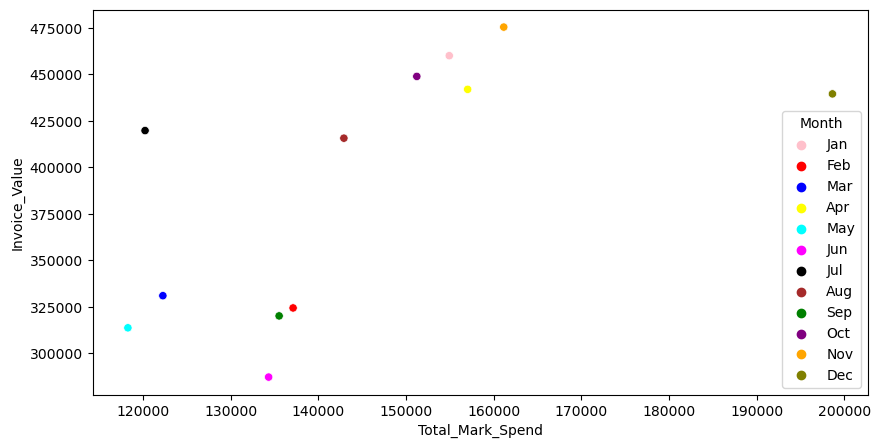

In [68]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Total_Mark_Spend', y = 'Invoice_Value', hue = 'Month', data = rev_markSpend_month, 
               palette = ['pink','red','blue','yellow','cyan','magenta','black','brown','green','purple','orange','olive'])
plt.show()

There is a positive correlation between Marketing Spend and Revenue. As the marketing spend increases, the revenue is also increasing. However, Jul is an exception where even with low marketing spend the revenue is high. That may be because of higher sales around 04 Jul being Independece Day in US. Marketing spend for Mar and May is lower than that of other months which may indicate lean period for the company. The revenue in these two 
months is also very low. 

In [69]:
from scipy.stats import pearsonr

In [70]:
pearsonr(rev_markSpend_month.Total_Mark_Spend, rev_markSpend_month.Invoice_Value)

PearsonRResult(statistic=0.6277211041446129, pvalue=0.02886327474709186)

The result is substantiated by the correlation coefficient calculated from pearson's r. The test p-value indicates that Null Hypothesis (Ho --> there is no correlation between marketing spend and invoice value) is not true. 

### 2j. Which product appeared most in the transactions?

In [71]:
df.Product_Category.value_counts().reset_index()

Product_Category  count
0                Apparel  18126
1               Nest-USA  14013
2                 Office   6513
3              Drinkware   3483
4              Lifestyle   3092
5                   Nest   2198
6                   Bags   1882
7               Headgear    771
8   Notebooks & Journals    749
9                   Waze    554
10           Nest-Canada    317
11               Bottles    268
12           Accessories    234
13            Gift Cards    159
14            Housewares    122
15               Android     43

In [72]:
df.Product_Description.value_counts().reset_index()

Product_Description  count
0    Nest Learning Thermostat 3rd Gen-USA - Stainle...   3511
1               Nest Cam Outdoor Security Camera - USA   3328
2                Nest Cam Indoor Security Camera - USA   3230
3                                    Google Sunglasses   1523
4      Nest Protect Smoke + CO White Battery Alarm-USA   1361
..                                                 ...    ...
390                                     Google Tee Red      2
391                Compact Journal with Recycled Pages      1
392  Android Women's Short Sleeve Tri-blend Badge T...      1
393                 Google Large Standard Journal Grey      1
394                Google Women's Colorblock Tee White      1

[395 rows x 2 columns]

### 2k. Which product was purchased mostly based on the quantity?

In [73]:
df.groupby('Product_Description').Quantity.sum().reset_index().sort_values(by = 'Quantity', ascending = False, ignore_index = True)

Product_Description  Quantity
0                                             Maze Pen     16234
1                            Google 22 oz Water Bottle     14282
2                                    Google Sunglasses     11452
3                                            Sport Bag      7321
4                         Google Metallic Notebook Set      6496
..                                                 ...       ...
390                                     Google Tee Red         3
391                            Android 5-Panel Low Cap         3
392  Android Women's Short Sleeve Tri-blend Badge T...         1
393                Google Women's Colorblock Tee White         1
394                Compact Journal with Recycled Pages         1

[395 rows x 2 columns]

Maze Pen was purchased mostly based on the quantity. 

In [74]:
# df.to_excel('df.xlsx')

---

# Section 3

## Performing Customer Segmentation

### Section 3.1 - Heuristic (Value based & RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.

1. Recency - No of days since last purchase
2. Frequency - total number of purchases
3. Monetary - total money a customer has spent

In [20]:
# lets take an anchor date of 1 day after the max transaction date or the end of the year. In this case both are
# same

import datetime
anchor_dte = df.Transaction_Date.max() + datetime.timedelta(1)
anchor_dte

Timestamp('2020-01-01 00:00:00')

In [76]:
# create RFM table

rfm_table = df.groupby(['CustomerID']).agg({'Transaction_Date': lambda x : x.max(),
                                          'Transaction_ID' : lambda x : x.nunique(),
                                          'Invoice_Value' : lambda x : x.sum()})

rfm_table['Recency'] = (anchor_dte - rfm_table.Transaction_Date).dt.days # calculate recency and extract no of days from timedelta series
rfm_table.drop('Transaction_Date', axis = 1, inplace = True)
rfm_table.rename(columns = {'Transaction_ID':'Frequency', 'Invoice_Value':'Monetary'}, inplace = True)
rfm_table = rfm_table[['Recency', 'Frequency', 'Monetary']] # re-order the columns
rfm_table

Recency  Frequency  Monetary
CustomerID                              
12346           108          1    174.98
12347            60         31  12059.18
12348            74          8   1501.93
12350            18         11   1183.71
12356           108         13   1753.45
...             ...        ...       ...
18259           271          3    789.15
18260            88         19   2573.66
18269           195          2    155.66
18277            70          1    301.02
18283            83         53   6947.81

[1468 rows x 3 columns]

### Method 1 : RFM Analysis - Quantile Based

In [77]:
qntileBased_rfm = rfm_table.copy()

qntileBased_rfm['Monetary_Segment'] = pd.qcut(qntileBased_rfm.Monetary, 10, labels = False)
qntileBased_rfm[['Recency','Frequency','Monetary','Monetary_Segment']].groupby('Monetary_Segment').mean().T

Monetary_Segment      0      1      2       3       4       5       6       7  \
Recency          188.69 165.47 157.41  159.10  161.35  147.49  122.88  133.27   
Frequency          1.50   3.56   5.48    7.11    9.73   12.61   17.56   23.84   
Monetary          80.99 355.16 683.14 1022.93 1500.34 2061.87 2819.66 3938.23   

Monetary_Segment       8        9  
Recency           125.93    91.27  
Frequency          32.63    66.85  
Monetary         5905.13 13478.84

### Percentage Monetary contribution by each segment

In [78]:
qntileBased_rfm[['Monetary', 'Monetary_Segment']].groupby('Monetary_Segment').sum()/np.sum((qntileBased_rfm[['Monetary', 'Monetary_Segment']].groupby('Monetary_Segment').sum()))


Monetary
Monetary_Segment          
0                     0.00
1                     0.01
2                     0.02
3                     0.03
4                     0.05
5                     0.06
6                     0.09
7                     0.12
8                     0.19
9                     0.42

In [79]:
# Dividing the qntileBased_rfm into three categories for segmentation of the customers into different categories. 

rfm_qtiles = qntileBased_rfm.quantile(q = [0.25,0.5,0.75])
rfm_qtiles

Recency  Frequency  Monetary  Monetary_Segment
0.25    56.00       5.00    664.36              2.00
0.50   132.00      11.00   1770.55              4.50
0.75   221.00      23.00   3911.87              7.00

In [80]:
# Perform segmentation of the customers

qntileBased_rfm['Rec_Seg'] = np.where(qntileBased_rfm.Recency <= 56, 'Active', np.where(qntileBased_rfm.Recency <= 132, 'At_Risk', 'Churn'))
qntileBased_rfm['Fre_Seg'] = np.where(qntileBased_rfm.Frequency <= 5, 1, np.where(qntileBased_rfm.Frequency <= 11, 2, 3))
qntileBased_rfm['Mon_Seg'] = np.where(qntileBased_rfm.Monetary <= 664.36, 1, np.where(qntileBased_rfm.Monetary <= 1770.55, 2, 3))

qntileBased_rfm['FM_Seg'] = np.where(((qntileBased_rfm.Fre_Seg == 3) & (qntileBased_rfm.Mon_Seg == 3)), 'Platinum', 
                              np.where((((qntileBased_rfm.Fre_Seg == 3) & (qntileBased_rfm.Mon_Seg == 2)) | ((qntileBased_rfm.Fre_Seg == 2) & (qntileBased_rfm.Mon_Seg == 3))), 'Gold',
                              np.where((((qntileBased_rfm.Fre_Seg == 1) & (qntileBased_rfm.Mon_Seg == 3)) | ((qntileBased_rfm.Fre_Seg == 3) & (qntileBased_rfm.Mon_Seg == 1)) | ((qntileBased_rfm.Fre_Seg == 2) & (qntileBased_rfm.Mon_Seg == 2))),'Silver', 'Standard')))

qntileBased_rfm

Recency  Frequency  Monetary  Monetary_Segment  Rec_Seg  Fre_Seg  \
CustomerID                                                                     
12346           108          1    174.98                 0  At_Risk        1   
12347            60         31  12059.18                 9  At_Risk        3   
12348            74          8   1501.93                 4  At_Risk        2   
12350            18         11   1183.71                 3   Active        2   
12356           108         13   1753.45                 4  At_Risk        3   
...             ...        ...       ...               ...      ...      ...   
18259           271          3    789.15                 2    Churn        1   
18260            88         19   2573.66                 6  At_Risk        3   
18269           195          2    155.66                 0    Churn        1   
18277            70          1    301.02                 1  At_Risk        1   
18283            83         53   6947.81                 8  At_Risk        3   

            Mon_Seg    FM_Seg  
CustomerID                     
12346             1  Standard  
12347             3  Platinum  
12348             2    Silver  
12350             2    Silver  
12356             2      Gold  
...             ...       ...  
18259             2  Standard  
18260             3  Platinum  
18269             1  Standard  
18277             1  Standard  
18283             3  Platinum  

[1468 rows x 8 columns]

In [81]:
qntileBased_rfm.groupby(['Rec_Seg','FM_Seg'])[['Recency','Frequency','Monetary']].mean().T

Rec_Seg    Active                           At_Risk                            \
FM_Seg       Gold Platinum  Silver Standard    Gold Platinum  Silver Standard   
Recency     28.84    27.42   24.56    23.22   92.07    91.99   96.42    96.97   
Frequency   11.03    39.51    8.23     3.29   10.93    34.20    8.07     3.50   
Monetary  1981.02  7325.12 1115.39   479.66 2039.26  6085.39 1352.10   455.08   

Rec_Seg     Churn                            
FM_Seg       Gold Platinum  Silver Standard  
Recency    224.87   230.11  233.72   233.92  
Frequency   10.87    27.41    7.89     3.08  
Monetary  1904.07  4812.25 1271.68   408.89

In [82]:
qntileBased_rfm['rfm_seg'] = qntileBased_rfm['Rec_Seg'] +'_' + qntileBased_rfm['FM_Seg']
qntileBased_rfm

Recency  Frequency  Monetary  Monetary_Segment  Rec_Seg  Fre_Seg  \
CustomerID                                                                     
12346           108          1    174.98                 0  At_Risk        1   
12347            60         31  12059.18                 9  At_Risk        3   
12348            74          8   1501.93                 4  At_Risk        2   
12350            18         11   1183.71                 3   Active        2   
12356           108         13   1753.45                 4  At_Risk        3   
...             ...        ...       ...               ...      ...      ...   
18259           271          3    789.15                 2    Churn        1   
18260            88         19   2573.66                 6  At_Risk        3   
18269           195          2    155.66                 0    Churn        1   
18277            70          1    301.02                 1  At_Risk        1   
18283            83         53   6947.81                 8  At_Risk        3   

            Mon_Seg    FM_Seg           rfm_seg  
CustomerID                                       
12346             1  Standard  At_Risk_Standard  
12347             3  Platinum  At_Risk_Platinum  
12348             2    Silver    At_Risk_Silver  
12350             2    Silver     Active_Silver  
12356             2      Gold      At_Risk_Gold  
...             ...       ...               ...  
18259             2  Standard    Churn_Standard  
18260             3  Platinum  At_Risk_Platinum  
18269             1  Standard    Churn_Standard  
18277             1  Standard  At_Risk_Standard  
18283             3  Platinum  At_Risk_Platinum  

[1468 rows x 9 columns]

In [83]:
qntileBased_rfm.rfm_seg.value_counts().reset_index().rename(columns = {'index' : 'RFM_Seg', 'rfm_seg' : 'Count'})

Count  count
0     Churn_Standard    290
1     Churn_Platinum    237
2    Active_Platinum    231
3   At_Risk_Platinum    181
4       Churn_Silver    131
5   At_Risk_Standard    107
6         Churn_Gold     69
7    Active_Standard     58
8     At_Risk_Silver     55
9      Active_Silver     48
10       Active_Gold     32
11      At_Risk_Gold     29

### Customers to be targeted first - At_Risk_Gold and At_Risk_Platinum

In [84]:
high_priority_cust = list(qntileBased_rfm[((qntileBased_rfm.rfm_seg == 'At_Risk_Platinum') | (qntileBased_rfm.rfm_seg == 'At_Risk_Gold'))].index)
print(high_priority_cust)

['12347', '12356', '12383', '12393', '12413', '12417', '12421', '12451', '12472', '12474', '12490', '12510', '12553', '12578', '12591', '12637', '12652', '12683', '12708', '12744', '12748', '12782', '12854', '12872', '12916', '12947', '13001', '13048', '13081', '13098', '13107', '13117', '13155', '13158', '13162', '13168', '13198', '13246', '13263', '13267', '13310', '13385', '13455', '13458', '13520', '13599', '13659', '13700', '13742', '13769', '13782', '13798', '13815', '13859', '13862', '13969', '13982', '13983', '13999', '14031', '14049', '14060', '14062', '14068', '14088', '14092', '14099', '14130', '14135', '14175', '14189', '14224', '14243', '14257', '14307', '14320', '14329', '14334', '14341', '14404', '14409', '14415', '14439', '14525', '14534', '14543', '14572', '14646', '14657', '14667', '14680', '14692', '14696', '14713', '14733', '14748', '14769', '14779', '14796', '14849', '14916', '14978', '15023', '15033', '15052', '15059', '15061', '15078', '15110', '15167', '15179', 

In [85]:
df[df['CustomerID'].isin(high_priority_cust)].Location.value_counts()

Location
Chicago          4739
California       3454
New York         3045
New Jersey       1320
Washington DC     492
Name: count, dtype: int64

#### Majority of the customers belonging to At_Risk_Platinum and At_Risk_Gold category reside in Chicago area. Other than that a total of around 6.5k customers of this category reside in California and New York Category. Washington has least of them. 

### Method 2 : RFM Analysis - Sum Method

In [86]:
rfm_metho2 = rfm_table.copy()

In [87]:
rfm_metho2['R_seg'] = (pd.qcut(rfm_metho2.Recency, q = 4, labels = range(4,0,-1))).astype(int)
rfm_metho2['F_seg'] = (pd.qcut(rfm_metho2.Frequency, q = 4, labels = range(1,5))).astype(int)
rfm_metho2['M_seg'] = (pd.qcut(rfm_metho2.Monetary, q = 4, labels = range(1,5))).astype(int)

rfm_metho2['rfm_seg'] = rfm_metho2.R_seg.map(str) + rfm_metho2.F_seg.map(str) + rfm_metho2.M_seg.map(str)
print('No of RFM Segments = {}'.format(rfm_metho2.rfm_seg.nunique()))
rfm_metho2

No of RFM Segments = 46


Recency  Frequency  Monetary  R_seg  F_seg  M_seg rfm_seg
CustomerID                                                           
12346           108          1    174.98      3      1      1     311
12347            60         31  12059.18      3      4      4     344
12348            74          8   1501.93      3      2      2     322
12350            18         11   1183.71      4      2      2     422
12356           108         13   1753.45      3      3      2     332
...             ...        ...       ...    ...    ...    ...     ...
18259           271          3    789.15      1      1      2     112
18260            88         19   2573.66      3      3      3     333
18269           195          2    155.66      2      1      1     211
18277            70          1    301.02      3      1      1     311
18283            83         53   6947.81      3      4      4     344

[1468 rows x 7 columns]

As per this approach, any customer with 144 is the Platinum customer and 411 is Standard customer. Customers between these two categories can be categorised as Silver, Standard etc. However, the biggest drawback of this approach is very high number of categories (46) in our case which makes it difficult to profile the customers. 

In [88]:
# adding the values of R, F and M segments to create RFM category

rfm_metho2['rfm_seg_1'] = rfm_metho2[['R_seg','F_seg','M_seg']].sum(axis = 1)
rfm_metho2

Recency  Frequency  Monetary  R_seg  F_seg  M_seg rfm_seg  \
CustomerID                                                              
12346           108          1    174.98      3      1      1     311   
12347            60         31  12059.18      3      4      4     344   
12348            74          8   1501.93      3      2      2     322   
12350            18         11   1183.71      4      2      2     422   
12356           108         13   1753.45      3      3      2     332   
...             ...        ...       ...    ...    ...    ...     ...   
18259           271          3    789.15      1      1      2     112   
18260            88         19   2573.66      3      3      3     333   
18269           195          2    155.66      2      1      1     211   
18277            70          1    301.02      3      1      1     311   
18283            83         53   6947.81      3      4      4     344   

            rfm_seg_1  
CustomerID             
12346               5  
12347              11  
12348               7  
12350               8  
12356               8  
...               ...  
18259               4  
18260               9  
18269               4  
18277               5  
18283              11  

[1468 rows x 8 columns]

In [89]:
def cust_cat(x):
    if x >= 11:
        return 'Platinum'
    elif (x >= 8) and(x < 11):
        return 'Gold'
    elif (x > 5) and (x < 8):
        return 'Silver'
    else:
        return 'Standard'

In [90]:
rfm_metho2['Cust_Cat'] = rfm_metho2.rfm_seg_1.apply(cust_cat)
rfm_metho2

Recency  Frequency  Monetary  R_seg  F_seg  M_seg rfm_seg  \
CustomerID                                                              
12346           108          1    174.98      3      1      1     311   
12347            60         31  12059.18      3      4      4     344   
12348            74          8   1501.93      3      2      2     322   
12350            18         11   1183.71      4      2      2     422   
12356           108         13   1753.45      3      3      2     332   
...             ...        ...       ...    ...    ...    ...     ...   
18259           271          3    789.15      1      1      2     112   
18260            88         19   2573.66      3      3      3     333   
18269           195          2    155.66      2      1      1     211   
18277            70          1    301.02      3      1      1     311   
18283            83         53   6947.81      3      4      4     344   

            rfm_seg_1  Cust_Cat  
CustomerID                       
12346               5  Standard  
12347              11  Platinum  
12348               7    Silver  
12350               8      Gold  
12356               8      Gold  
...               ...       ...  
18259               4  Standard  
18260               9      Gold  
18269               4  Standard  
18277               5  Standard  
18283              11  Platinum  

[1468 rows x 9 columns]

In [91]:
rfm_metho2[rfm_metho2.Cust_Cat == 'Standard']

Recency  Frequency  Monetary  R_seg  F_seg  M_seg rfm_seg  \
CustomerID                                                              
12346           108          1    174.98      3      1      1     311   
12359           131          3    653.19      3      1      1     311   
12386           157          6    568.05      2      2      1     221   
12427           171          3   1402.55      2      1      2     212   
12434           223          1     46.81      1      1      1     111   
...             ...        ...       ...    ...    ...    ...     ...   
18233           109          1     82.61      3      1      1     311   
18256           180          2     77.52      2      1      1     211   
18259           271          3    789.15      1      1      2     112   
18269           195          2    155.66      2      1      1     211   
18277            70          1    301.02      3      1      1     311   

            rfm_seg_1  Cust_Cat  
CustomerID                       
12346               5  Standard  
12359               5  Standard  
12386               5  Standard  
12427               5  Standard  
12434               3  Standard  
...               ...       ...  
18233               5  Standard  
18256               4  Standard  
18259               4  Standard  
18269               4  Standard  
18277               5  Standard  

[422 rows x 9 columns]

In [92]:
rfm_metho2[rfm_metho2.Cust_Cat == 'Platinum']

Recency  Frequency  Monetary  R_seg  F_seg  M_seg rfm_seg  \
CustomerID                                                              
12347            60         31  12059.18      3      4      4     344   
12377            41         36   9732.13      4      4      4     444   
12383           100         39   5238.64      3      4      4     344   
12431            41         32   5476.40      4      4      4     444   
12451           104         57   8754.81      3      4      4     344   
...             ...        ...       ...    ...    ...    ...     ...   
18125            49         45  10070.76      4      4      4     444   
18145            34         24   3842.98      4      4      3     443   
18239            35         27   6383.23      4      4      4     444   
18245            34         30   7433.52      4      4      4     444   
18283            83         53   6947.81      3      4      4     344   

            rfm_seg_1  Cust_Cat  
CustomerID                       
12347              11  Platinum  
12377              12  Platinum  
12383              11  Platinum  
12431              12  Platinum  
12451              11  Platinum  
...               ...       ...  
18125              12  Platinum  
18145              11  Platinum  
18239              12  Platinum  
18245              12  Platinum  
18283              11  Platinum  

[250 rows x 9 columns]

Plot for Recency


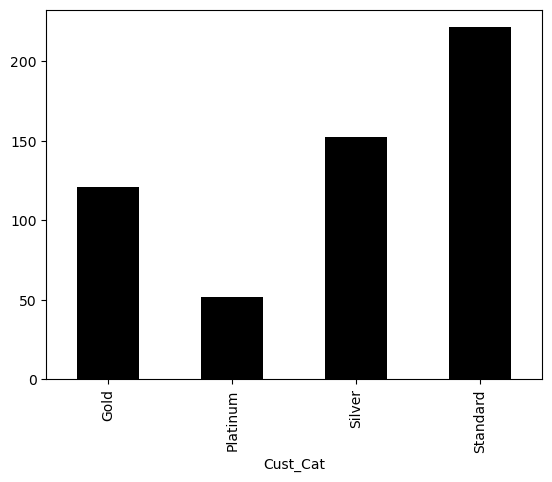

Plot for Frequency


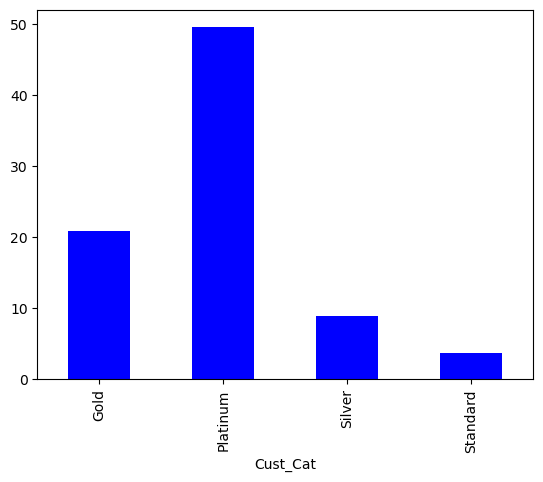

Plot for Monetary


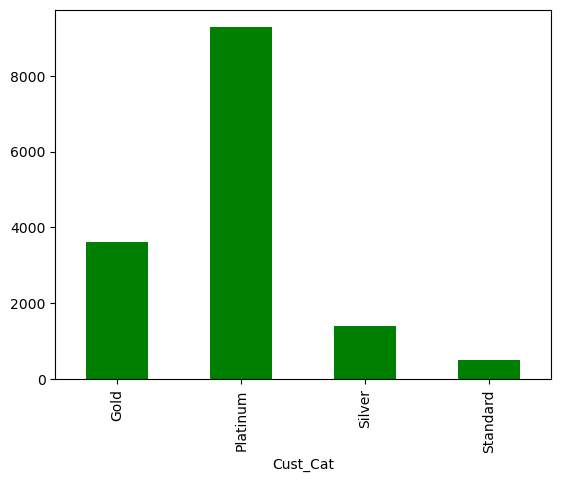

In [93]:
# plotting Recency, Frequency and Monetary for different category of customers

for cat,col in zip(['Recency','Frequency','Monetary'],['Black','Blue','Green']):
    print('Plot for {}'.format(cat))
    rfm_metho2.groupby('Cust_Cat')[cat].mean().plot(kind = 'bar', color = col)
    plt.show()

### Method 3 : Rank Based RFM Analysis

In [94]:
rank_rfm = rfm_table.copy()
rank_rfm['R_rank'] = rank_rfm.Recency.rank(method = 'max', ascending = False) 
rank_rfm['F_rank'] = rank_rfm.Frequency.rank(method = 'max', ascending = True)
rank_rfm['M_rank'] = rank_rfm.Monetary.rank(method = 'max', ascending = True)
rank_rfm

Recency  Frequency  Monetary  R_rank  F_rank  M_rank
CustomerID                                                      
12346           108          1    174.98  856.00  125.00  139.00
12347            60         31  12059.18 1079.00 1233.00 1425.00
12348            74          8   1501.93 1010.00  620.00  664.00
12350            18         11   1183.71 1364.00  766.00  573.00
12356           108         13   1753.45  856.00  840.00  729.00
...             ...        ...       ...     ...     ...     ...
18259           271          3    789.15  209.00  266.00  412.00
18260            88         19   2573.66  951.00 1026.00  920.00
18269           195          2    155.66  466.00  198.00  128.00
18277            70          1    301.02 1033.00  125.00  201.00
18283            83         53   6947.81  964.00 1390.00 1307.00

[1468 rows x 6 columns]

In [95]:
# normalize the ranks

rank_rfm['NR_rank'] = (rank_rfm['R_rank'] / rank_rfm['R_rank'].max()) * 10
rank_rfm['NF_rank'] = (rank_rfm['F_rank'] / rank_rfm['F_rank'].max()) * 10
rank_rfm['NM_rank'] = (rank_rfm['M_rank'] / rank_rfm['M_rank'].max()) * 10
rank_rfm.drop(['F_rank','M_rank','R_rank'], axis = 1, inplace = True)
rank_rfm

Recency  Frequency  Monetary  NR_rank  NF_rank  NM_rank
CustomerID                                                         
12346           108          1    174.98     5.83     0.85     0.95
12347            60         31  12059.18     7.35     8.40     9.71
12348            74          8   1501.93     6.88     4.22     4.52
12350            18         11   1183.71     9.29     5.22     3.90
12356           108         13   1753.45     5.83     5.72     4.97
...             ...        ...       ...      ...      ...      ...
18259           271          3    789.15     1.42     1.81     2.81
18260            88         19   2573.66     6.48     6.99     6.27
18269           195          2    155.66     3.17     1.35     0.87
18277            70          1    301.02     7.04     0.85     1.37
18283            83         53   6947.81     6.57     9.47     8.90

[1468 rows x 6 columns]

RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.33 * Recency score + 0.33 * Frequency score + 0.33 * Monetary score

In [96]:
rank_rfm['RFM_Score'] = 0.33 * rank_rfm['NR_rank'] + 0.33 * rank_rfm['NF_rank'] + 0.33 * rank_rfm['NM_rank']
rank_rfm['RFM_Score'] *= 0.5
# rank_rfm = rank_rfm.round(2)
rank_rfm

Recency  Frequency  Monetary  NR_rank  NF_rank  NM_rank  RFM_Score
CustomerID                                                                    
12346           108          1    174.98     5.83     0.85     0.95       1.26
12347            60         31  12059.18     7.35     8.40     9.71       4.20
12348            74          8   1501.93     6.88     4.22     4.52       2.58
12350            18         11   1183.71     9.29     5.22     3.90       3.04
12356           108         13   1753.45     5.83     5.72     4.97       2.73
...             ...        ...       ...      ...      ...      ...        ...
18259           271          3    789.15     1.42     1.81     2.81       1.00
18260            88         19   2573.66     6.48     6.99     6.27       3.26
18269           195          2    155.66     3.17     1.35     0.87       0.89
18277            70          1    301.02     7.04     0.85     1.37       1.53
18283            83         53   6947.81     6.57     9.47     8.90       4.11

[1468 rows x 7 columns]

In [97]:
rank_rfm["CustSeg"] = np.where(rank_rfm['RFM_Score'] > 4.5, "Platinum",
                                      (np.where(rank_rfm['RFM_Score'] > 4, "Gold",
                                        (np.where(rank_rfm['RFM_Score'] > 3, "Silver",
                                                  np.where(rank_rfm['RFM_Score'] > 1.6, 'Standard', 'LostCust'))))))

rank_rfm

Recency  Frequency  Monetary  NR_rank  NF_rank  NM_rank  \
CustomerID                                                            
12346           108          1    174.98     5.83     0.85     0.95   
12347            60         31  12059.18     7.35     8.40     9.71   
12348            74          8   1501.93     6.88     4.22     4.52   
12350            18         11   1183.71     9.29     5.22     3.90   
12356           108         13   1753.45     5.83     5.72     4.97   
...             ...        ...       ...      ...      ...      ...   
18259           271          3    789.15     1.42     1.81     2.81   
18260            88         19   2573.66     6.48     6.99     6.27   
18269           195          2    155.66     3.17     1.35     0.87   
18277            70          1    301.02     7.04     0.85     1.37   
18283            83         53   6947.81     6.57     9.47     8.90   

            RFM_Score   CustSeg  
CustomerID                       
12346            1.26  LostCust  
12347            4.20      Gold  
12348            2.58  Standard  
12350            3.04    Silver  
12356            2.73  Standard  
...               ...       ...  
18259            1.00  LostCust  
18260            3.26    Silver  
18269            0.89  LostCust  
18277            1.53  LostCust  
18283            4.11      Gold  

[1468 rows x 8 columns]

In [98]:
rank_rfm[rank_rfm.CustSeg == 'LostCust']

Recency  Frequency  Monetary  NR_rank  NF_rank  NM_rank  \
CustomerID                                                            
12346           108          1    174.98     5.83     0.85     0.95   
12359           131          3    653.19     5.06     1.81     2.47   
12386           157          6    568.05     4.16     3.30     2.15   
12434           223          1     46.81     2.42     0.85     0.35   
12494           165          5    394.77     3.96     2.83     1.67   
...             ...        ...       ...      ...      ...      ...   
18233           109          1     82.61     5.77     0.85     0.56   
18256           180          2     77.52     3.45     1.35     0.54   
18259           271          3    789.15     1.42     1.81     2.81   
18269           195          2    155.66     3.17     1.35     0.87   
18277            70          1    301.02     7.04     0.85     1.37   

            RFM_Score   CustSeg  
CustomerID                       
12346            1.26  LostCust  
12359            1.54  LostCust  
12386            1.58  LostCust  
12434            0.60  LostCust  
12494            1.40  LostCust  
...               ...       ...  
18233            1.18  LostCust  
18256            0.88  LostCust  
18259            1.00  LostCust  
18269            0.89  LostCust  
18277            1.53  LostCust  

[371 rows x 8 columns]

In [99]:
rank_rfm[rank_rfm.CustSeg == 'Platinum'].head(10)

Recency  Frequency  Monetary  NR_rank  NF_rank  NM_rank  \
CustomerID                                                            
12471            16         70  13526.14     9.41     9.74     9.75   
12539            54        100  18009.36     7.56     9.89     9.87   
12567            11         71  11225.26     9.73     9.76     9.64   
12681            29         88  15886.37     8.52     9.86     9.80   
12682            21         68  11971.43     9.00     9.71     9.70   
12841            35         49  11586.29     8.24     9.39     9.65   
13050             5         60   9792.59     9.90     9.60     9.43   
13069             4         68   8111.24     9.93     9.71     9.17   
13089            21        175  25956.04     9.00     9.96     9.94   
13093            20         65  11283.09     9.11     9.66     9.65   

            RFM_Score   CustSeg  
CustomerID                       
12471            4.77  Platinum  
12539            4.51  Platinum  
12567            4.81  Platinum  
12681            4.65  Platinum  
12682            4.69  Platinum  
12841            4.50  Platinum  
13050            4.77  Platinum  
13069            4.75  Platinum  
13089            4.77  Platinum  
13093            4.69  Platinum

## 3.2 - Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

Steps for Segmentation of Data: -

1. Consolidation of Data at the level of problem - Customer/Store/Business Unit level depending on the problem
2. Missing Value Treatment, Outlier Treatment, Type Casting, KPI's defining and New Variable Creation depending upon the problem statement. 
3. Feature Engineering (Optional - when the number of features is more than 15).Feature selection/ feature engineering can be performed using Filter, Wrapper and Intrinsic methods. Most common among them are as follows:- 

    a. VIF
    
    b. Correlation Matrix
    
    c. PCA
    
    
4. Standardization of the data
5. Perform segmentation
6. Finding the optimal segmentation (Finding the best value of k)
7. Profiling the customers based on actual variables (not based on standardized variables or PCs from PCA)

    a. Identify the characteristics of the segment
    
    b. Based on the segment characteristics, define the segment stratgey
    
    
*Output of K-Means Clustering - segments labels and centroids*

How to find the best value of k: -

1. Using some metrics like Silhoutte Score, Pseudo F value (Elbow Method) or by measuring cluster errors
2. Using certain best practises like a cluster size should lie between 4% to 40% of total observations
3. By profiling the data - how well the segments are differentiated from each other and how well the customers are represented in the segments

In [46]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score

In [101]:
df.head()

CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850          16679       2019-01-01  GGOENEBJ079499   
1      17850          16680       2019-01-01  GGOENEBJ079499   
2      17850          16696       2019-01-01  GGOENEBQ078999   
3      17850          16699       2019-01-01  GGOENEBQ079099   
4      17850          16700       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA   
3    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   
4  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Month Coupon_Code  \
0         1     153.71              6.50          Used   Jan      ELEC10   
1         1     153.71              6.50          Used   Jan      ELEC10   
2         2     122.77              6.50      Not Used   Jan      ELEC10   
3         1      81.50              6.50       Clicked   Jan      ELEC10   
4         1     153.71              6.50       Clicked   Jan      ELEC10   

   Discount_pct  GST  Invoice_Value Transaction_Month Order_Month  \
0            10 0.10         158.67           2019-01     2019-01   
1            10 0.10         158.67           2019-01     2019-01   
2            10 0.10         249.58           2019-01     2019-01   
3            10 0.10          87.19           2019-01     2019-01   
4            10 0.10         158.67           2019-01     2019-01   

   Cohort_Index  WeekDay  Week Gender Location  Tenure_Months  Offline_Spend  \
0             0  Tuesday     1      M  Chicago             12           4500   
1             0  Tuesday     1      M  Chicago             12           4500   
2             0  Tuesday     1      M  Chicago             12           4500   
3             0  Tuesday     1      M  Chicago             12           4500   
4             0  Tuesday     1      M  Chicago             12           4500   

   Online_Spend  tax_paid  
0       2424.50     15.37  
1       2424.50     15.37  
2       2424.50     24.55  
3       2424.50      8.15  
4       2424.50     15.37

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52524 entries, 0 to 52523
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  object        
 1   Transaction_ID       52524 non-null  object        
 2   Transaction_Date     52524 non-null  datetime64[ns]
 3   Product_SKU          52524 non-null  object        
 4   Product_Description  52524 non-null  object        
 5   Product_Category     52524 non-null  object        
 6   Quantity             52524 non-null  int64         
 7   Avg_Price            52524 non-null  float64       
 8   Delivery_Charges     52524 non-null  float64       
 9   Coupon_Status        52524 non-null  object        
 10  Month                52524 non-null  category      
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52524 non-null  int64         
 13  GST                  52524 non-

In [103]:
df_obj = df.select_dtypes(['object', 'category'])
df_num = df.select_dtypes(['int64','float64'])

In [104]:
df_obj.head()

CustomerID Transaction_ID     Product_SKU  \
0      17850          16679  GGOENEBJ079499   
1      17850          16680  GGOENEBJ079499   
2      17850          16696  GGOENEBQ078999   
3      17850          16699  GGOENEBQ079099   
4      17850          16700  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA   
3    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   
4  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

  Coupon_Status Month Coupon_Code  WeekDay Gender Location  
0          Used   Jan      ELEC10  Tuesday      M  Chicago  
1          Used   Jan      ELEC10  Tuesday      M  Chicago  
2      Not Used   Jan      ELEC10  Tuesday      M  Chicago  
3       Clicked   Jan      ELEC10  Tuesday      M  Chicago  
4       Clicked   Jan      ELEC10  Tuesday      M  Chicago

In [105]:
for col in df_obj.columns:    
    print(col,' : ',df_obj[col].nunique())
    print(df_obj[col].value_counts(),'\n')

CustomerID  :  1468
CustomerID
12748    682
15311    583
14606    570
17841    567
14911    517
        ... 
14119      1
16500      1
16711      1
12755      1
15797      1
Name: count, Length: 1468, dtype: int64 

Transaction_ID  :  25000
Transaction_ID
32526    35
22958    29
40807    29
34094    28
38059    27
         ..
47777     1
47778     1
47766     1
47762     1
41718     1
Name: count, Length: 25000, dtype: int64 

Product_SKU  :  1135
Product_SKU
GGOENEBJ079499    3511
GGOENEBQ078999    3328
GGOENEBB078899    3230
GGOENEBQ079099    1361
GGOENEBQ084699    1089
                  ... 
GGOEWALJ083413       1
GGOEAAWQ063049       1
GGOEAAWQ063048       1
GGOEGAEE031013       1
GGOEGALQ058116       1
Name: count, Length: 1135, dtype: int64 

Product_Description  :  395
Product_Description
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel         3511
Nest Cam Outdoor Security Camera - USA                         3328
Nest Cam Indoor Security Camera - USA                    

We will drop CustomerID, Transaction_ID. We will drop Product_Description and Product_SKU since this information is captured broadly in Product_Category. We will also drop Month since it is a derived variable.  Further, given the size of Product_Description, Product_Category and Coupon_Code we will limit their groups by using upper cap for group creation.  We will create one-hot encoding without upper cap for Coupon_Status, Gender and Location. 

In [106]:
df_obj.drop(columns = ['CustomerID','Transaction_ID','Month', 'Product_Description', 'Product_SKU'], axis = 1, inplace = True)
df_obj.head()

Product_Category Coupon_Status Coupon_Code  WeekDay Gender Location
0         Nest-USA          Used      ELEC10  Tuesday      M  Chicago
1         Nest-USA          Used      ELEC10  Tuesday      M  Chicago
2         Nest-USA      Not Used      ELEC10  Tuesday      M  Chicago
3         Nest-USA       Clicked      ELEC10  Tuesday      M  Chicago
4         Nest-USA       Clicked      ELEC10  Tuesday      M  Chicago

In [107]:
for col in df_obj.columns:    
    print(col,' : ',df_obj[col].nunique())
    print(df_obj[col].value_counts(),'\n')

Product_Category  :  16
Product_Category
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: count, dtype: int64 

Coupon_Status  :  3
Coupon_Status
Clicked     26720
Used        17778
Not Used     8026
Name: count, dtype: int64 

Coupon_Code  :  45
Coupon_Code
SALE20     6373
SALE30     5915
SALE10     5838
ELEC10     4826
ELEC30     4647
ELEC20     4540
EXTRA10    2317
OFF10      2250
EXTRA20    2211
OFF20      2202
OFF30      2061
EXTRA30    2047
NE30       1003
NE20        740
AIO10       654
AIO20       618
AIO30       610
NE10        455
NJ20        299


In [108]:
# !pip install --user --upgrade scikit-learn

In [109]:
# Create a OneHotEncoder object which will create dummy only when the category has minimum frequency of 1000 else
# it will drop the category. 

ohe = OneHotEncoder(min_frequency = 1000, drop = 'first', sparse_output = False)
encoded = ohe.fit(df_obj)

In [110]:
encoded_cat_data = pd.DataFrame(encoded.transform(df_obj), index = df_obj.index, 
                                columns = ohe.get_feature_names_out())
encoded_cat_data.head()

Product_Category_Bags  Product_Category_Drinkware  \
0                   0.00                        0.00   
1                   0.00                        0.00   
2                   0.00                        0.00   
3                   0.00                        0.00   
4                   0.00                        0.00   

   Product_Category_Lifestyle  Product_Category_Nest  \
0                        0.00                   0.00   
1                        0.00                   0.00   
2                        0.00                   0.00   
3                        0.00                   0.00   
4                        0.00                   0.00   

   Product_Category_Nest-USA  Product_Category_Office  \
0                       1.00                     0.00   
1                       1.00                     0.00   
2                       1.00                     0.00   
3                       1.00                     0.00   
4                       1.00                     0.00   

   Product_Category_infrequent_sklearn  Coupon_Status_Not Used  \
0                                 0.00                    0.00   
1                                 0.00                    0.00   
2                                 0.00                    1.00   
3                                 0.00                    0.00   
4                                 0.00                    0.00   

   Coupon_Status_Used  Coupon_Code_ELEC20  Coupon_Code_ELEC30  \
0                1.00                0.00                0.00   
1                1.00                0.00                0.00   
2                0.00                0.00                0.00   
3                0.00                0.00                0.00   
4                0.00                0.00                0.00   

   Coupon_Code_EXTRA10  Coupon_Code_EXTRA20  Coupon_Code_EXTRA30  \
0                 0.00                 0.00                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                 0.00   
4                 0.00                 0.00                 0.00   

   Coupon_Code_NE30  Coupon_Code_OFF10  Coupon_Code_OFF20  Coupon_Code_OFF30  \
0              0.00               0.00               0.00               0.00   
1              0.00               0.00               0.00               0.00   
2              0.00               0.00               0.00               0.00   
3              0.00               0.00               0.00               0.00   
4              0.00               0.00               0.00               0.00   

   Coupon_Code_SALE10  Coupon_Code_SALE20  Coupon_Code_SALE30  \
0                0.00                0.00                0.00   
1                0.00                0.00                0.00   
2                0.00                0.00                0.00   
3                0.00                0.00                0.00   
4                0.00                0.00                0.00   

   Coupon_Code_infrequent_sklearn  WeekDay_Monday  WeekDay_Saturday  \
0                            0.00            0.00              0.00   
1                            0.00            0.00              0.00   
2                            0.00            0.00              0.00   
3                            0.00            0.00              0.00   
4                            0.00            0.00              0.00   

   WeekDay_Sunday  WeekDay_Thursday  WeekDay_Tuesday  WeekDay_Wednesday  \
0            0.00              0.00             1.00               0.00   
1            0.00              0.00             1.00               0.00   
2            0.00              0.00             1.00               0.00   
3            0.00              0.00             1.00               0.00   
4            0.00              0.00             1.00               0.00   

   Gender_M  Location_Chicago  Location

In [111]:
print(ohe.infrequent_categories_)

[array(['Accessories', 'Android', 'Bottles', 'Gift Cards', 'Headgear',
       'Housewares', 'Nest-Canada', 'Notebooks & Journals', 'Waze'],
      dtype=object), None, array(['ACC10', 'ACC20', 'ACC30', 'AIO10', 'AIO20', 'AIO30', 'AND10',
       'AND20', 'AND30', 'BT10', 'BT20', 'BT30', 'GC10', 'GC20', 'GC30',
       'HGEAR10', 'HGEAR20', 'HGEAR30', 'HOU10', 'HOU20', 'HOU30',
       'NCA10', 'NCA20', 'NCA30', 'NE10', 'NE20', 'NJ10', 'NJ20', 'NJ30',
       'WEMP10', 'WEMP20', 'WEMP30'], dtype=object), None, None, None]


In [112]:
print(ohe.get_params())

{'categories': 'auto', 'drop': 'first', 'dtype': <class 'numpy.float64'>, 'feature_name_combiner': 'concat', 'handle_unknown': 'error', 'max_categories': None, 'min_frequency': 1000, 'sparse': 'deprecated', 'sparse_output': False}


In [113]:
# we will drop cohort_index since this is not required for segmentation

df_num.drop('Cohort_Index', axis = 1, inplace = True)

In [114]:
# user defined function for numerical variable analysis

def eda(col):
    
    n = col.shape[0]
    nmiss = col.isna().sum()
    perc_miss = ( nmiss / n ) * 100
    
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    u_cutoff = q3 + (1.5 * iqr)
    l_cutoff = q1 - (1.5 * iqr)
    
    return pd.Series([n, nmiss, perc_miss, col.mean(), col.std(), col.var(), col.min(), l_cutoff, col.quantile(0.01), 
                      col.quantile(0.05),col.quantile(0.1), col.quantile(0.25), col.quantile(0.5), col.quantile(0.75),
                      col.quantile(0.95), col.quantile(0.99), col.max(), u_cutoff], 
                    index = ['Total', 'TotalMissing', 'PercMissing', 'Mean', 'Std', 'Var', 'Min', 'Lower_CutOff-IQR',
                             'P1', 'P5', 'P10','P25','P50','P75','P95','P99','Max','Upper_CutOff-IQR'])

In [115]:
df_num.apply(eda)

Quantity  Avg_Price  Delivery_Charges  Discount_pct  \
Total             52524.00   52524.00          52524.00      52524.00   
TotalMissing          0.00       0.00              0.00          0.00   
PercMissing           0.00       0.00              0.00          0.00   
Mean                  4.50      52.43             10.48         19.95   
Std                  20.16      64.16             19.34          8.13   
Var                 406.42    4116.08            374.16         66.05   
Min                   1.00       0.39              0.00         10.00   
Lower_CutOff-IQR     -0.50    -164.25              5.25        -20.00   
P1                    1.00       0.99              6.00         10.00   
P5                    1.00       1.99              6.00         10.00   
P10                   1.00       2.58              6.00         10.00   
P25                   1.00       5.70              6.00         10.00   
P50                   1.00      16.99              6.00         20.00   
P75                   2.00     119.00              6.50         30.00   
P95                  16.00     151.88             26.43         30.00   
P99                  60.00     279.00             75.00         30.00   
Max                 900.00     355.74            521.36         30.00   
Upper_CutOff-IQR      3.50     288.95              7.25         60.00   

                      GST  Invoice_Value  Tenure_Months  Offline_Spend  \
Total            52524.00       52524.00       52524.00       52524.00   
TotalMissing         0.00           0.00           0.00           0.00   
PercMissing          0.00           0.00           0.00           0.00   
Mean                 0.14          89.06          26.14        2832.43   
Std                  0.05         152.44          13.47         935.61   
Var                  0.00       23237.23         181.54      875370.29   
Min                  0.05           4.38           2.00         500.00   
Lower_CutOff-IQR    -0.02        -138.81         -18.00        1000.00   
P1                   0.05           7.59           2.00         500.00   
P5                   0.05           8.96           5.00        1000.00   
P10                  0.10          10.71           7.00        1500.00   
P25                  0.10          18.55          15.00        2500.00   
P50                  0.18          40.68          27.00        3000.00   
P75                  0.18         123.45          37.00        3500.00   
P95                  0.18         290.71          47.00        4500.00   
P99                  0.18         505.65          50.00        5000.00   
Max                  0.18        8979.27          50.00        5000.00   
Upper_CutOff-IQR     0.30         280.80          70.00        5000.00   

                  Online_Spend  tax_paid  
Total                 52524.00  52524.00  
TotalMissing              0.00      0.00  
PercMissing               0.00      0.00  
Mean                   1894.22      9.73  
Std                     807.16     18.24  
Var                  651508.30    332.67  
Min                     320.25      0.04  
Lower_CutOff-IQR       -506.45    -13.63  
P1                      484.90      0.16  
P5                      682.42      0.32  
P10                     869.25      0.63  
P25                    1252.63      1.91  
P50                    1837.87      4.89  
P75                    2425.35     12.28  
P95                    3396.14     29.95  
P99                    3897.20     59.50  
Max                    4556.93    899.64  
Upper_CutOff-IQR       4184.43     27.82

### Treating outliers in the data

In [116]:
df_num = df_num.apply(lambda x : x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))
df_num.apply(eda)

Quantity  Avg_Price  Delivery_Charges  Discount_pct  \
Total             52524.00   52524.00          52524.00      52524.00   
TotalMissing          0.00       0.00              0.00          0.00   
PercMissing           0.00       0.00              0.00          0.00   
Mean                  3.63      51.74              9.70         19.95   
Std                   8.53      61.27             10.83          8.13   
Var                  72.73    3754.48            117.19         66.05   
Min                   1.00       0.99              6.00         10.00   
Lower_CutOff-IQR     -0.50    -164.25              5.25        -20.00   
P1                    1.00       0.99              6.00         10.00   
P5                    1.00       1.99              6.00         10.00   
P10                   1.00       2.58              6.00         10.00   
P25                   1.00       5.70              6.00         10.00   
P50                   1.00      16.99              6.00         20.00   
P75                   2.00     119.00              6.50         30.00   
P95                  16.00     151.88             26.43         30.00   
P99                  60.00     279.00             75.00         30.00   
Max                  60.00     279.00             75.00         30.00   
Upper_CutOff-IQR      3.50     288.95              7.25         60.00   

                      GST  Invoice_Value  Tenure_Months  Offline_Spend  \
Total            52524.00       52524.00       52524.00       52524.00   
TotalMissing         0.00           0.00           0.00           0.00   
PercMissing          0.00           0.00           0.00           0.00   
Mean                 0.14          84.66          26.14        2832.43   
Std                  0.05          96.43          13.47         935.61   
Var                  0.00        9298.13         181.54      875370.29   
Min                  0.05           7.59           2.00         500.00   
Lower_CutOff-IQR    -0.02        -138.81         -18.00        1000.00   
P1                   0.05           7.59           2.00         500.00   
P5                   0.05           8.96           5.00        1000.00   
P10                  0.10          10.71           7.00        1500.00   
P25                  0.10          18.55          15.00        2500.00   
P50                  0.18          40.68          27.00        3000.00   
P75                  0.18         123.45          37.00        3500.00   
P95                  0.18         290.71          47.00        4500.00   
P99                  0.18         505.34          50.00        5000.00   
Max                  0.18         505.65          50.00        5000.00   
Upper_CutOff-IQR     0.30         280.80          70.00        5000.00   

                  Online_Spend  tax_paid  
Total                 52524.00  52524.00  
TotalMissing              0.00      0.00  
PercMissing               0.00      0.00  
Mean                   1891.35      9.09  
Std                     796.01     10.67  
Var                  633627.21    113.86  
Min                     484.90      0.16  
Lower_CutOff-IQR       -506.45    -13.63  
P1                      484.90      0.16  
P5                      682.42      0.32  
P10                     869.25      0.63  
P25                    1252.63      1.91  
P50                    1837.87      4.89  
P75                    2425.35     12.28  
P95                    3396.14     29.95  
P99                    3897.20     59.50  
Max                    3897.20     59.50  
Upper_CutOff-IQR       4184.43     27.82

In [117]:
df_kmeans = pd.concat((encoded_cat_data, df_num), axis = 1)
df_kmeans.head()

Product_Category_Bags  Product_Category_Drinkware  \
0                   0.00                        0.00   
1                   0.00                        0.00   
2                   0.00                        0.00   
3                   0.00                        0.00   
4                   0.00                        0.00   

   Product_Category_Lifestyle  Product_Category_Nest  \
0                        0.00                   0.00   
1                        0.00                   0.00   
2                        0.00                   0.00   
3                        0.00                   0.00   
4                        0.00                   0.00   

   Product_Category_Nest-USA  Product_Category_Office  \
0                       1.00                     0.00   
1                       1.00                     0.00   
2                       1.00                     0.00   
3                       1.00                     0.00   
4                       1.00                     0.00   

   Product_Category_infrequent_sklearn  Coupon_Status_Not Used  \
0                                 0.00                    0.00   
1                                 0.00                    0.00   
2                                 0.00                    1.00   
3                                 0.00                    0.00   
4                                 0.00                    0.00   

   Coupon_Status_Used  Coupon_Code_ELEC20  Coupon_Code_ELEC30  \
0                1.00                0.00                0.00   
1                1.00                0.00                0.00   
2                0.00                0.00                0.00   
3                0.00                0.00                0.00   
4                0.00                0.00                0.00   

   Coupon_Code_EXTRA10  Coupon_Code_EXTRA20  Coupon_Code_EXTRA30  \
0                 0.00                 0.00                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                 0.00   
4                 0.00                 0.00                 0.00   

   Coupon_Code_NE30  Coupon_Code_OFF10  Coupon_Code_OFF20  Coupon_Code_OFF30  \
0              0.00               0.00               0.00               0.00   
1              0.00               0.00               0.00               0.00   
2              0.00               0.00               0.00               0.00   
3              0.00               0.00               0.00               0.00   
4              0.00               0.00               0.00               0.00   

   Coupon_Code_SALE10  Coupon_Code_SALE20  Coupon_Code_SALE30  \
0                0.00                0.00                0.00   
1                0.00                0.00                0.00   
2                0.00                0.00                0.00   
3                0.00                0.00                0.00   
4                0.00                0.00                0.00   

   Coupon_Code_infrequent_sklearn  WeekDay_Monday  WeekDay_Saturday  \
0                            0.00            0.00              0.00   
1                            0.00            0.00              0.00   
2                            0.00            0.00              0.00   
3                            0.00            0.00              0.00   
4                            0.00            0.00              0.00   

   WeekDay_Sunday  WeekDay_Thursday  WeekDay_Tuesday  WeekDay_Wednesday  \
0            0.00              0.00             1.00               0.00   
1            0.00              0.00             1.00               0.00   
2            0.00              0.00             1.00               0.00   
3            0.00              0.00             1.00               0.00   
4            0.00              0.00             1.00               0.00   

   Gender_M  Location_Chicago  Location

## Standardising the data

In [118]:
sc = StandardScaler()
df_kmeans_std = sc.fit(df_kmeans)
df_kmeans_std = pd.DataFrame(sc.transform(df_kmeans), columns = df_kmeans.columns)
df_kmeans_std.head()

Product_Category_Bags  Product_Category_Drinkware  \
0                  -0.19                       -0.27   
1                  -0.19                       -0.27   
2                  -0.19                       -0.27   
3                  -0.19                       -0.27   
4                  -0.19                       -0.27   

   Product_Category_Lifestyle  Product_Category_Nest  \
0                       -0.25                  -0.21   
1                       -0.25                  -0.21   
2                       -0.25                  -0.21   
3                       -0.25                  -0.21   
4                       -0.25                  -0.21   

   Product_Category_Nest-USA  Product_Category_Office  \
0                       1.66                    -0.38   
1                       1.66                    -0.38   
2                       1.66                    -0.38   
3                       1.66                    -0.38   
4                       1.66                    -0.38   

   Product_Category_infrequent_sklearn  Coupon_Status_Not Used  \
0                                -0.26                   -0.42   
1                                -0.26                   -0.42   
2                                -0.26                    2.35   
3                                -0.26                   -0.42   
4                                -0.26                   -0.42   

   Coupon_Status_Used  Coupon_Code_ELEC20  Coupon_Code_ELEC30  \
0                1.40               -0.31               -0.31   
1                1.40               -0.31               -0.31   
2               -0.72               -0.31               -0.31   
3               -0.72               -0.31               -0.31   
4               -0.72               -0.31               -0.31   

   Coupon_Code_EXTRA10  Coupon_Code_EXTRA20  Coupon_Code_EXTRA30  \
0                -0.21                -0.21                -0.20   
1                -0.21                -0.21                -0.20   
2                -0.21                -0.21                -0.20   
3                -0.21                -0.21                -0.20   
4                -0.21                -0.21                -0.20   

   Coupon_Code_NE30  Coupon_Code_OFF10  Coupon_Code_OFF20  Coupon_Code_OFF30  \
0             -0.14              -0.21              -0.21              -0.20   
1             -0.14              -0.21              -0.21              -0.20   
2             -0.14              -0.21              -0.21              -0.20   
3             -0.14              -0.21              -0.21              -0.20   
4             -0.14              -0.21              -0.21              -0.20   

   Coupon_Code_SALE10  Coupon_Code_SALE20  Coupon_Code_SALE30  \
0               -0.35               -0.37               -0.36   
1               -0.35               -0.37               -0.36   
2               -0.35               -0.37               -0.36   
3               -0.35               -0.37               -0.36   
4               -0.35               -0.37               -0.36   

   Coupon_Code_infrequent_sklearn  WeekDay_Monday  WeekDay_Saturday  \
0                           -0.37           -0.30             -0.43   
1                           -0.37           -0.30             -0.43   
2                           -0.37           -0.30             -0.43   
3                           -0.37           -0.30             -0.43   
4                           -0.37           -0.30             -0.43   

   WeekDay_Sunday  WeekDay_Thursday  WeekDay_Tuesday  WeekDay_Wednesday  \
0           -0.44             -0.45             3.24              -0.45   
1           -0.44             -0.45             3.24              -0.45   
2           -0.44             -0.45             3.24              -0.45   
3           -0.44             -0.45             3.24              -0.45   
4           -0.44             -0.45             3.24              -0.45   

   Gender_M  Location_Chicago  Location

In [119]:
df_kmeans_std.shape

(52524, 43)

## Principal Component Analysis

### Unsupervised Learning Variable Reduction Techniques - VIF, Correlation Matrix and PCA

### #Criteria to choose number of compoents

1. Cumulative explained variance should be more than 75%


2. Individual component should explain more than 0.8 variancce


In [120]:
pca = PCA(n_components = 43)
pca_model = pca.fit(df_kmeans_std)

In [121]:
pd.options.display.float_format = '{:.2f}'.format

# components with individual explained variance more than 0.8
pca_model.explained_variance_[pca_model.explained_variance_ > 0.8]

array([4.21552822, 2.51866522, 2.24388056, 2.12068255, 1.98976503,
       1.76354496, 1.57183601, 1.46913198, 1.40555907, 1.30581475,
       1.23814519, 1.22165811, 1.17343122, 1.1442281 , 1.12878752,
       1.11380975, 1.10480025, 1.09523481, 1.0809023 , 1.07388229,
       1.05707421, 1.04174388, 1.03182111, 1.02659292, 0.97517591,
       0.97071969, 0.88716382])

In [122]:
# we will select those PCA components which are able to explain around 80% of variation in the data

np.cumsum(pca_model.explained_variance_ratio_)[np.cumsum(pca_model.explained_variance_ratio_) <.80]

array([0.09803367, 0.15660617, 0.20878844, 0.2581057 , 0.30437843,
       0.34539032, 0.38194395, 0.41610916, 0.44879596, 0.47916316,
       0.50795669, 0.5363668 , 0.56365538, 0.59026483, 0.6165152 ,
       0.64241726, 0.6681098 , 0.69357989, 0.71871668, 0.74369021,
       0.76827286, 0.792499  ])

In [123]:
No_of_component = len(np.cumsum(pca_model.explained_variance_ratio_)[np.cumsum(pca_model.explained_variance_ratio_) <.80])
No_of_component

22

Based on the cumulative variance explained by the pca model, we can select first 22 PCs since they cumulatively explain around 80% of the variance in the data. Therefore, we will recreate the pca model with 22 components. 

### No of components = 22

In [124]:
pca = PCA(n_components = 22)
pca_model = pca.fit(df_kmeans_std)

In [125]:
columns = []
for i in range(1, (No_of_component + 1)):
    columns.append('PC' + str(i))

In [126]:
df_pc = pd.DataFrame(pca_model.transform(df_kmeans_std), columns = columns)
df_pc

PC1   PC2   PC3   PC4   PC5  PC6   PC7   PC8   PC9  PC10  PC11  PC12  \
0     2.45 -0.46  0.18 -0.21 -0.69 0.84 -0.56 -0.70 -1.65 -1.54 -0.10  0.05   
1     2.45 -0.46  0.18 -0.21 -0.69 0.84 -0.56 -0.70 -1.65 -1.54 -0.10  0.05   
2     2.91 -0.45  0.58  0.27 -0.64 0.61 -0.75 -0.19 -1.83  1.88 -0.17  0.28   
3     1.42 -0.31 -0.03 -0.49 -0.69 0.81 -0.56 -1.01 -1.73 -0.05 -0.11  0.17   
4     2.46 -0.46  0.16 -0.20 -0.68 0.83 -0.57 -0.69 -1.73 -0.06 -0.13  0.16   
...    ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
52519 1.74  1.60 -3.27  1.52  0.28 2.08  0.84 -0.08  1.53  0.20 -0.12 -0.11   
52520 3.00  1.41 -3.12  1.82  0.34 2.16  0.84  0.23  1.44  2.14 -0.16 -0.04   
52521 2.98  1.43 -3.09  1.80  0.29 2.18  0.87  0.22  1.62 -1.29 -0.10 -0.25   
52522 1.74  1.58 -3.28  1.53  0.32 2.07  0.82 -0.08  1.43  2.15 -0.14 -0.01   
52523 2.99  1.43 -3.11  1.81  0.30 2.17  0.86  0.23  1.54  0.18 -0.14 -0.14   

       PC13  PC14  PC15  PC16  PC17  PC18  PC19  PC20  PC21  PC22  
0     -2.00  1.58 -0.27  0.15  0.48  0.20 -0.95  0.45  0.99 -0.13  
1     -2.00  1.58 -0.27  0.15  0.48  0.20 -0.95  0.45  0.99 -0.13  
2     -2.03  1.85 -0.17 -0.04  0.58  0.22 -0.91  0.35  1.16 -0.06  
3     -2.01  1.68 -0.29  0.07  0.50  0.21 -1.02  0.41  1.03 -0.17  
4     -2.01  1.72 -0.25  0.08  0.51  0.24 -1.00  0.41  1.05 -0.14  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
52519 -0.09  0.52 -0.23 -0.83 -0.29  0.54 -0.10  0.23 -0.18 -0.15  
52520 -0.08  0.70 -0.15 -0.92 -0.22  0.59 -0.04  0.17 -0.20 -0.10  
52521 -0.06  0.43 -0.20 -0.75 -0.31  0.54 -0.03  0.26 -0.23 -0.11  
52522 -0.09  0.65 -0.21 -0.93 -0.24  0.55 -0.06  0.18 -0.21 -0.13  
52523 -0.08  0.57 -0.18 -0.81 -0.27  0.57 -0.08  0.22 -0.17 -0.12  

[52524 rows x 22 columns]

### Princial Components and Loadings

Principal Component --> linear combination of predictor variables

PC1 --> The first PC is the linear combination of x-variables that has maximum variance (among all linear combinations). It accounts for as much variation in the data as possible subject to constraint that the sum of squared coefficients of PC is equal to 1. This constraint is required so that unique answer may be obtained. 

PC2 --> It is linear combination of x-variables that accounts for as much of the remaining variation as possible with the constraint that first and second PC are orthogonal. All subsequent PCs are linear combination of x-variables that account for as much of the remaining variation as possible and they are not correlated with the other PCs. 

Loadings --> are the weight that transform the predictors into principal component. 

For example, lets say we have two variables X1 and X2. Initially, for two variables we will have two Principal Components Z1 and Z2. 

Z1 = w1 * X1 + w2 * X2 --> here (w1 and w2) are known as component loadings. These transform the original variables into the principal components. Z1 is the linear combination that best explains the total variation. Z2 will be orthogonal to Z1 and explains as much of the remaining variation as it can. 

loading factors for each PCA = eigen_vectors * square root of eigen values

Eigen Vector --> coefficient of each feature in the given PC. 
Eigen Values --> value of variance explained by each PC

Loadings are the correlation between the features and PCs. Higher the value of loading for given PC and the variable, higher the correlation between them the more contribution that feature has for that PC. 

Eigen vectors and Factor Loadings have direct relationship and infact eigen vectors can be considered as factor loadings. 

#### PCA can be termed as Unsupervised version of Linear Discriminant Analysis. 

Screeplot ==> is the plot of variances which shows the relative importance of the components either as explained variance or as a proportion of explained variance. 

In [127]:
# Eigen vectors for each PC

print('\nEigen Vectors :-\n',(pca_model.components_).T) # --> Eigen vectors
print('\nEigen Values :-\n',(pca_model.explained_variance_).T) # --> Eigen Values



Eigen Vectors :-
 [[-2.58648830e-02  2.73478737e-02 -1.92574991e-01  2.17863263e-01
  -5.61854128e-02 -2.51621955e-01 -1.07225591e-01  1.45513463e-01
  -2.62450988e-02 -1.47002238e-02  1.59189334e-03  2.68483315e-02
  -9.35356187e-02  1.22944336e-01  1.28877457e-02  5.61090129e-02
   1.34395910e-01  4.48912834e-01  2.08457939e-02  2.32222685e-01
  -4.69971643e-01 -1.23077893e-01]
 [-1.15639346e-01 -1.54500724e-01  1.91553711e-01  2.70282186e-01
   1.96742465e-01  6.54214983e-02  8.27862391e-02 -1.51294651e-01
   1.74132499e-02  3.12343997e-02 -9.79129146e-03 -1.42663316e-02
   2.05009530e-02  3.83184866e-02  1.32887800e-02  7.07703043e-02
  -3.81012005e-01 -1.21375257e-01 -1.52314457e-01  3.36988586e-01
  -2.86368845e-02 -1.94037325e-02]
 [-1.31824943e-01 -1.41329945e-01  1.47173112e-01  2.15524796e-01
   1.52876676e-01  1.02115068e-01  1.01825023e-01 -2.71197443e-01
   3.93390102e-02 -2.72294390e-02  7.81002185e-04  2.19576117e-03
  -5.52244148e-02 -5.40854197e-02 -4.87633292e-03 -5.

In [128]:
Loadings =  pd.DataFrame((pca_model.components_.T * np.sqrt(pca_model.explained_variance_)).T,
                         columns = df_kmeans.columns).T

Loadings.columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10' ,'PC11', 'PC12', 'PC13', 
                   'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22']

# Loadings.to_excel('Loadings.xlsx')
Loadings

PC1   PC2   PC3   PC4   PC5   PC6   PC7  \
Product_Category_Bags               -0.05  0.04 -0.29  0.32 -0.08 -0.33 -0.13   
Product_Category_Drinkware          -0.24 -0.25  0.29  0.39  0.28  0.09  0.10   
Product_Category_Lifestyle          -0.27 -0.22  0.22  0.31  0.22  0.14  0.13   
Product_Category_Nest                0.34  0.18 -0.45  0.17  0.36  0.52  0.23   
Product_Category_Nest-USA            0.80 -0.24  0.27 -0.21 -0.18 -0.11 -0.03   
Product_Category_Office             -0.20  0.85  0.37 -0.23  0.03  0.05  0.01   
Product_Category_infrequent_sklearn  0.01  0.26 -0.50  0.34 -0.11 -0.34 -0.03   
Coupon_Status_Not Used               0.00 -0.01 -0.00  0.00  0.02 -0.00 -0.01   
Coupon_Status_Used                  -0.01  0.00  0.01 -0.01 -0.00  0.01  0.01   
Coupon_Code_ELEC20                   0.44 -0.14  0.18 -0.10 -0.20 -0.03  0.01   
Coupon_Code_ELEC30                   0.45 -0.16  0.13 -0.25  0.17 -0.24 -0.05   
Coupon_Code_EXTRA10                 -0.21 -0.18  0.23  0.38  0.01  0.26  0.04   
Coupon_Code_EXTRA20                 -0.21 -0.19  0.20  0.27  0.21  0.08  0.10   
Coupon_Code_EXTRA30                 -0.19 -0.19  0.18  0.20  0.40 -0.08  0.14   
Coupon_Code_NE30                     0.24  0.12 -0.32  0.03  0.43  0.54  0.23   
Coupon_Code_OFF10                   -0.11  0.49  0.22 -0.05 -0.19  0.19 -0.03   
Coupon_Code_OFF20                   -0.11  0.47  0.20 -0.13  0.02  0.01  0.02   
Coupon_Code_OFF30                   -0.10  0.45  0.18 -0.21  0.23 -0.13  0.03   
Coupon_Code_SALE10                  -0.23 -0.15 -0.06 -0.01 -0.47  0.31 -0.13   
Coupon_Code_SALE20                  -0.26 -0.18 -0.12 -0.20 -0.11  0.01  0.00   
Coupon_Code_SALE30                  -0.22 -0.19 -0.14 -0.33  0.33 -0.27 -0.08   
Coupon_Code_infrequent_sklearn       0.08  0.28 -0.68  0.52 -0.08 -0.34 -0.05   
WeekDay_Monday                       0.02 -0.03 -0.04 -0.11  0.04  0.01  0.00   
WeekDay_Saturday                    -0.03  0.00  0.01  0.04  0.10  0.06 -0.33   
WeekDay_Sunday                      -0.04  0.00 -0.03  0.01  0.09  0.06 -0.45   
WeekDay_Thursday                    -0.01  0.02  0.02  0.03 -0.13 -0.12  0.55   
WeekDay_Tuesday                      0.04 -0.02 -0.03 -0.07 -0.05  0.03  0.06   
WeekDay_Wednesday                    0.05  0.00  0.04  0.04 -0.06 -0.01  0.16   
Gender_M                             0.01 -0.01 -0.01  0.01 -0.01 -0.01  0.07   
Location_Chicago                    -0.00  0.00 -0.00  0.01  0.09 -0.10  0.04   
Location_New Jersey                  0.00 -0.02  0.00 -0.02 -0.00  0.00 -0.01   
Location_New York                   -0.01  0.01 -0.00 -0.01 -0.09  0.04 -0.10   
Location_Washington DC               0.01 -0.01  0.01 -0.00 -0.06  0.03  0.15   
Quantity                            -0.01  0.35  0.44  0.46  0.14 -0.17 -0.10   
Avg_Price                            0.90 -0.15 -0.10 -0.04  0.01  0.15  0.08   
Delivery_Charges                    -0.08  0.20  0.26  0.36  0.10 -0.13 -0.09   
Discount_pct                         0.08 -0.05 -0.08 -0.34  0.76 -0.44  0.08   
GST                                 -0.71 -0.56  0.09  0.03 -0.03 -0.08 -0.11   
Invoice_Value                        0.79  0.01  0.25  0.36  0.00 -0.05 -0.06   
Tenure_Months                        0.00  0.00 -0.01 -0.03  0.08  0.01 -0.02   
Offline_Spend                        0.13  0.01 -0.09 -0.02  0.25  0.22 -0.33   
Online_Spend                         0.08  0.00 -0.06  0.00  0.24  0.25 -0.71   
tax_paid                             0.72 -0.11  0.34  0.31 -0.01 -0.16 -0.11   

                                      PC8   PC9  PC10  PC11  PC12  PC13  PC14  \
Product_Category_Bags                0.18 -0.03 -0.02  0.00  0.03 -0.10  0.13   
Product_Category_Drinkware          -0.18  0.02  0.04 -0.01 -0.02  0.02  0.04   
Product_Category_Lifestyle          -0.33  0.05 -0.03  0.00  0.00 -0.06 -0.06   
Product_Category_Nest                0.19  0.03 -0.00  0.02 -0.05  0.02  0.06   
Product_Category_Nest-USA           -0.25 -0.01  0.00 -0.02 -0.00 -0

Based on the Loadings (correlation matrix of features with PCs), the most significant features can be as follows:-

GST, tax_paid, Invoice_Value, Avg_Price, Product_Category_Nest-USA, Product_Category_Office, tax_paid, Invoice_Value, Quantity, Coupon_Code_infrequent_sklearn, Product_Category_infrequent_sklearn, Discount_pct, Location_New York, Offline_Spend, Online_Spend, Coupon_Status_Not Used, Coupon_Status_Used, Location_Washington DC, Location_New Jersey, Coupon_Code_SALE20, Product_Category_Bags, Coupon_Code_OFF10, Coupon_Code_OFF30, Coupon_Code_OFF20

In [129]:
Final_Features = ['GST', 
                  'tax_paid', 
                  'Invoice_Value', 
                  'Avg_Price', 
                  'Product_Category_Nest-USA', 
                  'Product_Category_Office',
                  'Invoice_Value', 
                  'Quantity', 
                  'Coupon_Code_infrequent_sklearn', 
                  'Product_Category_infrequent_sklearn', 
                  'Discount_pct', 
                  'Location_New York', 
                  'Offline_Spend', 
                  'Online_Spend', 
                  'Coupon_Status_Not Used', 
                  'Coupon_Status_Used', 
                  'Location_Washington DC', 
                  'Location_New Jersey', 
                  'Coupon_Code_SALE20', 
                  'Product_Category_Bags', 
                  'Coupon_Code_OFF10', 
                  'Coupon_Code_OFF30', 
                  'Coupon_Code_OFF20']

Now, we can do segmentation either by using PCs or by using these significant features. In segmentation, we can use PCs since there is no requirement of interpretation of the model. 

In [130]:
# Either use the following dataframe

# df_kmeans_pca = df_kmeans[Final_Features]
# df_kmeans_pca.head()

In [131]:
# or use PCs directly for the segmentation 

km_3 = KMeans(n_clusters = 3, random_state = 123).fit(df_pc)
km_3.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [132]:
km_3.cluster_centers_

array([[-1.07250065e+00,  3.59952132e+00,  1.46213848e+00,
        -9.02768134e-01,  1.07596341e-01,  1.81387779e-01,
         4.59580955e-02, -2.30276294e-01, -2.42917878e-02,
         2.20345928e-02, -5.40964984e-04,  1.48776599e-02,
        -4.71165000e-02,  4.41749067e-02,  2.15752255e-02,
         5.30828762e-02,  3.07207700e-02,  1.88438709e-01,
        -2.56941697e-02,  1.40136377e-01, -2.41964968e-01,
        -5.87248398e-02],
       [-1.48344941e+00, -8.03614393e-01, -2.21723315e-01,
         1.53775440e-01,  3.64438058e-02, -1.73115044e-02,
        -6.88845726e-02,  3.13474564e-01, -1.38075996e-02,
        -7.03698168e-03,  1.87083852e-02,  9.78728722e-03,
        -3.22383482e-03,  2.02038804e-02, -9.04328142e-04,
        -1.31762454e-02,  1.23842626e-02,  1.62611101e-02,
         1.63854094e-02,  1.44092847e-02,  1.53780595e-03,
         5.49323059e-06],
       [ 2.49772354e+00, -8.76283886e-02, -1.85805886e-01,
         9.05110913e-02, -8.93613117e-02, -3.76754905e-02,
    

### Choosing best solution (optimal solution) - Identifying best value of K

1. Metrics	

    a. Silhoutte coeficient	between -1 & 1	
        #		Closer to 1, segmentation is good	
        #		Closer to -1, segmentation is bad
        
For higher-dimensional data, Silhouette Method is a better alternative to Elbow Method to find best value of k. The silhouette Method is also a method to find the optimal number of clusters and interpretation and validation of consistency within clusters of data. The silhouette method computes silhouette coefficients of each point that measure how much a point is similar to its own cluster compared to other clusters. by providing a succinct graphical representation of how well each object has been classified.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The value of the silhouette ranges between [1, -1], where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

Computing Silhoutte Coefficient:
Steps to find the silhouette coefficient of an i’th point:
Compute a(i): The average distance of that point with all other points in the same clusters.
Compute b(i): The average distance of that point with all the points in the closest cluster to its cluster.
Compute s(i) — silhouette coefficient or i’th point using below mentioned formula.

s(i) = b(i) - a(i) / max(b(i),a(i))


Silhouette analysis also has added advantage to find the outliers if present in a cluster.z

#############        
        
	b. Pseudo F-value	


2. Profiling of segments			
3. Best practices			
4.	Segment distribution	4%-40%	
5. Strategy can be implementable or not

In [133]:
silhouette_score(df_pc, km_3.labels_)

0.14664899836599318

In [134]:
scores = []
k_range = range(3,20)
for i in k_range:
    km = KMeans(n_clusters = i, random_state = 123).fit(df_pc)
    scores.append(silhouette_score(df_pc, km.labels_))
    
scores

[0.14664899836599318,
 0.1552783483541777,
 0.14588378887238376,
 0.18825710243168495,
 0.15845795831926712,
 0.2081182581616716,
 0.20097854427667602,
 0.21268304998970203,
 0.23118688675614116,
 0.24435990807991081,
 0.2544470416306908,
 0.26442737580694603,
 0.21262459079500662,
 0.2398508626084743,
 0.2517722837670086,
 0.24071874532843085,
 0.245162077478856]

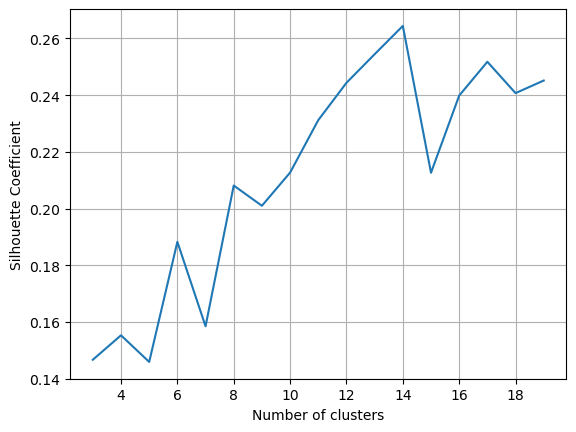

In [135]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

Choosing number of clusters as 13, however same will be confirmed by evaluating the cluster sizes. As per general rule of thumb, the cluster sizes should range between 4 to 40%. 

### Elbow Analysis using Cluster Errors (cluster inertia)

Elbow Method is an empirical method to find the optimal number of clusters for a dataset. In this method, we pick a range of candidate values of k, then apply K-Means clustering using each of the values of k. Find the average distance of each point in a cluster to its centroid, and represent it in a plot. Pick the value of k, where the average distance falls suddenly

In [136]:
cluster_errors = []
krange = range(3,20)

for i in krange:
    km = KMeans(n_clusters = i, random_state = 123).fit(df_pc)
    cluster_errors.append(km.inertia_)

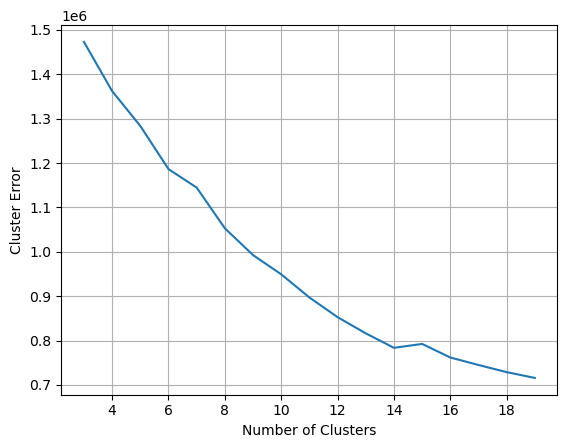

In [137]:
plt.plot(krange, cluster_errors)
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Error')
plt.show()

The slope of decrease is very less after the data has been segmented into 13 clusters. Therefore, we will select 13 as the optimum number of clusters. 

In [138]:
pd.DataFrame({'Num_Clusters' : krange, 'Cluster_Error':cluster_errors})

Num_Clusters  Cluster_Error
0              3     1472983.31
1              4     1362160.56
2              5     1283567.28
3              6     1186316.95
4              7     1144640.92
5              8     1052926.31
6              9      992532.50
7             10      949169.61
8             11      896955.85
9             12      852614.62
10            13      816153.96
11            14      783518.21
12            15      792272.61
13            16      761694.66
14            17      744806.12
15            18      728708.58
16            19      715664.12

From the dataframe above, the decrease in cluster error after 13 is not significant as compared to the reduction from 1 to 13

In [139]:
# creating 13 clusters of the data
km_13 = KMeans(n_clusters = 13, random_state = 123).fit(df_pc)
km_13.labels_

array([0, 0, 0, ..., 7, 7, 7], dtype=int32)

In [140]:
df_kmeans['Cluster_13'] = km_13.labels_
df_kmeans.head()

Product_Category_Bags  Product_Category_Drinkware  \
0                   0.00                        0.00   
1                   0.00                        0.00   
2                   0.00                        0.00   
3                   0.00                        0.00   
4                   0.00                        0.00   

   Product_Category_Lifestyle  Product_Category_Nest  \
0                        0.00                   0.00   
1                        0.00                   0.00   
2                        0.00                   0.00   
3                        0.00                   0.00   
4                        0.00                   0.00   

   Product_Category_Nest-USA  Product_Category_Office  \
0                       1.00                     0.00   
1                       1.00                     0.00   
2                       1.00                     0.00   
3                       1.00                     0.00   
4                       1.00                     0.00   

   Product_Category_infrequent_sklearn  Coupon_Status_Not Used  \
0                                 0.00                    0.00   
1                                 0.00                    0.00   
2                                 0.00                    1.00   
3                                 0.00                    0.00   
4                                 0.00                    0.00   

   Coupon_Status_Used  Coupon_Code_ELEC20  Coupon_Code_ELEC30  \
0                1.00                0.00                0.00   
1                1.00                0.00                0.00   
2                0.00                0.00                0.00   
3                0.00                0.00                0.00   
4                0.00                0.00                0.00   

   Coupon_Code_EXTRA10  Coupon_Code_EXTRA20  Coupon_Code_EXTRA30  \
0                 0.00                 0.00                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                 0.00   
4                 0.00                 0.00                 0.00   

   Coupon_Code_NE30  Coupon_Code_OFF10  Coupon_Code_OFF20  Coupon_Code_OFF30  \
0              0.00               0.00               0.00               0.00   
1              0.00               0.00               0.00               0.00   
2              0.00               0.00               0.00               0.00   
3              0.00               0.00               0.00               0.00   
4              0.00               0.00               0.00               0.00   

   Coupon_Code_SALE10  Coupon_Code_SALE20  Coupon_Code_SALE30  \
0                0.00                0.00                0.00   
1                0.00                0.00                0.00   
2                0.00                0.00                0.00   
3                0.00                0.00                0.00   
4                0.00                0.00                0.00   

   Coupon_Code_infrequent_sklearn  WeekDay_Monday  WeekDay_Saturday  \
0                            0.00            0.00              0.00   
1                            0.00            0.00              0.00   
2                            0.00            0.00              0.00   
3                            0.00            0.00              0.00   
4                            0.00            0.00              0.00   

   WeekDay_Sunday  WeekDay_Thursday  WeekDay_Tuesday  WeekDay_Wednesday  \
0            0.00              0.00             1.00               0.00   
1            0.00              0.00             1.00               0.00   
2            0.00              0.00             1.00               0.00   
3            0.00              0.00             1.00               0.00   
4            0.00              0.00             1.00               0.00   

   Gender_M  Location_Chicago  Location

### Evaluating the Cluster Sizes for 13 clusters

In [141]:
df_kmeans['Cluster_13'] = KMeans(n_clusters = 13, random_state = 123).fit(df_pc).labels_
(df_kmeans.Cluster_13.value_counts().sort_index() / df_kmeans.shape[0]) * 100

Cluster_13
0    17.94
1     6.12
2    11.06
3     4.28
4    11.25
5     8.85
6     4.41
7     4.18
8     4.21
9    12.10
10    8.12
11    3.58
12    3.90
Name: count, dtype: float64

Four clusters namely cluster 6, 7 , 8 and 11 are not within the range of 4 to 40%. Therefore we can try with 12 cluster solution. 

In [142]:
for i in range(9, 13):
    df_kmeans['Cluster_'+str(i)] = KMeans(n_clusters = i, random_state = 123).fit(df_pc).labels_
    
df_kmeans.head()

Product_Category_Bags  Product_Category_Drinkware  \
0                   0.00                        0.00   
1                   0.00                        0.00   
2                   0.00                        0.00   
3                   0.00                        0.00   
4                   0.00                        0.00   

   Product_Category_Lifestyle  Product_Category_Nest  \
0                        0.00                   0.00   
1                        0.00                   0.00   
2                        0.00                   0.00   
3                        0.00                   0.00   
4                        0.00                   0.00   

   Product_Category_Nest-USA  Product_Category_Office  \
0                       1.00                     0.00   
1                       1.00                     0.00   
2                       1.00                     0.00   
3                       1.00                     0.00   
4                       1.00                     0.00   

   Product_Category_infrequent_sklearn  Coupon_Status_Not Used  \
0                                 0.00                    0.00   
1                                 0.00                    0.00   
2                                 0.00                    1.00   
3                                 0.00                    0.00   
4                                 0.00                    0.00   

   Coupon_Status_Used  Coupon_Code_ELEC20  Coupon_Code_ELEC30  \
0                1.00                0.00                0.00   
1                1.00                0.00                0.00   
2                0.00                0.00                0.00   
3                0.00                0.00                0.00   
4                0.00                0.00                0.00   

   Coupon_Code_EXTRA10  Coupon_Code_EXTRA20  Coupon_Code_EXTRA30  \
0                 0.00                 0.00                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                 0.00   
4                 0.00                 0.00                 0.00   

   Coupon_Code_NE30  Coupon_Code_OFF10  Coupon_Code_OFF20  Coupon_Code_OFF30  \
0              0.00               0.00               0.00               0.00   
1              0.00               0.00               0.00               0.00   
2              0.00               0.00               0.00               0.00   
3              0.00               0.00               0.00               0.00   
4              0.00               0.00               0.00               0.00   

   Coupon_Code_SALE10  Coupon_Code_SALE20  Coupon_Code_SALE30  \
0                0.00                0.00                0.00   
1                0.00                0.00                0.00   
2                0.00                0.00                0.00   
3                0.00                0.00                0.00   
4                0.00                0.00                0.00   

   Coupon_Code_infrequent_sklearn  WeekDay_Monday  WeekDay_Saturday  \
0                            0.00            0.00              0.00   
1                            0.00            0.00              0.00   
2                            0.00            0.00              0.00   
3                            0.00            0.00              0.00   
4                            0.00            0.00              0.00   

   WeekDay_Sunday  WeekDay_Thursday  WeekDay_Tuesday  WeekDay_Wednesday  \
0            0.00              0.00             1.00               0.00   
1            0.00              0.00             1.00               0.00   
2            0.00              0.00             1.00               0.00   
3            0.00              0.00             1.00               0.00   
4            0.00              0.00             1.00               0.00   

   Gender_M  Location_Chicago  Location

In [143]:
seg_dist = pd.concat([pd.Series(df_kmeans.Cluster_9.count()) / df_kmeans.Cluster_9.count(),
                      (df_kmeans.Cluster_9.value_counts().sort_index() / df_kmeans.shape[0]) * 100,
                      (df_kmeans.Cluster_10.value_counts().sort_index() / df_kmeans.shape[0]) * 100,
                      (df_kmeans.Cluster_11.value_counts().sort_index() / df_kmeans.shape[0]) * 100,
                      (df_kmeans.Cluster_12.value_counts().sort_index() / df_kmeans.shape[0]) * 100,
                      (df_kmeans.Cluster_13.value_counts().sort_index() / df_kmeans.shape[0]) * 100])

In [144]:
pd.DataFrame(seg_dist).T

0     0     1    2     3     4    5     6     7    8    0     1     2   \
0 1.00 12.52 17.94 8.85 12.10 12.40 9.71 11.25 11.06 4.18 6.12 18.01 11.25   

     3    4    5     6    7    8    9    0     1    2    3    4   ...    0   \
0 23.09 4.18 8.62 12.40 8.85 3.90 3.58 3.58 11.06 8.12 8.85 4.18  ... 11.06   

     1     2    3     4    5    6    7    8    9    10   11    0    1     2   \
0 12.10 17.94 3.90 11.25 8.62 8.48 4.18 3.92 6.12 3.58 8.85 17.94 6.12 11.06   

    3     4    5    6    7    8     9    10   11   12  
0 4.28 11.25 8.85 4.41 4.18 4.21 12.10 8.12 3.58 3.90  

[1 rows x 56 columns]

In [145]:
agg = pd.concat([df_kmeans.apply(np.mean).T,
           df_kmeans.groupby('Cluster_9').apply(np.mean).T,
           df_kmeans.groupby('Cluster_10').apply(np.mean).T,
           df_kmeans.groupby('Cluster_11').apply(np.mean).T,
           df_kmeans.groupby('Cluster_12').apply(np.mean).T,
           df_kmeans.groupby('Cluster_13').apply(np.mean).T], axis = 1)

In [146]:
profiling = pd.concat([pd.DataFrame(seg_dist).T, agg],axis = 0)

In [147]:
profiling.columns = ['overall',
                    'KM9_1', 'KM9_2', 'KM9_3','KM9_4', 'KM9_5', 'KM9_6','KM9_7','KM9_8', 'KM9_9',
                    'KM10_1', 'KM10_2', 'KM10_3','KM10_4', 'KM10_5', 'KM10_6', 'KM10_7','KM10_8','KM10_9', 'KM10_10', 
                    'KM11_1', 'KM11_2', 'KM11_3','KM11_4', 'KM11_5', 'KM11_6', 'KM11_7','KM11_8','KM11_9', 'KM11_10', 'KM11_11', 
                    'KM12_1', 'KM12_2', 'KM12_3','KM12_4', 'KM12_5', 'KM12_6', 'KM12_7','KM12_8','KM12_9', 'KM12_10', 'KM12_11', 'KM12_12',
                    'KM13_1', 'KM13_2', 'KM13_3','KM13_4', 'KM13_5', 'KM13_6', 'KM13_7','KM13_8','KM13_9', 'KM13_10', 'KM13_11', 'KM13_12','KM13_13',]

In [148]:
# profiling.to_excel('profiling.xlsx') # define strategey for each cluster in excel. 

## 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

1. First define dependent variable with categories low value, medium value, high value using customer revenue. Lets say that any customer who spends 20% more than the mean of Invoice value is a high value and any customer who spends less than 80% of mean of Invoice value is a low value. Anyone who spends between 80 to 120% is a Medium value customer. 


2. Then perform Classification 

In [205]:
df_clv_meth1 = df.copy()
df_clv_meth1.drop(['Product_SKU','Product_Description', 'Product_Category','Quantity', 'Avg_Price',
                   'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code','Discount_pct', 'GST',
                   'Transaction_Month','Order_Month', 'Cohort_Index', 'WeekDay', 'Week', 'Gender', 'Location',
                   'Tenure_Months', 'Offline_Spend', 'Online_Spend', 'tax_paid'], axis = 1, inplace = True)

df_clv_meth1.head(5)

CustomerID Transaction_ID Transaction_Date  Invoice_Value
0      17850          16679       2019-01-01         158.67
1      17850          16680       2019-01-01         158.67
2      17850          16696       2019-01-01         249.58
3      17850          16699       2019-01-01          87.19
4      17850          16700       2019-01-01         158.67

In [206]:
anchor_date = df_clv_meth1.Transaction_Date.max()

def recency(x):
    return (anchor_date - x.max()).days

df_clv_meth1 = df_clv_meth1.groupby('CustomerID').agg({'Transaction_Date':recency,
                                        'Transaction_ID':lambda x:x.nunique(),
                                        'Invoice_Value':sum})
df_clv_meth1.columns = ['Recency', 'Frequency', 'Monetary']
df_clv_meth1.reset_index(level = 0, inplace = True)

In [207]:
# # Method 1 - create another column using np.where

# df_clv_meth1['CLV'] = np.where(df_clv_meth1['Monetary'] >= df_clv_meth1['Monetary'].mean() * 1.2, 'High', 
#                        np.where(df_clv_meth1['Monetary'] < df_clv_meth1['Monetary'].mean() * 0.8, 'Low', 'Medium'))

# # Method 2 - create another column using ternany if else 

# df_clv_mth1['CLV'] = ['High' if x >= df_clv_meth1.Monetary.mean() * 1.2 else 'Low' if x < df_clv_meth1.Monetary.mean() * 0.8 else 'Medium' for x in df_clv_meth1.Monetary] 

# Method 3 - create another column using np.select

condlist = [df_clv_meth1.Monetary >= df_clv_meth1.Monetary.mean() * 1.2, df_clv_meth1.Monetary < df_clv_meth1.Monetary.mean() * 0.8]
choicelist = ['High', 'Low']
df_clv_meth1['CLV'] = np.select(condlist, choicelist, 'Medium')
df_clv_meth1.set_index('CustomerID', drop = True, inplace = True)
df_clv_meth1.head(10)

Recency  Frequency  Monetary   CLV
CustomerID                                    
12346           107          1    174.98   Low
12347            59         31  12059.18  High
12348            73          8   1501.93   Low
12350            17         11   1183.71   Low
12356           107         13   1753.45   Low
12359           130          3    653.19   Low
12370           189         44   6722.01  High
12373            24          5    471.84   Low
12377            40         36   9732.13  High
12383            99         39   5238.64  High

In [51]:
# import necessary libraries for the classification model

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xg
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [209]:
X = df_clv_meth1.select_dtypes(['int', 'float'])
y = df_clv_meth1.select_dtypes('object')

In [211]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Why Standardization of features is necessary?

If a feature has a variance which is order of magnitude larger than the others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected. Also many learning algorithms assume that all features are centered around 0 with unit variance, therefore it is always safe to standardize the data prior implementation of any machine learning algorithm. 

In [342]:
pipelines = {
    'log1' : make_pipeline(StandardScaler(), LogisticRegression(solver = 'liblinear', penalty = 'l1', 
                                                                class_weight = 'balanced')), 
    'log2' : make_pipeline(StandardScaler(), LogisticRegression(solver = 'lbfgs', penalty = 'l2', 
                                                                class_weight = 'balanced')),
    'ExtraTree' : make_pipeline(StandardScaler(), ExtraTreesClassifier(random_state = 42, oob_score = True, 
                                                                       bootstrap = True, 
                                                                       class_weight = 'balanced')),
    'RF' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 42, oob_score = True, 
                                                                  bootstrap = True, class_weight = 'balanced')), 
    'GB' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state = 42)),
    'SVC' : make_pipeline(StandardScaler(), SVC(random_state = 42, class_weight = 'balanced'))
    
}

log1_hyperparameters = dict(logisticregression__C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100])


log2_hyperparameters = {'logisticregression__C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

extratree_hyperparamters = {'extratreesclassifier__n_estimators' : [100, 200], 'extratreesclassifier__max_depth' : [3, 5, 7, 9 , 11]}

rf_hyperparamters = {'randomforestclassifier__n_estimators' : [100, 200], 'randomforestclassifier__max_depth' : [3, 5, 7, 9 , 11], 
                  'randomforestclassifier__min_samples_leaf' : [1,3,5,10]}

gb_hyperparamters = {'gradientboostingclassifier__n_estimators' : [100, 200], 'gradientboostingclassifier__max_depth' : [3, 5, 7, 9 , 11],
                  'gradientboostingclassifier__learning_rate' : [0.05, 0.1,0.2]}

svc_hyperparamters = {'svc__gamma' : ['auto', 'scale'], 'svc__kernel' : ['linear', 'rbf', 'sigmoid']}

hyperparameters = {
    'log1' : log1_hyperparameters, 
    'log2' : log2_hyperparameters,
    'RF' : rf_hyperparamters,
    'GB' : gb_hyperparamters,
    'SVC': svc_hyperparamters,
    'ExtraTree': extratree_hyperparamters
}

models_fitted = {}

for name, pipe in pipelines.items():
    model = GridSearchCV(pipe, param_grid = hyperparameters[name], cv = 10, n_jobs = -1)
    model.fit(X_train, y_train)
    fitted_models[name] = model

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed w

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/shamshersingh/miniconda3/lib/python3.11/site-

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was e

/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shamshersingh/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [381]:
output = {}

for key in fitted_models.keys():
    y_pred = fitted_models[key].predict(X_test)
    output[key] = f1_score(y_pred, y_test, average = 'macro')
    print(key, '\n', classification_report(y_pred, y_test))

log1 
               precision    recall  f1-score   support

        High       1.00      0.97      0.99        77
         Low       1.00      0.99      1.00       183
      Medium       0.92      1.00      0.96        34

    accuracy                           0.99       294
   macro avg       0.97      0.99      0.98       294
weighted avg       0.99      0.99      0.99       294

log2 
               precision    recall  f1-score   support

        High       0.99      1.00      0.99        74
         Low       0.99      1.00      0.99       180
      Medium       1.00      0.93      0.96        40

    accuracy                           0.99       294
   macro avg       0.99      0.97      0.98       294
weighted avg       0.99      0.99      0.99       294

ExtraTree 
               precision    recall  f1-score   support

        High       0.95      0.97      0.96        73
         Low       0.98      0.99      0.98       180
      Medium       0.89      0.80      0.85      

In [384]:
pd.concat([y_test['CLV'], pd.Series(y_pred, index = y_test.index, name = 'Predicted_CLV')], axis = 1)
# pd.merge(y_test, pd.Series(y_pred, index = y_test.index, name = 'Predicted_CLV'), right_index = True, left_index = True)
# y_test.join(pd.Series(y_pred, index = y_test.index, name = 'Predicted_CLV'))

CLV Predicted_CLV
CustomerID                    
12643        Low           Low
16125        Low           Low
14708        Low           Low
17320        Low           Low
12724        Low           Low
...          ...           ...
15101        Low           Low
17634       High          High
16233        Low           Low
13898        Low           Low
15620        Low           Low

[294 rows x 2 columns]

<Figure size 800x800 with 0 Axes>

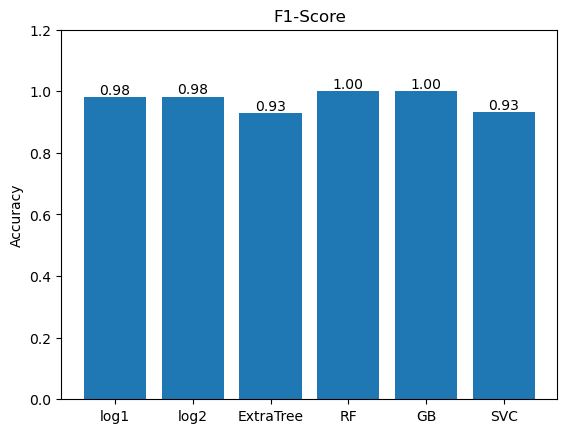

In [383]:
plt.figure(figsize = (8,8))
fig, ax = plt.subplots()
bar_container = ax.bar(list(output.keys()), list(output.values()))
ax.set(ylabel='Accuracy', title='F1-Score', ylim=(0, 1.2))
ax.bar_label(bar_container, fmt='{:.2f}')
plt.show()

RandomForest and GradientBoosting Algorithms give max accuracy out of all. 

## 4a. Predicting Customer Lifetime Value - Alternate Approach - #1

1. First define dependent variable CLV. It is given by the following formula:- 

    CLV = Customer Value x Avg Customer Lifespan
        = (Avg Purchase Value x Avg Frequency Rate) x Avg Customer Lifespan
        = (Total Revenue over set time frame / Total # of purchases over same time frame) x (Total no of purchases over a set time frame / Total # of customers acquired during same time frame) x Avg # of year a customer stays active / Total # of customers) 


2. Then perform regression

In [518]:
# make a copy of original dataframe 
df_clv = df.copy()
df_clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52524 entries, 0 to 52523
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  object        
 1   Transaction_ID       52524 non-null  object        
 2   Transaction_Date     52524 non-null  datetime64[ns]
 3   Product_SKU          52524 non-null  object        
 4   Product_Description  52524 non-null  object        
 5   Product_Category     52524 non-null  object        
 6   Quantity             52524 non-null  int64         
 7   Avg_Price            52524 non-null  float64       
 8   Delivery_Charges     52524 non-null  float64       
 9   Coupon_Status        52524 non-null  object        
 10  Month                52524 non-null  category      
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52524 non-null  int64         
 13  GST                  52524 non-

In [523]:
df_clv.groupby('CustomerID').agg({'Offline_Spend':sum, 'Online_Spend' : sum, 'Invoice_Value': sum})

Offline_Spend  Online_Spend  Invoice_Value
CustomerID                                            
12346                6000       5093.34         174.98
12347              118000     125355.54       12059.18
12348               74500      47477.33        1501.93
12350               68000      58383.27        1183.71
12356              108000      91680.12        1753.45
...                   ...           ...            ...
18259               15000      14056.08         789.15
18260              122500      93019.34        2573.66
18269               21000      17418.35         155.66
18277                3500       1153.81         301.02
18283              297500     242556.38        6947.81

[1468 rows x 3 columns]

In [491]:
# drop unnecessary columns

df_clv.drop(['Product_SKU','Cohort_Index', 'WeekDay', 'Week'], axis = 1, inplace = True)
df_clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52524 entries, 0 to 52523
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  object        
 1   Transaction_ID       52524 non-null  object        
 2   Transaction_Date     52524 non-null  datetime64[ns]
 3   Product_Description  52524 non-null  object        
 4   Product_Category     52524 non-null  object        
 5   Quantity             52524 non-null  int64         
 6   Avg_Price            52524 non-null  float64       
 7   Delivery_Charges     52524 non-null  float64       
 8   Coupon_Status        52524 non-null  object        
 9   Month                52524 non-null  category      
 10  Coupon_Code          52524 non-null  object        
 11  Discount_pct         52524 non-null  int64         
 12  GST                  52524 non-null  float64       
 13  Invoice_Value        52524 non-

In [492]:
# aggregate the data at customer and transaction id level and get the sum of purchases along
# with the date of purchases

df_clv_orders = df_clv.groupby(['CustomerID','Transaction_ID']).agg({'Invoice_Value': sum,'Transaction_Date': max})
df_clv_orders.head(40)

Invoice_Value Transaction_Date
CustomerID Transaction_ID                                
12346      38223                  174.98       2019-09-15
12347      23979                   38.81       2019-03-24
           23980                  431.88       2019-03-24
           23981                  330.98       2019-03-24
           23984                 7200.39       2019-03-24
           23985                  121.23       2019-03-24
           23986                  281.39       2019-03-24
           23987                   98.13       2019-03-24
           23989                  135.63       2019-03-24
           23990                   42.06       2019-03-24
           23992                  189.76       2019-03-24
           23993                  537.71       2019-03-24
           23996                   56.05       2019-03-24
           23997                   77.05       2019-03-24
           42370                   52.10       2019-11-01
           42371                   29.33       2019-11-01
           42373                  137.12       2019-11-02
           42374                  137.12       2019-11-02
           42376                  144.11       2019-11-02
           42377                  268.24       2019-11-02
           42378                  137.12       2019-11-02
           42379                   53.83       2019-11-02
           42380                  306.15       2019-11-02
           42388                   65.44       2019-11-02
           42390                  137.12       2019-11-02
           42391                   30.20       2019-11-02
           42392                   37.16       2019-11-02
           42393                  282.23       2019-11-02
           42394                  137.12       2019-11-02
           42395                  137.12       2019-11-02
           42396                  240.36       2019-11-02
           42397                  186.24       2019-11-02
12348      31048                  345.47       2019-06-22
           31049                  132.50       2019-06-22
           31050                  218.82       2019-06-22
           31051                   22.51       2019-06-22
           41106                   22.01       2019-10-19
           41107                  483.38       2019-10-19
           41109                   36.60       2019-10-19
           41110                  240.63       2019-10-19

To predict and calculate CLTV, we have to estimate the frequency, recency, and total amount of purchases by each customer.

In [493]:
# Estimate the frequency, recency, and total amount of purchases by each customer

def groupby_mean(x):
    return x.mean()

def purchase_duration(x):
    return (x.max() - x.min()).days

def purchase_count(x):
    return x.nunique()

def purchase_frequency(x):
    return purchase_duration(x) / purchase_count(x)

# change the name of function to
groupby_mean.__name__ = 'Avg'
purchase_count.__name__ = 'Count'

df_clv_summary = df_clv_orders.reset_index().groupby('CustomerID').agg(
    {'Invoice_Value': [min, max, sum, groupby_mean],
     'Transaction_Date': [min, max, purchase_duration, purchase_count, purchase_frequency]})

df_clv_summary.columns = ['_'.join(col) for col in df_clv_summary.columns]

print(df_clv_summary.shape)

df_clv_summary.head()

(1468, 9)


Invoice_Value_min  Invoice_Value_max  Invoice_Value_sum  \
CustomerID                                                            
12346                  174.98             174.98             174.98   
12347                   29.33            7200.39           12059.18   
12348                   22.01             483.38            1501.93   
12350                   44.51             236.33            1183.71   
12356                   15.08             556.86            1753.45   

            Invoice_Value_Avg Transaction_Date_min Transaction_Date_max  \
CustomerID                                                                
12346                  174.98           2019-09-15           2019-09-15   
12347                  389.01           2019-03-24           2019-11-02   
12348                  187.74           2019-06-22           2019-10-19   
12350                  107.61           2019-12-14           2019-12-14   
12356                  134.88           2019-09-15           2019-09-15   

            Transaction_Date_purchase_duration  Transaction_Date_Count  \
CustomerID                                                               
12346                                        0                       1   
12347                                      223                       3   
12348                                      119                       2   
12350                                        0                       1   
12356                                        0                       1   

            Transaction_Date_purchase_frequency  
CustomerID                                       
12346                                      0.00  
12347                                     74.33  
12348                                     59.50  
12350                                      0.00  
12356                                      0.00

In [494]:
# remove customers with one time purchase

df_clv_summary = df_clv_summary.loc[df_clv_summary['Transaction_Date_purchase_frequency'] > 0]
df_clv_summary.shape

(734, 9)

Out of 1468 unique customers, only half have made repeated purchases. 

Now lets examine repeat customers. We are particularly interested in number of purchases and frequency of purchases made. 

In [495]:
df_clv_summary.head(20)

Invoice_Value_min  Invoice_Value_max  Invoice_Value_sum  \
CustomerID                                                            
12347                   29.33            7200.39           12059.18   
12348                   22.01             483.38            1501.93   
12370                    8.30             794.87            6722.01   
12377                   17.29            2446.74            9732.13   
12383                   12.60             601.05            5238.64   
12386                   13.88             249.39             568.05   
12393                   17.35             310.52            2144.33   
12395                   17.88             248.84            1443.01   
12413                   21.85             667.91            3209.89   
12414                   47.17             123.45             507.99   
12415                   10.30             484.23            3129.88   
12417                   16.03             359.84            1824.55   
12422                   15.21             194.49             880.62   
12427                  117.62             771.45            1402.55   
12431                    8.82             615.19            5476.40   
12433                   23.14            2565.68           17712.15   
12437                   21.31             758.35            2022.72   
12441                   19.05             247.58            1421.46   
12471                   10.21            1040.07           13526.14   
12472                   13.29             943.50           12204.08   

            Invoice_Value_Avg Transaction_Date_min Transaction_Date_max  \
CustomerID                                                                
12347                  389.01           2019-03-24           2019-11-02   
12348                  187.74           2019-06-22           2019-10-19   
12370                  152.77           2019-05-26           2019-06-25   
12377                  270.34           2019-07-05           2019-11-21   
12383                  134.32           2019-07-13           2019-09-23   
12386                   94.68           2019-03-27           2019-07-28   
12393                  164.95           2019-08-17           2019-08-31   
12395                  103.07           2019-02-09           2019-07-20   
12413                  320.99           2019-07-31           2019-08-22   
12414                   84.66           2019-12-13           2019-12-14   
12415                  130.41           2019-07-26           2019-08-13   
12417                  121.64           2019-06-26           2019-10-18   
12422                   97.85           2019-09-19           2019-09-20   
12427                  467.52           2019-02-01           2019-07-14   
12431                  171.14           2019-01-02           2019-11-21   
12433                  322.04           2019-01-09           2019-04-10   
12437                  144.48           2019-08-24           2019-12-14   
12441                  129.22           2019-03-28           2019-03-29   
12471                  193.23           2019-01-18           2019-12-16   
12472                  184.91           2019-01-11           2019-10-30   

            Transaction_Date_purchase_duration  Transaction_Date_Count  \
CustomerID                                                               
12347                                      223                       3   
12348                                      119                       2   
12370                                       30                       2   
12377                                      139                       2   
12383                                       72                       4   
12386                                      123                       2   
12393                                       14                       2   
12395                                      161                       3   
12413                                       22            

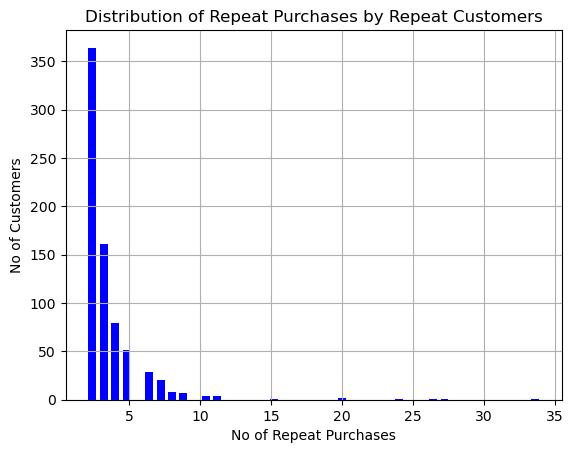

In [496]:
# Visualize the Distribution of repeat purchases by the repeat customers

df_clv_summary.Transaction_Date_Count.hist(rwidth = 0.7, bins = 40, color = 'blue')
plt.xlabel('No of Repeat Purchases', fontsize = 10)
plt.ylabel('No of Customers', fontsize = 10)
plt.title('Distribution of Repeat Purchases by Repeat Customers', fontsize = 12)
plt.show()

Majority of repeat customers have made only less than 5 (2 or 3) repeat purchases. There are certain outliers which have made more than 30 repeat purchases too. 

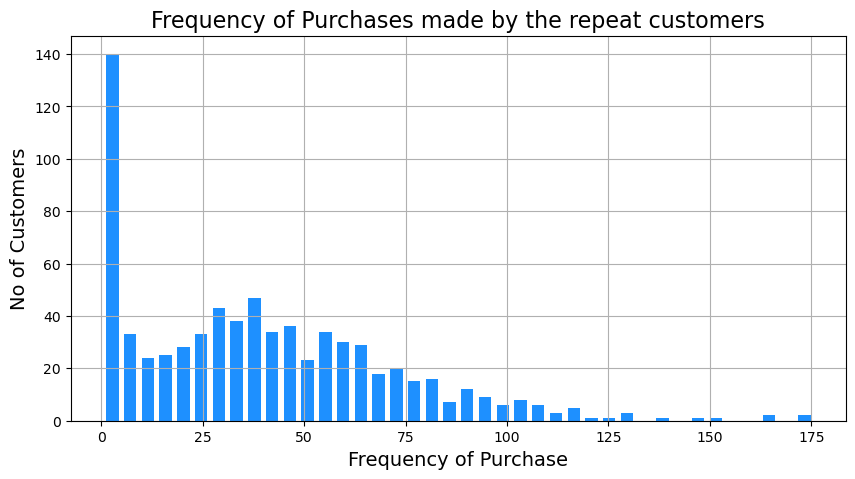

In [497]:
ax = df_clv_summary.Transaction_Date_purchase_frequency.hist(bins = 40, color = 'dodgerblue',
                                                            rwidth = 0.7, figsize = (10, 5))
plt.ylabel('No of Customers', fontsize = 14)
plt.xlabel('Frequency of Purchase', fontsize = 14)
plt.title('Frequency of Purchases made by the repeat customers', fontsize = 16)
plt.show()

From the plot we can see that majority of the repeat customers have purchase frequency of 2 or 3 days, however these type of customers do not have more than 2 or 3 purchase count as well. Rest, other repeat customers have the purchase frequency ranging from 25 to 50 days.  

## Customer Lifetime Value 

Now we will apply a simple Linear Regression model to determine the customer lifetime value. 

Rsquared is the measure of goodness of fit of the model. It tells how good the model has fitted the data. Its value ranges from 0 to 1 and it determines the proportion of variation explained by the model. 

In [226]:
# Slice the data into chunks of 3 months as we will predict the CLV for next 3 months. The idea is to divide the 
# data into four groups (quarters). Aggregate the data on customer and Transaction date level. Then group the 
# Transaction dates in to four groups based on the quarter and and get the sum, mean and purchase count for that
# group.

# group the data
clv_freq = '3M'

# aggregate data at customer level and group 3 months transactions into one with date as quarter ending date
df_clv_data = df_clv_orders.reset_index().groupby(['CustomerID', 
                                                   pd.Grouper(key = 'Transaction_Date', freq = clv_freq)
                                                  ]).agg({'Invoice_Value':[sum, groupby_mean], 
                                                         'Transaction_Date': purchase_count})

# create new column names
df_clv_data.columns = ['_'.join(col) for col in df_clv_data.columns]
df_clv_data = df_clv_data.reset_index()

# create a dictionary of groups and corresponding quarter ending dates
map_date_month = {str(x)[:10]: 'Group_%s' % (i + 1) for i, x in enumerate(
    sorted(df_clv_data['Transaction_Date'].unique(),reverse = True))}

# map transaction date to the group
df_clv_data['Groups'] = df_clv_data['Transaction_Date'].apply(lambda x : map_date_month[str(x)[:10]])

# create feature columns
df_clv_features = pd.pivot_table(df_clv_data.loc[df_clv_data['Groups'] != 'Group_1'], 
                                values = ['Invoice_Value_sum', 'Invoice_Value_Avg', 'Transaction_Date_Count'], 
                                columns = 'Groups', 
                                index = 'CustomerID')
df_clv_features.reset_index()
df_clv_features.columns = ['_'.join(col) for col in df_clv_features.columns]
df_clv_features.reset_index(level = 0, inplace = True)

# Fill null values with 0
df_clv_features.fillna(0, inplace = True)

# # Select the target
df_clv_target = df_clv_data.loc[df_clv_data['Groups'] == 'Group_1', ['CustomerID', 'Invoice_Value_sum']]
df_clv_target.columns = ['CustomerID', 'CLV_' + clv_freq]

# # Merge features set and target column
# df_clv_sample_set = df_clv_features.merge(df_clv_target, right_on = 'CustomerID', left_on = 'CustomerID', 
#                                           how = 'left')

# df_clv_sample_set.fillna(0, inplace = True)
# df_clv_sample_set.head()

CustomerID  Invoice_Value_Avg_Group_2  Invoice_Value_Avg_Group_3  \
0      12346                     174.98                       0.00   
1      12347                       0.00                       0.00   
2      12348                     195.66                     179.83   
3      12356                     134.88                       0.00   
4      12359                     217.73                       0.00   

   Invoice_Value_Avg_Group_4  Invoice_Value_Avg_Group_5  \
0                       0.00                       0.00   
1                     733.93                       0.00   
2                       0.00                       0.00   
3                       0.00                       0.00   
4                       0.00                       0.00   

   Invoice_Value_sum_Group_2  Invoice_Value_sum_Group_3  \
0                     174.98                       0.00   
1                       0.00                       0.00   
2                     782.62                     719.30   
3                    1753.45                       0.00   
4                     653.19                       0.00   

   Invoice_Value_sum_Group_4  Invoice_Value_sum_Group_5  \
0                       0.00                       0.00   
1                    9541.06                       0.00   
2                       0.00                       0.00   
3                       0.00                       0.00   
4                       0.00                       0.00   

   Transaction_Date_Count_Group_2  Transaction_Date_Count_Group_3  \
0                            1.00                            0.00   
1                            0.00                            0.00   
2                            1.00                            1.00   
3                            1.00                            0.00   
4                            1.00                            0.00   

   Transaction_Date_Count_Group_4  Transaction_Date_Count_Group_5  CLV_3M  
0                            0.00                            0.00    0.00  
1                            1.00                            0.00 2518.11  
2                            0.00                            0.00    0.00  
3                            0.00                            0.00    0.00  
4                            0.00                            0.00    0.00

## Building a linear regression model 

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target = 'CLV_3M'
all_features = [x for x in df_clv_sample_set.columns if x not in ['CustomerID', target]]

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df_clv_sample_set[all_features], 
                                                   df_clv_sample_set[target], 
                                                   random_state = 42, 
                                                   test_size = 0.2)

lin_reg = LinearRegression(n_jobs = -1)
lin_reg.fit(X_train, y_train)
coef = pd.DataFrame(list(zip(all_features, lin_reg.coef_)))
coef.columns = ['Features', 'Coefficients']
coef

Features  Coefficients
0        Invoice_Value_Avg_Group_2         -0.37
1        Invoice_Value_Avg_Group_3          0.03
2        Invoice_Value_Avg_Group_4          0.73
3        Invoice_Value_Avg_Group_5          1.00
4        Invoice_Value_sum_Group_2          0.08
5        Invoice_Value_sum_Group_3          0.15
6        Invoice_Value_sum_Group_4          0.01
7        Invoice_Value_sum_Group_5          0.03
8   Transaction_Date_Count_Group_2        148.97
9   Transaction_Date_Count_Group_3        175.45
10  Transaction_Date_Count_Group_4         13.76
11  Transaction_Date_Count_Group_5        -58.68

In [229]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

In [230]:
print('Rsquared for Training set : %0.2f' % r2_score(y_true = y_train, y_pred = train_pred))
print('Rsquared for Test set : %0.2f' % r2_score(y_true = y_test, y_pred = test_pred))

Rsquared for Training set : 0.15
Rsquared for Test set : -0.08


<Figure size 640x480 with 0 Axes>

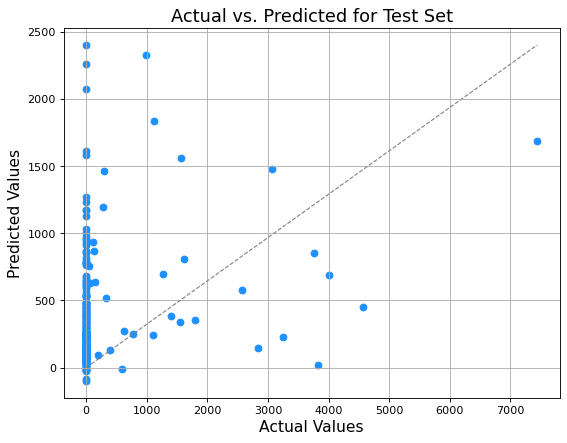

In [231]:
#  scatter plot
plt.figure(figsize=(8, 6), dpi=80)
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test, test_pred, color='dodgerblue')
plt.plot([0, max(y_test)], [0, max(test_pred)], color='gray', lw=1, linestyle='--')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Test Set', fontsize=16)
plt.grid()
plt.show()

## Summary

Based on the data analysis, we found that the repeat customers tend to make about 5 (2 or 3) purchases or less within a year and the majority of repeat customers tend to make a purchase every 5 to 20 days


We predicted 3-month CLTV for customers of online retail using linear regression R-squared value for the test set is -0.16, which is not great. we need to try other regression models such as Epsilon-Support Vector Regression and Random Forest Regressor


By knowing CLTV, we can develop positive ROI strategies and make decisions about how much money to invest in acquiring new customers and retaining existing ones.

# 5. Cross-Selling (Which products are selling together)


### You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.

In [401]:
# import apriori_python
# import apyori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [479]:
mba_df = df.groupby('Transaction_ID').Product_Description.unique()
list_of_items = [arr.tolist() for arr in mba_df.tolist()]
list_of_items

[['Nest Learning Thermostat 3rd Gen-USA - Stainless Steel'],
 ['Nest Learning Thermostat 3rd Gen-USA - Stainless Steel'],
 ['Google Laptop and Cell Phone Stickers'],
 ["Google Men's 100% Cotton Short Sleeve Hero Tee Black",
  'Google Canvas Tote Natural/Navy',
  'Sport Bag',
  'Google 22 oz Water Bottle',
  'Google Infuser-Top Water Bottle',
  'Engraved Ceramic Google Mug',
  'Maze Pen',
  'Galaxy Screen Cleaning Cloth',
  'Badge Holder',
  "YouTube Men's Short Sleeve Hero Tee Black"],
 ['Nest Cam Outdoor Security Camera - USA',
  'Nest Protect Smoke + CO White Wired Alarm-USA'],
 ["Google Men's 100% Cotton Short Sleeve Hero Tee Red",
  "Google Women's Short Sleeve Hero Tee White",
  'Red Shine 15 oz Mug'],
 ['Maze Pen',
  'Ballpoint LED Light Pen',
  'Color Changing Grip Pen',
  'Colored Pencil Set',
  'Spiral Notebook and Pen Set',
  'Compact Selfie Stick'],
 ['Nest Cam Indoor Security Camera - USA'],
 ['Nest Learning Thermostat 3rd Gen-USA - Stainless Steel'],
 ['Android Sticker She

In [483]:
association_rules = apyori.apriori(list_of_items, min_support = 0.0045, min_confidence = 0.01, min_lift = 3, 
                                   min_length = 2)
association_results = list(association_rules)
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'Google Sunglasses', 'Google 22 oz Water Bottle'})
frozenset({'Google Doodle Decal', 'Google Laptop and Cell Phone Stickers'})
frozenset({'YouTube Custom Decals', 'Google Laptop and Cell Phone Stickers'})


Google Sunglasses and Google 22 oz Water Bottle are selling together - may be bought by people going for hiking or walking

(Google Doodle Decal, Google Laptop and Cell Phone Stickers) and (YouTube Custom Decals, Google Laptop and Cell Phone Stickers) are being bought together. 

In [481]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    # second index of the inner list
    print("Support: " + str(item[1]))
    # third index of the list located at 0th position
    # of the third index of the inner list
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("-----------------------------------------------------")

Rule: Google Doodle Decal -> Google Laptop and Cell Phone Stickers
Support: 0.00492
Confidence: 0.38437499999999997
Lift: 11.922301488833746
-----------------------------------------------------
Rule: YouTube Custom Decals -> Google Laptop and Cell Phone Stickers
Support: 0.00536
Confidence: 0.3198090692124105
Lift: 9.919636141824148
-----------------------------------------------------


# 6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)

### For this, we need create dependent variable at customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next purchase of given customer.

In [32]:
df_pnp = df.copy()
df_pnp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52524 entries, 0 to 52523
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  object        
 1   Transaction_ID       52524 non-null  object        
 2   Transaction_Date     52524 non-null  datetime64[ns]
 3   Product_SKU          52524 non-null  object        
 4   Product_Description  52524 non-null  object        
 5   Product_Category     52524 non-null  object        
 6   Quantity             52524 non-null  int64         
 7   Avg_Price            52524 non-null  float64       
 8   Delivery_Charges     52524 non-null  float64       
 9   Coupon_Status        52524 non-null  object        
 10  Month                52524 non-null  object        
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52524 non-null  int64         
 13  GST                  52524 non-

In [733]:
# remove unnecessary columns

df_pnp.drop(['Product_SKU','Product_Description', 'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
'Coupon_Status', 'Month', 'Coupon_Code','Discount_pct', 'GST', 'Transaction_Month','Order_Month', 'Cohort_Index',
'WeekDay', 'Week', 'Gender', 'Location', 'Tenure_Months', 'tax_paid', 'Offline_Spend','Online_Spend'], axis = 1, inplace = True)
# df_pnp.head()

In [44]:
# aggregate on customer level
df_pnp = df_pnp.groupby('CustomerID').agg({'Transaction_Date' : [min, max, lambda x : x.nunique()],
                                           'Invoice_Value' : sum})
# reset index to bring CustomerID as column
df_pnp.reset_index(level = 0, inplace = True)

flatten the multi-index columns to single index column
df_pnp.columns = ['_'.join(col) if type(col) is tuple else col for col in df_pnp.columns.values]

rename the columns
df_pnp.rename({'CustomerID_':'CustomerID', 'Transaction_Date_<lambda_0>': 'Frequency', 
               'Transaction_Date_min':'FirstPurchase', 'Transaction_Date_max' : 'LastPurchase', 
              'Invoice_Value_sum' : 'Monetary'}, axis = 1, inplace = True)

# # create column for Recency
anchor_date = df_pnp.LastPurchase.max() + datetime.timedelta(1)
df_pnp['Recency'] = (anchor_date - df_pnp.LastPurchase).dt.days

# # rearrange the columns order
df_pnp = df_pnp[['CustomerID', 'Recency', 'Frequency', 'Monetary','FirstPurchase','LastPurchase']]

# # create column for days between first and last transaction of the customer
df_pnp['Days_Between_Transaction'] = (df_pnp.LastPurchase - df_pnp.FirstPurchase).dt.days

# # filter out repeat customers
df_pnp = df_pnp.query('Days_Between_Transaction > 0')

# create column for Avg Days per transaction
df_pnp['Avg_Days_Per_Transaction'] = round(df_pnp['Days_Between_Transaction'] / df_pnp['Frequency'], 2)

# create column for Purchase category based on the average days per transaction
df_pnp['Purchase_Cat'] = pd.cut(df_pnp.Avg_Days_Per_Transaction, 
                                bins = [0, 30, 60, 90, df_pnp.Avg_Days_Per_Transaction.max()], 
                                labels = [1,2,3,4]) # '0-30', '30-60', '60-90', '90+'

# dropping unnecessary columns
df_pnp.drop(['FirstPurchase', 'LastPurchase' ,'Avg_Days_Per_Transaction'], axis = 1, inplace = True)

# change the index of the data
df_pnp.set_index('CustomerID', inplace = True)

df_pnp

Recency  Frequency  Monetary  Days_Between_Transaction  \
CustomerID                                                           
12347            60          3  12059.18                       223   
12348            74          2   1501.93                       119   
12370           190          2   6722.01                        30   
12377            41          2   9732.13                       139   
12383           100          4   5238.64                        72   
...             ...        ...       ...                       ...   
18239            35          3   6383.23                       301   
18245            34          3   7433.52                       147   
18260            88          3   2573.66                       105   
18269           195          2    155.66                        76   
18283            83          2   6947.81                        73   

           Purchase_Cat  
CustomerID               
12347                 3  
12348                 2  
12370                 1  
12377                 3  
12383                 1  
...                 ...  
18239                 4  
18245                 2  
18260                 2  
18269                 2  
18283                 2  

[734 rows x 5 columns]

In [48]:
# segregate X and y
X = df_pnp.select_dtypes(['int', 'float'])
y = df_pnp.select_dtypes('category')

# standardize the data
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = scaler.get_feature_names_out(), index = df_pnp.index)
X.head()

Recency  Frequency  Monetary  Days_Between_Transaction
CustomerID                                                        
12347         -0.63      -0.14      1.10                      0.91
12348         -0.47      -0.51     -0.51                     -0.09
12370          0.86      -0.51      0.28                     -0.96
12377         -0.84      -0.51      0.74                      0.10
12383         -0.17       0.24      0.06                     -0.55

## First we will use Logistics Regression from statsmodels api

In [49]:
# split the data into test and train
data = pd.concat([X,y], axis = 1)
data

Recency  Frequency  Monetary  Days_Between_Transaction  \
CustomerID                                                           
12347         -0.63      -0.14      1.10                      0.91   
12348         -0.47      -0.51     -0.51                     -0.09   
12370          0.86      -0.51      0.28                     -0.96   
12377         -0.84      -0.51      0.74                      0.10   
12383         -0.17       0.24      0.06                     -0.55   
...             ...        ...       ...                       ...   
18239         -0.91      -0.14      0.23                      1.67   
18245         -0.92      -0.14      0.39                      0.18   
18260         -0.31      -0.14     -0.35                     -0.23   
18269          0.92      -0.51     -0.72                     -0.51   
18283         -0.36      -0.51      0.32                     -0.54   

           Purchase_Cat  
CustomerID               
12347                 3  
12348                 2  
12370                 1  
12377                 3  
12383                 1  
...                 ...  
18239                 4  
18245                 2  
18260                 2  
18269                 2  
18283                 2  

[734 rows x 5 columns]

In [52]:
# split the data into train and test for statsmodels api
train, test = train_test_split(df_pnp, test_size = 0.2)
train.Purchase_Cat = train.Purchase_Cat.astype('int')
test.Purchase_Cat = test.Purchase_Cat.astype('int')
train

Recency  Frequency  Monetary  Days_Between_Transaction  \
CustomerID                                                           
14426            35          3   3543.06                       173   
17975            20          4  11692.47                       258   
16686           181          2   8627.44                         1   
14708           222          2   2085.51                        78   
15661            61          2   1261.80                       103   
...             ...        ...       ...                       ...   
13324            35          2   2332.06                       190   
15555           231          3   6308.19                        76   
13093            20          7  11283.09                       334   
18260            88          3   2573.66                       105   
15271           159          2   4111.38                       100   

            Purchase_Cat  
CustomerID                
14426                  2  
17975                  3  
16686                  1  
14708                  2  
15661                  2  
...                  ...  
13324                  4  
15555                  1  
13093                  2  
18260                  2  
15271                  2  

[587 rows x 5 columns]

In [53]:
import statsmodels.formula.api as smf

In [54]:
formula = 'Purchase_Cat ~ ' + ' + '.join(train.columns.difference(['Purchase_Cat']))


model_1 = smf.mnlogit(formula, data = train).fit()
print(model_1.summary())

Optimization terminated successfully.
         Current function value: nan
         Iterations 12
                          MNLogit Regression Results                          
Dep. Variable:           Purchase_Cat   No. Observations:                  587
Model:                        MNLogit   Df Residuals:                      572
Method:                           MLE   Df Model:                           12
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                     nan
Time:                        21:09:44   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -721.09
Covariance Type:            nonrobust   LLR p-value:                       nan
          Purchase_Cat=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                       nan        nan        nan        nan         nan    

## Using sklearn Logistics Regression metho

In [55]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train

Recency  Frequency  Monetary  Days_Between_Transaction
CustomerID                                                        
15898          1.94      -0.51     -0.13                     -1.08
16735          0.33      -0.51     -0.26                     -1.24
12683         -0.25       0.61      0.77                      0.41
14543         -0.48      -0.51     -0.34                      0.46
15973          0.58      -0.51     -0.69                     -0.16
...             ...        ...       ...                       ...
17082         -0.56      -0.51     -0.66                     -1.24
13370          1.75      -0.14     -0.23                     -0.60
15422         -0.25      -0.51     -0.70                     -1.23
14401         -0.84      -0.51     -0.50                      0.42
13802         -1.01      -0.51     -0.57                      0.68

[587 rows x 4 columns]

In [56]:
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        64
           2       0.93      0.94      0.93        53
           3       0.83      0.70      0.76        27
           4       0.20      0.67      0.31         3

    accuracy                           0.89       147
   macro avg       0.74      0.81      0.74       147
weighted avg       0.93      0.89      0.90       147



### Alternate Method 

In this approach we will split the data into 9 months and 3 months. We will try to preidict the next purchase date by the customer depending upon the behavior of the customer in first 9 months. 

**Step 1**. Split the data into first 9 months and balance 3 months. 

**Step 2**. Get last purchase date of the customer in first 9 months data and first purchase date for 3 months data. The difference between these two will be our label which will tell when the customer has made purchase. 

**Step 3**. Get the RFM characteristics of the customers. 

**Step 4**. Cluster data based on these characteristics and find their mean value per cluster.

**Step5**. By using shift method create new columns with dates of last three purchases. Then we calculate the difference in days between these purchase dates and then by using .agg() method find the mean and std of difference in purchase dates in days. In this case we will drop all those customers who have more than 2 purchases to be tagged as frequent customers likely to go for next purchase. 

In [58]:
# import plotly for visualization 
import chart_studio.plotly as cpy
import plotly.offline as pyoff
import plotly.graph_objs as go

# initiate plotly
pyoff.init_notebook_mode()

In [218]:
df_pnp = df.copy()
# df_pnp.info()

In [219]:
# We will use first nine months of data to predict customer's first purchase
# date in next three months. If there is not purchase we will predict 
# that too. 
df_pnp_9m = df_pnp.query("Transaction_Date < '2019-09-01'")
df_pnp_next = df_pnp.query("Transaction_Date > '2019-08-31'")

df_pnp_9m represents nine months performance whereas we will use df_pnp_next to find out the days between the last purchase date in df_pnp_9m and the first one in df_pnp_next. Also we will create df_pnp_user to possess a user level feature set for the prediction model. 

In [220]:
df_pnp_user = pd.DataFrame(df_pnp_9m['CustomerID'].unique())
df_pnp_user.columns = ['CustomerID']
df_pnp_user

CustomerID
0         17850
1         13047
2         12583
3         15100
4         14688
...         ...
1124      12665
1125      14866
1126      13029
1127      12503
1128      14608

[1129 rows x 1 columns]

By using the data in df_pnp_next, we need to calculate our label (days between last purchase before cut off date and first purchase after that):

In [221]:
# create a dataframe with customer id and first purchase date in df_pnp_next
df_next_first_purchase = df_pnp_next.groupby('CustomerID').Transaction_Date.min().reset_index()
df_next_first_purchase.columns = ['CustomerID', 'MinPurchaseDate']

# create a dataframe with customer id and last purchase date in df_pnp_9m
df_pnp_9m_last_purchase = df_pnp_9m.groupby('CustomerID').Transaction_Date.max().reset_index()
df_pnp_9m_last_purchase.columns = ['CustomerID', 'MaxPurchaseDate']

# merge two dataframes
df_purchase_dates = pd.merge(df_next_first_purchase, df_pnp_9m_last_purchase, on = 'CustomerID', how = 'left')

# calculate the time difference in days 
df_purchase_dates['NextPurchaseDay'] = (df_purchase_dates['MinPurchaseDate'] - df_purchase_dates['MaxPurchaseDate']).dt.days

# merge with df_pnp_user
df_pnp_user = pd.merge(df_pnp_user, df_purchase_dates[['CustomerID', 'NextPurchaseDay']], 
                  on = 'CustomerID', how = 'left')

# fill NA values with 999
df_pnp_user.fillna(999, inplace = True)

df_pnp_user.head()

CustomerID  NextPurchaseDay
0      17850           999.00
1      13047           139.00
2      12583           999.00
3      15100           999.00
4      14688           255.00

For this question, we will select following features: -

1. RFM scores and clusters
2. Days between the last three purchases
3. Mean and Std of difference between purchase in days

In [222]:
# get max purchase date for Recency and create a dataframe
# and add it to the df_pnp_user
df_pnp_9m_last_purchase['Recency'] = (df_pnp_9m_last_purchase.MaxPurchaseDate.max() - df_pnp_9m_last_purchase.MaxPurchaseDate).dt.days
df_pnp_user = pd.merge(df_pnp_user, df_pnp_9m_last_purchase[['CustomerID', 'Recency']], on = 'CustomerID', how = 'left')
df_pnp_user

CustomerID  NextPurchaseDay  Recency
0         17850           999.00      217
1         13047           139.00       30
2         12583           999.00       29
3         15100           999.00        1
4         14688           255.00      241
...         ...              ...      ...
1124      12665            28.00        9
1125      14866           999.00      146
1126      13029           999.00       50
1127      12503           999.00       35
1128      14608           999.00      112

[1129 rows x 3 columns]

In [223]:
# plot recency
plot_data = [
    go.Histogram(
        x = df_pnp_user['Recency']
    )]

plot_layout = go.Layout(
title = 'Recency')

fig = go.Figure(data = plot_data, layout = plot_layout)

pyoff.iplot(fig)

In [224]:
# clustering for Recency
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_pnp_user[['Recency']])
df_pnp_user['Recency_Cluster'] = kmeans.predict(df_pnp_user[['Recency']])
df_pnp_user

CustomerID  NextPurchaseDay  Recency  Recency_Cluster
0         17850           999.00      217                2
1         13047           139.00       30                1
2         12583           999.00       29                1
3         15100           999.00        1                1
4         14688           255.00      241                2
...         ...              ...      ...              ...
1124      12665            28.00        9                1
1125      14866           999.00      146                3
1126      13029           999.00       50                1
1127      12503           999.00       35                1
1128      14608           999.00      112                0

[1129 rows x 4 columns]

In [225]:
# order cluster method 
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    df_new = df_pnp_user.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by = target_field_name, ascending = False).reset_index(drop = True)
    df_final = pd.merge(df_pnp_user, df_new[[cluster_field_name, target_field_name]], on = cluster_field_name, 
                       suffixes=('_original', '_mean'))
    return df_final

In [226]:
df_pnp_user = order_cluster('Recency_Cluster', 'Recency', df_pnp_user, False)
df_pnp_user

CustomerID  NextPurchaseDay  Recency_original  Recency_Cluster  \
0         17850           999.00               217                2   
1         14688           255.00               241                2   
2         16098           999.00               241                2   
3         18074           999.00               241                2   
4         17420           999.00               241                2   
...         ...              ...               ...              ...   
1124      16861           999.00               168                3   
1125      16138           999.00               168                3   
1126      13481           999.00               168                3   
1127      17339           999.00               135                3   
1128      14866           999.00               146                3   

      Recency_mean  
0           217.18  
1           217.18  
2           217.18  
3           217.18  
4           217.18  
...            ...  
1124        148.10  
1125        148.10  
1126        148.10  
1127        148.10  
1128        148.10  

[1129 rows x 5 columns]

In [227]:
# print cluster characteristics 
df_pnp_user.groupby('Recency_Cluster')['Recency_original'].describe()

count   mean   std    min    25%    50%    75%    max
Recency_Cluster                                                       
0               297.00  83.05 17.07  54.00  70.00  81.00  99.00 115.00
1               442.00  23.53 15.99   0.00   9.00  22.00  37.00  53.00
2               152.00 217.18 15.48 184.00 210.00 218.00 230.00 242.00
3               238.00 148.10 17.91 116.00 134.00 146.00 163.00 182.00

In [228]:
# get frequency scores for each customer 
df_freq = df_pnp_9m.groupby('CustomerID').Transaction_Date.nunique().reset_index()
df_freq.rename(columns = {'Transaction_Date':'Frequency'}, inplace = True)
df_pnp_user = pd.merge(df_pnp_user, df_freq, on = 'CustomerID')
df_pnp_user

CustomerID  NextPurchaseDay  Recency_original  Recency_Cluster  \
0         17850           999.00               217                2   
1         14688           255.00               241                2   
2         16098           999.00               241                2   
3         18074           999.00               241                2   
4         17420           999.00               241                2   
...         ...              ...               ...              ...   
1124      16861           999.00               168                3   
1125      16138           999.00               168                3   
1126      13481           999.00               168                3   
1127      17339           999.00               135                3   
1128      14866           999.00               146                3   

      Recency_mean  Frequency  
0           217.18         10  
1           217.18          2  
2           217.18          1  
3           217.18          1  
4           217.18          1  
...            ...        ...  
1124        148.10          1  
1125        148.10          1  
1126        148.10          1  
1127        148.10          1  
1128        148.10          1  

[1129 rows x 6 columns]

In [229]:
# plot frequency
plot_data = [
    go.Histogram(
        x = df_pnp_user['Frequency']
    )]

plot_layout = go.Layout(
title = 'Frequency')

fig = go.Figure(data = plot_data, layout = plot_layout)

pyoff.iplot(fig)

In [230]:
#clustering for frequency
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pnp_user[['Frequency']])
df_pnp_user['Frequency_Cluster'] = kmeans.predict(df_pnp_user[['Frequency']])

#order frequency clusters and show the characteristics
df_pnp_user = order_cluster('Frequency_Cluster', 'Frequency',df_pnp_user,True)
df_pnp_user.groupby('Frequency_Cluster')['Frequency_original'].describe()

count  mean  std   min   25%   50%   75%   max
Frequency_Cluster                                                
0                 396.00  2.32 0.47  2.00  2.00  2.00  3.00  3.00
1                   7.00 16.57 7.16 12.00 12.50 13.00 17.00 32.00
2                 615.00  1.00 0.00  1.00  1.00  1.00  1.00  1.00
3                 111.00  4.94 1.28  4.00  4.00  4.00  6.00 10.00

In [231]:
# calculate monetary value 
df_mon = df_pnp_9m.groupby('CustomerID').Invoice_Value.sum().reset_index()
df_pnp_user = pd.merge(df_mon, df_pnp_user, on = 'CustomerID')
df_pnp_user

CustomerID  Invoice_Value  NextPurchaseDay  Recency_original  \
0         12347        9541.06           222.00               160   
1         12348         719.30           119.00                70   
2         12359         653.19           999.00                 8   
3         12370        6722.01           999.00                67   
4         12377        3923.16           139.00                57   
...         ...            ...              ...               ...   
1124      18256          77.52           999.00                57   
1125      18259         789.15           999.00               148   
1126      18260        2269.95            55.00                20   
1127      18269         155.66           999.00                72   
1128      18283        2357.76            73.00                33   

      Recency_Cluster  Recency_mean  Frequency_original  Frequency_Cluster  \
0                   3        148.10                   1                  2   
1                   0         83.05                   1                  2   
2                   1         23.53                   1                  2   
3                   0         83.05                   2                  0   
4                   0         83.05                   1                  2   
...               ...           ...                 ...                ...   
1124                0         83.05                   1                  2   
1125                3        148.10                   1                  2   
1126                1         23.53                   2                  0   
1127                0         83.05                   2                  0   
1128                1         23.53                   1                  2   

      Frequency_mean  
0               1.00  
1               1.00  
2               1.00  
3               2.32  
4               1.00  
...              ...  
1124            1.00  
1125            1.00  
1126            2.32  
1127            2.32  
1128            1.00  

[1129 rows x 9 columns]

In [232]:
# plot invoice value
plot_data = [
    go.Histogram(
        x = df_pnp_user['Invoice_Value']
    )]

plot_layout = go.Layout(
title = 'Invoice_Value')

fig = go.Figure(data = plot_data, layout = plot_layout)

pyoff.iplot(fig)

In [233]:
#Revenue clusters 
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pnp_user[['Invoice_Value']])
df_pnp_user['Invoice_Cluster'] = kmeans.predict(df_pnp_user[['Invoice_Value']])

#ordering clusters and who the characteristics
df_pnp_user = order_cluster('Invoice_Cluster', 'Invoice_Value',df_pnp_user,True)
df_pnp_user.groupby('Invoice_Cluster')['Invoice_Value_original'].describe()

count     mean      std      min      25%      50%      75%  \
Invoice_Cluster                                                                
0               924.00  1325.92  1075.45     7.06   441.32  1029.18  2072.48   
1               191.00  7019.55  2498.75  4183.77  5135.81  6358.07  7926.04   
2                12.00 24664.89  8062.84 16407.69 18634.10 20423.97 31589.90   
3                 2.00 65852.54 13690.89 56171.62 61012.08 65852.54 70693.00   

                     max  
Invoice_Cluster           
0                4111.38  
1               15631.27  
2               37649.28  
3               75533.46

In [234]:
# building overall segmentation 
df_pnp_user['OverAllScore'] = df_pnp_user['Recency_Cluster'] + df_pnp_user['Frequency_Cluster'] + df_pnp_user['Invoice_Cluster']
df_pnp_user

CustomerID  Invoice_Value_original  NextPurchaseDay  Recency_original  \
0         12347                 9541.06           222.00               160   
1         12370                 6722.01           999.00                67   
2         12383                 5222.93            30.00                 7   
3         12471                11053.64            56.00                 3   
4         12472                 7954.54           245.00               185   
...         ...                     ...              ...               ...   
1124      15808                16407.69           163.00                43   
1125      17841                36540.03            14.00                 8   
1126      17850                37649.28           999.00               217   
1127      12748                75533.46            41.00                36   
1128      15311                56171.62             9.00                 7   

      Recency_Cluster  Recency_mean  Frequency_original  Frequency_Cluster  \
0                   3        148.10                   1                  2   
1                   0         83.05                   2                  0   
2                   1         23.53                   3                  0   
3                   1         23.53                   9                  3   
4                   2        217.18                   2                  0   
...               ...           ...                 ...                ...   
1124                1         23.53                   5                  3   
1125                1         23.53                  13                  1   
1126                2        217.18                  10                  3   
1127                1         23.53                  32                  1   
1128                1         23.53                  13                  1   

      Frequency_mean  Invoice_Cluster  Invoice_Value_mean  OverAllScore  
0               1.00                1             7019.55             6  
1               2.32                1             7019.55             1  
2               2.32                1             7019.55             2  
3               4.94                1             7019.55             5  
4               2.32                1             7019.55             3  
...              ...              ...                 ...           ...  
1124            4.94                2            24664.89             6  
1125           16.57                2            24664.89             4  
1126            4.94                2            24664.89             7  
1127           16.57                3            65852.54             5  
1128           16.57                3            65852.54             5  

[1129 rows x 12 columns]

In [235]:
#assign segment names
df_pnp_user['Segment'] = 'Low-Value'
df_pnp_user.loc[df_pnp_user['OverAllScore']>4,'Segment'] = 'Mid-Value' 
df_pnp_user.loc[df_pnp_user['OverAllScore']>7,'Segment'] = 'High-Value'

In [236]:
#plot Invoice_Value vs recency
df_pnp_user_graph = df_pnp_user.query("Invoice_Value_original < 2652 and Frequency_original < 9")

plot_data = [
    go.Scatter(
        x=df_pnp_user.query("Segment == 'Low-Value'")['Recency_original'],
        y=df_pnp_user.query("Segment == 'Low-Value'")['Invoice_Value_original'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=df_pnp_user.query("Segment == 'Mid-Value'")['Recency_original'],
        y=df_pnp_user.query("Segment == 'Mid-Value'")['Invoice_Value_original'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=df_pnp_user.query("Segment == 'High-Value'")['Recency_original'],
        y=df_pnp_user.query("Segment == 'High-Value'")['Invoice_Value_original'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Invoice_Value"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [237]:
# now we add next two features using shift method 

# create a dataframe with CustomerID and Transaction_Date
df_pnp_day_order = df_pnp_9m[['CustomerID', 'Transaction_Date']]
df_pnp_day_order = df_pnp_day_order.sort_values(['CustomerID', 'Transaction_Date']).reset_index(drop = True)
df_pnp_day_order = df_pnp_day_order.drop_duplicates(subset = ['CustomerID', 'Transaction_Date'], keep = 'first').reset_index(drop = True)
df_pnp_day_order

CustomerID Transaction_Date
0         12347       2019-03-24
1         12348       2019-06-22
2         12359       2019-08-23
3         12370       2019-05-26
4         12370       2019-06-25
...         ...              ...
2191      18260       2019-06-22
2192      18260       2019-08-11
2193      18269       2019-04-05
2194      18269       2019-06-20
2195      18283       2019-07-29

[2196 rows x 2 columns]

In [238]:
# Now by using shift() method we create columsn with 
# dates of last 3 purchases

df_pnp_day_order['T-1Purchase'] = df_pnp_day_order.groupby('CustomerID')['Transaction_Date'].shift(1)
df_pnp_day_order['T-2Purchase'] = df_pnp_day_order.groupby('CustomerID')['Transaction_Date'].shift(2)
df_pnp_day_order['T-3Purchase'] = df_pnp_day_order.groupby('CustomerID')['Transaction_Date'].shift(3)
df_pnp_day_order

CustomerID Transaction_Date T-1Purchase T-2Purchase T-3Purchase
0         12347       2019-03-24         NaT         NaT         NaT
1         12348       2019-06-22         NaT         NaT         NaT
2         12359       2019-08-23         NaT         NaT         NaT
3         12370       2019-05-26         NaT         NaT         NaT
4         12370       2019-06-25  2019-05-26         NaT         NaT
...         ...              ...         ...         ...         ...
2191      18260       2019-06-22         NaT         NaT         NaT
2192      18260       2019-08-11  2019-06-22         NaT         NaT
2193      18269       2019-04-05         NaT         NaT         NaT
2194      18269       2019-06-20  2019-04-05         NaT         NaT
2195      18283       2019-07-29         NaT         NaT         NaT

[2196 rows x 5 columns]

In [239]:
# no of repeat purchases
pd.DataFrame((2196 - df_pnp_day_order.isna().sum()[2:]).to_dict(),index = [1])

T-1Purchase  T-2Purchase  T-3Purchase
1         1067          553          310

In [240]:
df_pnp_day_order['DayDiff']  = (df_pnp_day_order['Transaction_Date'] - df_pnp_day_order['T-1Purchase']).dt.days
df_pnp_day_order['DayDiff2'] = (df_pnp_day_order['Transaction_Date'] - df_pnp_day_order['T-2Purchase']).dt.days
df_pnp_day_order['DayDiff3'] = (df_pnp_day_order['Transaction_Date'] - df_pnp_day_order['T-3Purchase']).dt.days
df_pnp_day_order

CustomerID Transaction_Date T-1Purchase T-2Purchase T-3Purchase  DayDiff  \
0         12347       2019-03-24         NaT         NaT         NaT      NaN   
1         12348       2019-06-22         NaT         NaT         NaT      NaN   
2         12359       2019-08-23         NaT         NaT         NaT      NaN   
3         12370       2019-05-26         NaT         NaT         NaT      NaN   
4         12370       2019-06-25  2019-05-26         NaT         NaT    30.00   
...         ...              ...         ...         ...         ...      ...   
2191      18260       2019-06-22         NaT         NaT         NaT      NaN   
2192      18260       2019-08-11  2019-06-22         NaT         NaT    50.00   
2193      18269       2019-04-05         NaT         NaT         NaT      NaN   
2194      18269       2019-06-20  2019-04-05         NaT         NaT    76.00   
2195      18283       2019-07-29         NaT         NaT         NaT      NaN   

      DayDiff2  DayDiff3  
0          NaN       NaN  
1          NaN       NaN  
2          NaN       NaN  
3          NaN       NaN  
4          NaN       NaN  
...        ...       ...  
2191       NaN       NaN  
2192       NaN       NaN  
2193       NaN       NaN  
2194       NaN       NaN  
2195       NaN       NaN  

[2196 rows x 8 columns]

In [241]:
# find mean and std of the difference between purchases in days
df_pnp_day_diff = df_pnp_day_order.groupby('CustomerID').agg({'DayDiff':['mean', 'std'], 
                                                             'DayDiff2':['mean', 'std'], 
                                                             'DayDiff3':['mean', 'std']}).reset_index()
df_pnp_day_diff.columns = ['CustomerID', 'DayDiffMean','DayDiffStd', 'DayDiff2Mean','DayDiff2Std', 'DayDiff3Mean','DayDiff3Std']
df_pnp_day_diff

CustomerID  DayDiffMean  DayDiffStd  DayDiff2Mean  DayDiff2Std  \
0         12347          NaN         NaN           NaN          NaN   
1         12348          NaN         NaN           NaN          NaN   
2         12359          NaN         NaN           NaN          NaN   
3         12370        30.00         NaN           NaN          NaN   
4         12377          NaN         NaN           NaN          NaN   
...         ...          ...         ...           ...          ...   
1124      18256          NaN         NaN           NaN          NaN   
1125      18259          NaN         NaN           NaN          NaN   
1126      18260        50.00         NaN           NaN          NaN   
1127      18269        76.00         NaN           NaN          NaN   
1128      18283          NaN         NaN           NaN          NaN   

      DayDiff3Mean  DayDiff3Std  
0              NaN          NaN  
1              NaN          NaN  
2              NaN          NaN  
3              NaN          NaN  
4              NaN          NaN  
...            ...          ...  
1124           NaN          NaN  
1125           NaN          NaN  
1126           NaN          NaN  
1127           NaN          NaN  
1128           NaN          NaN  

[1129 rows x 7 columns]

In [242]:
df_pnp_day_diff.isna().sum()

CustomerID         0
DayDiffMean      615
DayDiffStd       886
DayDiff2Mean     886
DayDiff2Std     1011
DayDiff3Mean    1011
DayDiff3Std     1069
dtype: int64

The calculation above is quite useful for customers who have many purchases. But we can’t say the same for the ones with 1 purchase. For instance, it is too early to tag a customer as frequent who has only 1 purchase. Therefore will remove all the customers with only one purchase. Customers with only one purchase will have T-1Purchase column as NaT. 

In [243]:
df_pnp_2ormore_orders = df_pnp_day_order.drop_duplicates(subset = ['CustomerID'], keep = 'last')
# df_pnp_2ormore_orders = df_pnp_2ormore_orders.loc[df_pnp_2ormore_orders['T-1Purchase'].notna(), ]
df_pnp_2ormore_orders

CustomerID Transaction_Date T-1Purchase T-2Purchase T-3Purchase  DayDiff  \
0         12347       2019-03-24         NaT         NaT         NaT      NaN   
1         12348       2019-06-22         NaT         NaT         NaT      NaN   
2         12359       2019-08-23         NaT         NaT         NaT      NaN   
4         12370       2019-06-25  2019-05-26         NaT         NaT    30.00   
5         12377       2019-07-05         NaT         NaT         NaT      NaN   
...         ...              ...         ...         ...         ...      ...   
2189      18256       2019-07-05         NaT         NaT         NaT      NaN   
2190      18259       2019-04-05         NaT         NaT         NaT      NaN   
2192      18260       2019-08-11  2019-06-22         NaT         NaT    50.00   
2194      18269       2019-06-20  2019-04-05         NaT         NaT    76.00   
2195      18283       2019-07-29         NaT         NaT         NaT      NaN   

      DayDiff2  DayDiff3  
0          NaN       NaN  
1          NaN       NaN  
2          NaN       NaN  
4          NaN       NaN  
5          NaN       NaN  
...        ...       ...  
2189       NaN       NaN  
2190       NaN       NaN  
2192       NaN       NaN  
2194       NaN       NaN  
2195       NaN       NaN  

[1129 rows x 8 columns]

In [244]:
# now drop NA values from this dataset
df_pnp_2ormore_orders = df_pnp_2ormore_orders.dropna()
df_pnp_2ormore_orders

CustomerID Transaction_Date T-1Purchase T-2Purchase T-3Purchase  DayDiff  \
45        12471       2019-08-28  2019-08-15  2019-07-28  2019-07-20    13.00   
55        12481       2019-08-02  2019-07-10  2019-04-12  2019-04-11    23.00   
63        12494       2019-07-20  2019-06-14  2019-06-13  2019-04-12    36.00   
105       12647       2019-06-26  2019-06-09  2019-03-21  2019-02-25    17.00   
119       12681       2019-08-15  2019-07-22  2019-07-09  2019-03-20    24.00   
...         ...              ...         ...         ...         ...      ...   
2109      18041       2019-07-31  2019-07-30  2019-04-16  2019-01-19     1.00   
2116      18055       2019-06-15  2019-06-14  2019-03-19  2019-02-11     1.00   
2134      18092       2019-08-29  2019-07-14  2019-07-06  2019-04-11    46.00   
2145      18109       2019-08-23  2019-07-21  2019-05-02  2019-02-12    33.00   
2152      18116       2019-07-16  2019-07-15  2019-06-18  2019-06-17     1.00   

      DayDiff2  DayDiff3  
45       31.00     39.00  
55      112.00    113.00  
63       37.00     99.00  
105      97.00    121.00  
119      37.00    148.00  
...        ...       ...  
2109    106.00    193.00  
2116     88.00    124.00  
2134     54.00    140.00  
2145    113.00    192.00  
2152     28.00     29.00  

[118 rows x 8 columns]

In [245]:
# merge df_pnp_2ormore_orders and df_pnp_day_diff

df_pnp_2ormore_orders = pd.merge(df_pnp_2ormore_orders,df_pnp_day_diff, on = 'CustomerID' )
df_pnp_2ormore_orders

CustomerID Transaction_Date T-1Purchase T-2Purchase T-3Purchase  DayDiff  \
0        12471       2019-08-28  2019-08-15  2019-07-28  2019-07-20    13.00   
1        12481       2019-08-02  2019-07-10  2019-04-12  2019-04-11    23.00   
2        12494       2019-07-20  2019-06-14  2019-06-13  2019-04-12    36.00   
3        12647       2019-06-26  2019-06-09  2019-03-21  2019-02-25    17.00   
4        12681       2019-08-15  2019-07-22  2019-07-09  2019-03-20    24.00   
..         ...              ...         ...         ...         ...      ...   
113      18041       2019-07-31  2019-07-30  2019-04-16  2019-01-19     1.00   
114      18055       2019-06-15  2019-06-14  2019-03-19  2019-02-11     1.00   
115      18092       2019-08-29  2019-07-14  2019-07-06  2019-04-11    46.00   
116      18109       2019-08-23  2019-07-21  2019-05-02  2019-02-12    33.00   
117      18116       2019-07-16  2019-07-15  2019-06-18  2019-06-17     1.00   

     DayDiff2  DayDiff3  DayDiffMean  DayDiffStd  DayDiff2Mean  DayDiff2Std  \
0       31.00     39.00        27.75       33.01         48.14        30.68   
1      112.00    113.00        37.67       45.80        101.00        15.56   
2       37.00     99.00        33.00       30.61         50.00        18.38   
3       97.00    121.00        40.33       34.53        100.50         4.95   
4       37.00    148.00        49.33       53.69         80.50        61.52   
..        ...       ...          ...         ...           ...          ...   
113    106.00    193.00        64.33       55.58        149.00        60.81   
114     88.00    124.00        41.33       43.25        105.50        24.75   
115     54.00    140.00        46.67       39.00         74.00        28.28   
116    113.00    192.00        64.00       26.85        136.00        32.53   
117     28.00     29.00        16.00       22.09         39.50        13.28   

     DayDiff3Mean  DayDiff3Std  
0           72.17        48.70  
1          113.00          NaN  
2           99.00          NaN  
3          121.00          NaN  
4          148.00          NaN  
..            ...          ...  
113        193.00          NaN  
114        124.00          NaN  
115        140.00          NaN  
116        192.00          NaN  
117         53.00        24.52  

[118 rows x 14 columns]

In [246]:
# merge df_pnp_user and df_pnp_2ormore_orders to get the final dataset 

df_pnp_user = pd.merge(df_pnp_user, df_pnp_2ormore_orders[['CustomerID', 'DayDiff', 'DayDiff2', 'DayDiff3', 
                                                           'DayDiffMean','DayDiffStd']], 
                      on = 'CustomerID')
df_pnp_user

CustomerID  Invoice_Value_original  NextPurchaseDay  Recency_original  \
0        12471                11053.64            56.00                 3   
1        12481                10322.96           999.00                29   
2        12681                13368.47            38.00                16   
3        12947                 4719.88            87.00                30   
4        13050                 6228.62            91.00                53   
..         ...                     ...              ...               ...   
113      15808                16407.69           163.00                43   
114      17841                36540.03            14.00                 8   
115      17850                37649.28           999.00               217   
116      12748                75533.46            41.00                36   
117      15311                56171.62             9.00                 7   

     Recency_Cluster  Recency_mean  Frequency_original  Frequency_Cluster  \
0                  1         23.53                   9                  3   
1                  1         23.53                   4                  3   
2                  1         23.53                   4                  3   
3                  1         23.53                   4                  3   
4                  1         23.53                   6                  3   
..               ...           ...                 ...                ...   
113                1         23.53                   5                  3   
114                1         23.53                  13                  1   
115                2        217.18                  10                  3   
116                1         23.53                  32                  1   
117                1         23.53                  13                  1   

     Frequency_mean  Invoice_Cluster  Invoice_Value_mean  OverAllScore  \
0              4.94                1             7019.55             5   
1              4.94                1             7019.55             5   
2              4.94                1             7019.55             5   
3              4.94                1             7019.55             5   
4              4.94                1             7019.55             5   
..              ...              ...                 ...           ...   
113            4.94                2            24664.89             6   
114           16.57                2            24664.89             4   
115            4.94                2            24664.89             7   
116           16.57                3            65852.54             5   
117           16.57                3            65852.54             5   

       Segment  DayDiff  DayDiff2  DayDiff3  DayDiffMean  DayDiffStd  
0    Mid-Value    13.00     31.00     39.00        27.75       33.01  
1    Mid-Value    23.00    112.00    113.00        37.67       45.80  
2    Mid-Value    24.00     37.00    148.00        49.33       53.69  
3    Mid-Value    50.00    198.00    199.00        66.33       74.85  
4    Mid-Value     4.00     20.00     48.00        20.80       21.90  
..         ...      ...       ...       ...          ...         ...  
113  Mid-Value    60.00     61.00     62.00        36.75       42.52  
114  Low-Value    12.00     37.00     53.00        18.67       15.31  
115  Mid-Value     2.00      4.00      5.00         2.78        3.53  
116  Mid-Value    11.00     12.00     13.00         6.42        6.81  
117  Mid-Value     8.00     19.00     35.00        19.50       14.72  

[118 rows x 18 columns]

In [296]:
# create anther copy of df_pnp_user dataframe for future operations

df_pnp_user_class = df_pnp_user.copy()
df_pnp_user_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              118 non-null    object 
 1   Invoice_Value_original  118 non-null    float64
 2   NextPurchaseDay         118 non-null    float64
 3   Recency_original        118 non-null    int64  
 4   Recency_Cluster         118 non-null    int32  
 5   Recency_mean            118 non-null    float64
 6   Frequency_original      118 non-null    int64  
 7   Frequency_Cluster       118 non-null    int32  
 8   Frequency_mean          118 non-null    float64
 9   Invoice_Cluster         118 non-null    int32  
 10  Invoice_Value_mean      118 non-null    float64
 11  OverAllScore            118 non-null    int32  
 12  Segment                 118 non-null    object 
 13  DayDiff                 118 non-null    float64
 14  DayDiff2                118 non-null    fl

In [297]:
# create dummies for the categorical variables
df_pnp_user_class = pd.get_dummies(df_pnp_user_class, columns = ['Segment'], prefix = 'Segment', prefix_sep = '_')
df_pnp_user_class

CustomerID  Invoice_Value_original  NextPurchaseDay  Recency_original  \
0        12471                11053.64            56.00                 3   
1        12481                10322.96           999.00                29   
2        12681                13368.47            38.00                16   
3        12947                 4719.88            87.00                30   
4        13050                 6228.62            91.00                53   
..         ...                     ...              ...               ...   
113      15808                16407.69           163.00                43   
114      17841                36540.03            14.00                 8   
115      17850                37649.28           999.00               217   
116      12748                75533.46            41.00                36   
117      15311                56171.62             9.00                 7   

     Recency_Cluster  Recency_mean  Frequency_original  Frequency_Cluster  \
0                  1         23.53                   9                  3   
1                  1         23.53                   4                  3   
2                  1         23.53                   4                  3   
3                  1         23.53                   4                  3   
4                  1         23.53                   6                  3   
..               ...           ...                 ...                ...   
113                1         23.53                   5                  3   
114                1         23.53                  13                  1   
115                2        217.18                  10                  3   
116                1         23.53                  32                  1   
117                1         23.53                  13                  1   

     Frequency_mean  Invoice_Cluster  Invoice_Value_mean  OverAllScore  \
0              4.94                1             7019.55             5   
1              4.94                1             7019.55             5   
2              4.94                1             7019.55             5   
3              4.94                1             7019.55             5   
4              4.94                1             7019.55             5   
..              ...              ...                 ...           ...   
113            4.94                2            24664.89             6   
114           16.57                2            24664.89             4   
115            4.94                2            24664.89             7   
116           16.57                3            65852.54             5   
117           16.57                3            65852.54             5   

     DayDiff  DayDiff2  DayDiff3  DayDiffMean  DayDiffStd  Segment_Low-Value  \
0      13.00     31.00     39.00        27.75       33.01              False   
1      23.00    112.00    113.00        37.67       45.80              False   
2      24.00     37.00    148.00        49.33       53.69              False   
3      50.00    198.00    199.00        66.33       74.85              False   
4       4.00     20.00     48.00        20.80       21.90              False   
..       ...       ...       ...          ...         ...                ...   
113    60.00     61.00     62.00        36.75       42.52              False   
114    12.00     37.00     53.00        18.67       15.31               True   
115     2.00      4.00      5.00         2.78        3.53              False   
116    11.00     12.00     13.00         6.42        6.81              False   
117     8.00     19.00     35.00        19.50       14.72              False   

     Segment_Mid-Value  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True  
..                 ...  
113               True  
114              False  
115               True  
116               True  
117               True  

[11

### Create Labels for classifications

In [298]:
df_pnp_user_class.NextPurchaseDay.describe()

count   118.00
mean    373.42
std     434.73
min       1.00
25%      56.00
50%     103.50
75%     999.00
max     999.00
Name: NextPurchaseDay, dtype: float64

In [299]:
# create another column categorising Next Purchase Day

df_pnp_user_class['NextPurchaseDayRange'] = 0
df_pnp_user_class.loc[df_pnp_user_class.NextPurchaseDay > 56, 'NextPurchaseDayRange'] = 1
df_pnp_user_class.loc[df_pnp_user_class.NextPurchaseDay > 103, 'NextPurchaseDayRange'] = 2
df_pnp_user_class.drop('NextPurchaseDay', axis = 1, inplace = True)
df_pnp_user_class.head()

CustomerID  Invoice_Value_original  Recency_original  Recency_Cluster  \
0      12471                11053.64                 3                1   
1      12481                10322.96                29                1   
2      12681                13368.47                16                1   
3      12947                 4719.88                30                1   
4      13050                 6228.62                53                1   

   Recency_mean  Frequency_original  Frequency_Cluster  Frequency_mean  \
0         23.53                   9                  3            4.94   
1         23.53                   4                  3            4.94   
2         23.53                   4                  3            4.94   
3         23.53                   4                  3            4.94   
4         23.53                   6                  3            4.94   

   Invoice_Cluster  Invoice_Value_mean  OverAllScore  DayDiff  DayDiff2  \
0                1             7019.55             5    13.00     31.00   
1                1             7019.55             5    23.00    112.00   
2                1             7019.55             5    24.00     37.00   
3                1             7019.55             5    50.00    198.00   
4                1             7019.55             5     4.00     20.00   

   DayDiff3  DayDiffMean  DayDiffStd  Segment_Low-Value  Segment_Mid-Value  \
0     39.00        27.75       33.01              False               True   
1    113.00        37.67       45.80              False               True   
2    148.00        49.33       53.69              False               True   
3    199.00        66.33       74.85              False               True   
4     48.00        20.80       21.90              False               True   

   NextPurchaseDayRange  
0                     0  
1                     2  
2                     0  
3                     1  
4                     1

In [300]:
df_pnp_user_class.NextPurchaseDayRange.value_counts() / df_pnp_user_class.shape[0]

NextPurchaseDayRange
2   0.50
0   0.26
1   0.24
Name: count, dtype: float64

In [316]:
df_pnp_user_class.set_index('CustomerID',drop = True, inplace = True )
df_pnp_user_class

Invoice_Value_original  Recency_original  Recency_Cluster  \
CustomerID                                                              
12471                     11053.64                 3                1   
12481                     10322.96                29                1   
12681                     13368.47                16                1   
12947                      4719.88                30                1   
13050                      6228.62                53                1   
...                            ...               ...              ...   
15808                     16407.69                43                1   
17841                     36540.03                 8                1   
17850                     37649.28               217                2   
12748                     75533.46                36                1   
15311                     56171.62                 7                1   

            Recency_mean  Frequency_original  Frequency_Cluster  \
CustomerID                                                        
12471              23.53                   9                  3   
12481              23.53                   4                  3   
12681              23.53                   4                  3   
12947              23.53                   4                  3   
13050              23.53                   6                  3   
...                  ...                 ...                ...   
15808              23.53                   5                  3   
17841              23.53                  13                  1   
17850             217.18                  10                  3   
12748              23.53                  32                  1   
15311              23.53                  13                  1   

            Frequency_mean  Invoice_Cluster  Invoice_Value_mean  OverAllScore  \
CustomerID                                                                      
12471                 4.94                1             7019.55             5   
12481                 4.94                1             7019.55             5   
12681                 4.94                1             7019.55             5   
12947                 4.94                1             7019.55             5   
13050                 4.94                1             7019.55             5   
...                    ...              ...                 ...           ...   
15808                 4.94                2            24664.89             6   
17841                16.57                2            24664.89             4   
17850                 4.94                2            24664.89             7   
12748                16.57                3            65852.54             5   
15311                16.57                3            65852.54             5   

            DayDiff  DayDiff2  DayDiff3  DayDiffMean  DayDiffStd  \
CustomerID                                                         
12471         13.00     31.00     39.00        27.75       33.01   
12481         23.00    112.00    113.00        37.67       45.80   
12681         24.00     37.00    148.00        49.33       53.69   
12947         50.00    198.00    199.00        66.33       74.85   
13050          4.00     20.00     48.00        20.80       21.90   
...             ...       ...       ...          ...         ...   
15808         60.00     61.00     62.00        36.75       42.52   
17841         12.00     37.00     53.00        18.67       15.31   
17850          2.00      4.00      5.00         2.78        3.53   
12748         11.00     12.00     13.00         6.42        6.81   
15311          8.00     19.00     35.00        19.50       14.72   

            Segment_Low-Value  Segment_Mid-Value  NextPurchaseDayRange  
CustomerID                                                              
12471                   False               True                     0  
12481                   False   

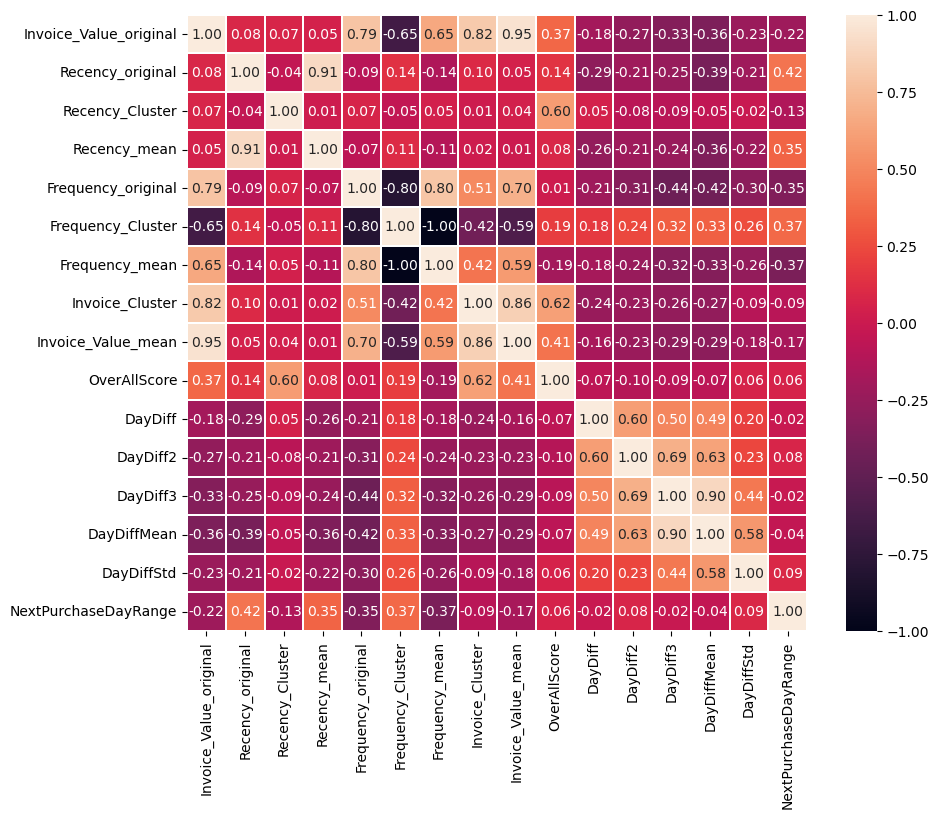

In [317]:
corr = df_pnp_user_class.select_dtypes(['int', 'float']).corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, fmt = '.2f', linewidths = 0.2)
plt.show()

### Modelling

In [318]:
# segregate the data into X and y for modelling purposes
X, y = df_pnp_user_class.drop('NextPurchaseDayRange', axis = 1), df_pnp_user_class.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [319]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score, classification_report, precision_recall_fscore_support

In [333]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("LRCV", LogisticRegressionCV()))
models.append(("NB",GaussianNB()))
models.append(("DTC",DecisionTreeClassifier()))
models.append(("ETC",ExtraTreesClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("GBC",GradientBoostingClassifier()))
models.append(("SVC",SVC()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

models

[('LR', LogisticRegression()),
 ('LRCV', LogisticRegressionCV()),
 ('NB', GaussianNB()),
 ('DTC', DecisionTreeClassifier()),
 ('ETC', ExtraTreesClassifier()),
 ('RF', RandomForestClassifier()),
 ('GBC', GradientBoostingClassifier()),
 ('SVC', SVC()),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_para

In [342]:
for name, model in models:
    kfold = KFold(n_splits = 2, shuffle = True, random_state = 22)
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "f1_macro")
    print(name, cv_result)

LR [0.54592075 0.42490842]
LRCV [0.49488304 0.31053763]
NB [0.45686275 0.49019608]
DTC [0.32394329 0.42141301]
ETC [0.50782609 0.45212494]
RF [0.52315243 0.40253125]
GBC [0.5160753  0.56347826]
SVC [0.22535211 0.28579235]
XGB [0.55862775 0.48321078]
KNN [nan nan]


From the above data we can conclude that NB,GBC and XGB have minimun deviatio between the accuracy of 2 folds of data. Further out of NB, GBC and XGB, GBC and XGB have more accuacy comparatively. Therefore, we can conclude that GradientBoosting model is the best model for the given data. We will train and test XGB model on our data manually to be able to find out best paraemeters for the model. 

In [334]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(xgb_model.score(X_test, y_test)))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.46


In [335]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         4
           1       0.00      0.00      0.00         6
           2       0.69      0.64      0.67        14

    accuracy                           0.46        24
   macro avg       0.31      0.38      0.33        24
weighted avg       0.45      0.46      0.44        24



### Lets try to find best parameters for best model selection

In [338]:
from sklearn.model_selection import GridSearchCV

param_test = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}

gsearch = GridSearchCV(estimator = xgb.XGBClassifier(), 
                        param_grid = param_test, 
                        scoring = 'accuracy',
                        n_jobs = -1, 
                        verbose = False, 
                        cv = 2)

gsearch.fit(X_train,y_train)
gsearch.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_child_weight': 1}, 0.46808510638297873)

In [339]:
xgb_model = xgb.XGBClassifier(max_depth = 3, min_child_weight = 1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(xgb_model.score(X_test, y_test)))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.46


In [340]:
y_pred = xgb_model.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         4
           1       0.00      0.00      0.00         6
           2       0.69      0.64      0.67        14

    accuracy                           0.46        24
   macro avg       0.31      0.38      0.33        24
weighted avg       0.45      0.46      0.44        24



# FINISH